# **Loading datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

directory = "/content/drive/MyDrive/CSE440 Project/Datasets"
train_df = pd.read_csv(f"{directory}/Question Answer Classification Dataset 3[Training].csv")
test_df = pd.read_csv(f"{directory}/[Updated] Question Answer Classification Dataset[Test].csv")

In [ ]:
test_df.head()

QA Text                  Class
0  Question Title:\nWhy does Zebras have stripes?...  Science & Mathematics
1  Question Title:\nWhat did the itsy bitsy sipde...  Education & Reference
2  Question Title:\nWhat is the difference betwee...  Education & Reference
3  Question Title:\nWhy do women get PMS?\nQuesti...                 Health
4  Question Title:\nIf your co-worker is guilty o...                 Health

In [ ]:
train_df.head()

QA Text                   Class
0  Question Title:\nwhat does it mean when you dr...  Family & Relationships
1  Question Title:\nA huge dam wall at a reservoi...   Education & Reference
2  Question Title:\nin the broadway musical Rent,...   Entertainment & Music
3  Question Title:\nWere people booing the Yorks ...                  Sports
4  Question Title:\nIm trying to save Excel file ...    Computers & Internet

# **EDA**

Shape and split ration of test and train

In [ ]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Ratio: {int(train_df.shape[0]/(train_df.shape[0]+test_df.shape[0])*100)}, {int(test_df.shape[0]/(train_df.shape[0]+test_df.shape[0])*100)}")

Train shape: (279999, 2)
Test shape: (59999, 2)
Ratio: 82, 17


Per class count

In [ ]:
train_df['Class'].value_counts()

Class
Business & Finance        28158
Politics & Government     28156
Education & Reference     28092
Science & Mathematics     28084
Family & Relationships    28049
Entertainment & Music     27999
Health                    27947
Society & Culture         27931
Computers & Internet      27826
Sports                    27757
Name: count, dtype: int64

Class distribution of train set

<Axes: ylabel='Class'>

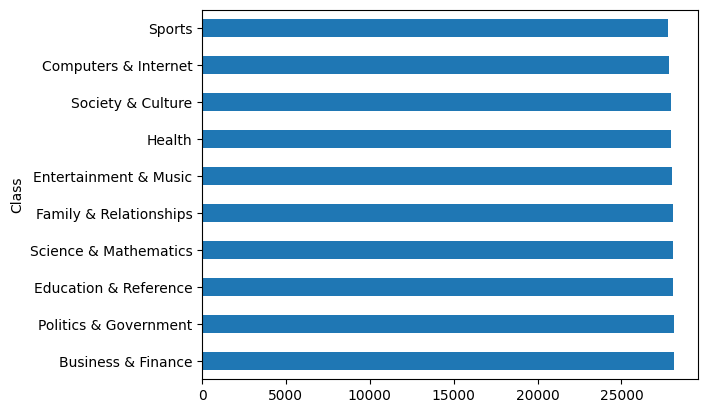

In [ ]:
train_df['Class'].value_counts().plot(kind='barh')

Well balanced dataset so no need to add class weights or oversampling or undersampling

Wordcloud

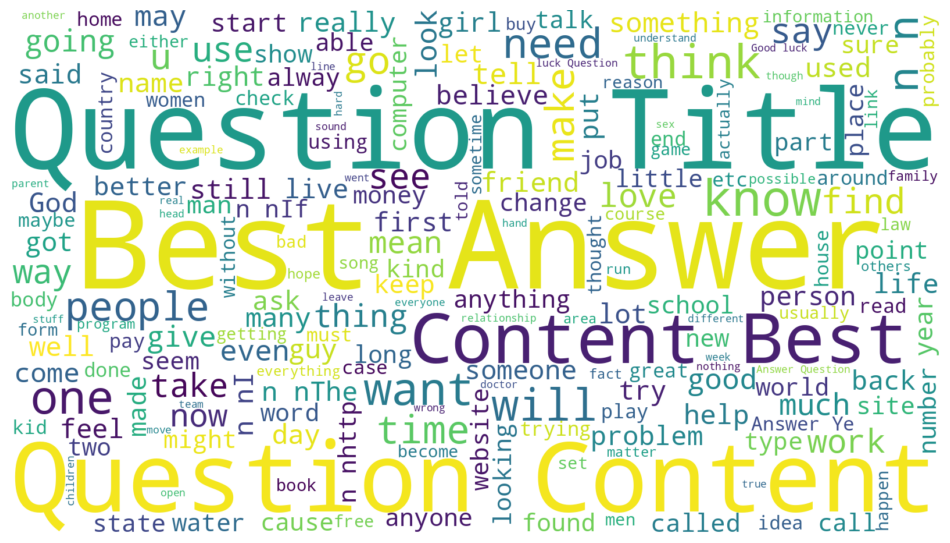

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = " ".join(train_df["QA Text"].astype(str))

wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Preprocessing**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stop words

In [ ]:
#train set
train_df['QA Text'] = train_df['QA Text'].apply(lambda x: x.lower())
train_df['QA Text'] = train_df['QA Text'].apply(lambda x: x.split())

train_df['QA Text'] = train_df['QA Text'].apply(lambda words: [word for word in words if word not in stop_words])

train_df['QA Text'] = train_df['QA Text'].apply(lambda words: " ".join(words))

#test set
test_df['QA Text'] = test_df['QA Text'].apply(lambda x: x.lower())
test_df['QA Text'] = test_df['QA Text'].apply(lambda x: x.split())

test_df['QA Text'] = test_df['QA Text'].apply(lambda words: [word for word in words if word not in stop_words])

test_df['QA Text'] = test_df['QA Text'].apply(lambda words: " ".join(words))

Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()
#train set
train_df['QA Text'] = train_df['QA Text'].astype(str).apply(
    lambda s: ' '.join(lemmatizer.lemmatize(w) for w in word_tokenize(s))
)
#test set
test_df['QA Text'] = test_df['QA Text'].astype(str).apply(
    lambda s: ' '.join(lemmatizer.lemmatize(w) for w in word_tokenize(s))
)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Remove Punctuation

In [ ]:
import string
tbl = str.maketrans('', '', string.punctuation)
train_df['QA Text'] = train_df['QA Text'].astype(str).apply(lambda s: s.translate(tbl))
test_df['QA Text'] = test_df['QA Text'].astype(str).apply(lambda s: s.translate(tbl))

Removing unnecessary words or sequences such as "question title"/ "question content"/ "best answer:"/ "n"/ "s" that appear in every QA Text which can introduce noise to the datasets.

In [ ]:
#train
train_df["QA Text"] = (
    train_df["QA Text"].astype(str)
    .apply(lambda s: (s
        .replace("question title", "")
        .replace("question content", "")
        .replace("best answer", "")
        .replace(" n ", "")
        .replace(" s ", " ")
    ))
)

#test
test_df["QA Text"] = (
    test_df["QA Text"].astype(str)
    .apply(lambda s: (s
        .replace("question title", "")
        .replace("question content", "")
        .replace("best answer", "")
        .replace(" n ", "")
        .replace(" s ", " ")
    ))
)

Remove White spaces

In [ ]:
#train
train_df["QA Text"] = train_df["QA Text"].apply(lambda s: s.strip())

#test
test_df["QA Text"] = test_df["QA Text"].apply(lambda s: s.strip())

Dropping null rows

In [ ]:
print("Missing values in train_df before handling:")
print(train_df['QA Text'].isnull().sum())

print("\nMissing values in test_df before handling:")
print(test_df['QA Text'].isnull().sum())

train_df = train_df.dropna(subset=['QA Text'])
test_df = test_df.dropna(subset=['QA Text'])

print("\nMissing values in train_df after handling:")
print(train_df['QA Text'].isnull().sum())

print("\nMissing values in test_df after handling:")
print(test_df['QA Text'].isnull().sum())

Missing values in train_df before handling:
0

Missing values in test_df before handling:
0

Missing values in train_df after handling:
0

Missing values in test_df after handling:
0


In [ ]:
train_df.head()

QA Text                   Class
0  mean dream someone inlove with    havnt seen g...  Family & Relationships
1  huge dam wall reservoir  dam wall much wider b...   Education & Reference
2  broadway musical rent  mean everytime refer ba...   Entertainment & Music
3  people booing york jerry rice retirement cerem...                  Sports
4  im trying save excel file system error  h8000f...    Computers & Internet

In [ ]:
test_df.head()

QA Text                  Class
0  zebra stripe    purpose stripe  serve zebra wi...  Science & Mathematics
1         itsy bitsy sipder climb up      waterspout  Education & Reference
2  difference bachelor master degree      one dif...  Education & Reference
3  woman get pm      premenstrual syndrome  pm  g...                 Health
4  coworker guilty unsanitary hygiene would right...                 Health

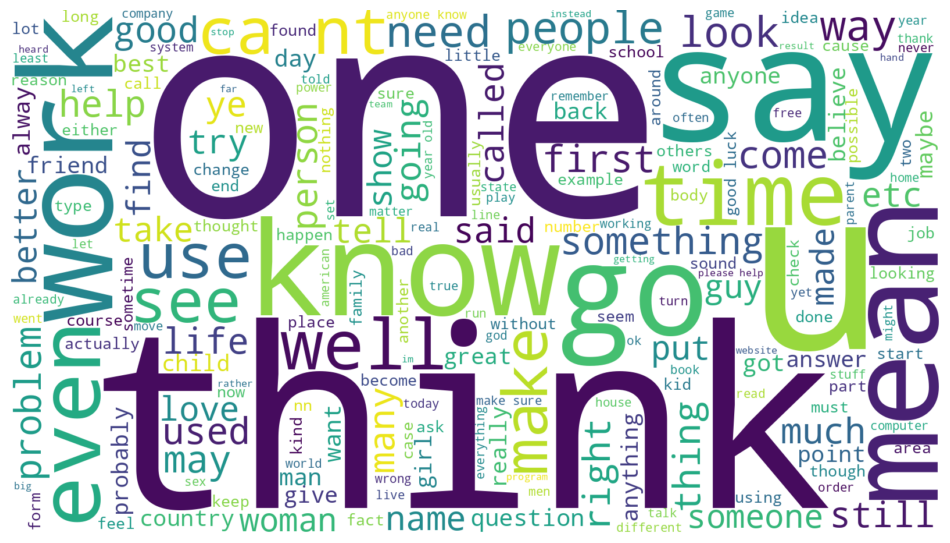

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = " ".join(train_df["QA Text"].astype(str))

wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
train_df.to_csv(f"{directory}/train_preprocessed.csv", index=False)
test_df.to_csv(f"{directory}/test_preprocessed.csv", index=False)

# Loading Preprocessed Datasets

Fetching train set

In [ ]:
import pandas as pd
file_link = 'https://drive.google.com/file/d/1DsVtDEYLlpOsHG9bfNI6BUjuCuzOrABk/view?usp=sharing'
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'

train_df = pd.read_csv(new_link)
train_df.head()

QA Text                   Class
0  mean dream someone inlove with    havnt seen g...  Family & Relationships
1  huge dam wall reservoir  dam wall much wider b...   Education & Reference
2  broadway musical rent  mean everytime refer ba...   Entertainment & Music
3  people booing york jerry rice retirement cerem...                  Sports
4  im trying save excel file system error  h8000f...    Computers & Internet

Fetching test set

In [ ]:
file_link = 'https://drive.google.com/file/d/1FTFFHaPjHak24rsNlyWNPjc5tI474P9_/view?usp=sharing'
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'

test_df = pd.read_csv(new_link)
test_df.head()

QA Text                  Class
0  zebra stripe    purpose stripe  serve zebra wi...  Science & Mathematics
1         itsy bitsy sipder climb up      waterspout  Education & Reference
2  difference bachelor master degree      one dif...  Education & Reference
3  woman get pm      premenstrual syndrome  pm  g...                 Health
4  coworker guilty unsanitary hygiene would right...                 Health

Dropping null rows

In [ ]:
print("Before dropping null values")
print("Train set null count:",train_df["QA Text"].isnull().sum())
print("Test set null count:", test_df["QA Text"].isnull().sum())
train_df.dropna(subset=['QA Text'], inplace=True)
test_df.dropna(subset=['QA Text'], inplace=True)
print("\nAfter dropping null values")
print("Train set null count:",train_df["QA Text"].isnull().sum())
print("Test set null count:", test_df["QA Text"].isnull().sum())

Before dropping null values
Train set null count: 2
Test set null count: 0

After dropping null values
Train set null count: 0
Test set null count: 0


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(train_df['Class'])
y_test = label_encoder.transform(test_df['Class'])

print("Encoded y_train:", y_train)
print("Encoded y_test:", y_test)

# Display class mappings
print("\nClass mappings:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

Encoded y_train: [4 2 3 ... 6 8 2]
Encoded y_test: [7 2 2 ... 5 9 1]

Class mappings:
Business & Finance: 0
Computers & Internet: 1
Education & Reference: 2
Entertainment & Music: 3
Family & Relationships: 4
Health: 5
Politics & Government: 6
Science & Mathematics: 7
Society & Culture: 8
Sports: 9


# **Create Skip-Gram model and save it for using in different models**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec

# Define parameters
EMBEDDING_DIM =50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")


# Create a skip-gram model using Gensim
# First, convert the tokenized sequences back to lists of words
train_texts = train_df['QA Text'].str.split()

print("Training Skipgram Model...")
# Train skip-gram model
skip_gram_model = Word2Vec(sentences=train_texts,
                          vector_size=EMBEDDING_DIM,
                          window=5,
                          min_count=1,
                          sg=1,  # Skip-gram model (sg=1)
                          workers=4)

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in skip_gram_model.wv:
        embedding_matrix[i] = skip_gram_model.wv[word]
    # If word not in skip-gram model, embedding remains zeros

print(f"Skip-gram model trained with {len(skip_gram_model.wv)} words")

Tokenizing texts...
Found 530441 unique tokens
Skip-gram model trained with 530441 words


In [ ]:
import numpy as np
import os

drive_folder_path = '/content/drive/MyDrive/CSE440 Project/Datasets/'

embedding_matrix_path = os.path.join(drive_folder_path, 'embedding_matrix.npy')

# Save the embedding matrix to Google Drive
# Assuming 'embedding_matrix' is already defined from previous steps
if 'embedding_matrix' in globals():
    np.save(embedding_matrix_path, embedding_matrix)
    print(f"Embedding matrix saved to: {embedding_matrix_path}")
else:
    print("Embedding matrix not found. Please run the cells to create it first.")

# To load the embedding matrix later
# loaded_embedding_matrix = np.load(embedding_matrix_path)
# print(f"Embedding matrix loaded from: {embedding_matrix_path}")

Embedding matrix saved to: /content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy


# **Logistic Regression with BoW**

**Bag of words (bow)**

Implementing the Bag of Words technique to convert the 'QA Text' into numerical features


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(train_df['QA Text'])
X_test_bow = vectorizer.transform(test_df['QA Text'])

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_bow: (279997, 624680)
Shape of X_test_bow: (59999, 624680)
Shape of y_train: (279997,)
Shape of y_test: (59999,)


**Model training**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr_bow = LogisticRegression(max_iter=1000)
model_lr_bow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

**Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred_test = model_lr_bow.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy}")

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Test Macro F1-score: {macro_f1}")

weighted_f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"Test Weighted F1-score: {weighted_f1}")

conf_matrix = confusion_matrix(y_test, y_pred_test)

class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)

Test Accuracy: 0.6674111235187253
Test Macro F1-score: 0.6666437157946296
Test Weighted F1-score: 0.6666432966714656
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.48      6000
           1       0.81      0.84      0.83      6000
           2       0.49      0.49      0.49      6000
           3       0.65      0.68      0.67      6000
           4       0.67      0.72      0.69      5999
           5       0.73      0.74      0.74      6000
           6       0.74      0.71      0.72      6000
           7       0.67      0.66      0.67      6000
           8       0.55      0.51      0.53      6000
           9       0.86      0.85      0.85      6000

    accuracy                           0.67     59999
   macro avg       0.67      0.67      0.67     59999
weighted avg       0.67      0.67      0.67     59999



**confusion matrix**



In [ ]:
print(conf_matrix)

[[2857  355  561  407  404  261  383  246  389  137]
 [ 342 5022  163  193   78   24   31   71   39   37]
 [ 518  200 2937  262  168  196  330  809  465  115]
 [ 308  218  234 4085  333  120   93  105  347  157]
 [ 310   68  104  299 4323  275   98   28  431   63]
 [ 238   23  164  133  360 4430   63  317  177   95]
 [ 473   36  397  113  105   68 4244   94  403   67]
 [ 264  125  820  128   45  338   81 3969  156   74]
 [ 410   71  534  436  613  231  340  196 3077   92]
 [ 149   48  109  227   70   96   50   76   75 5100]]


**visualizing the confusion matrix**

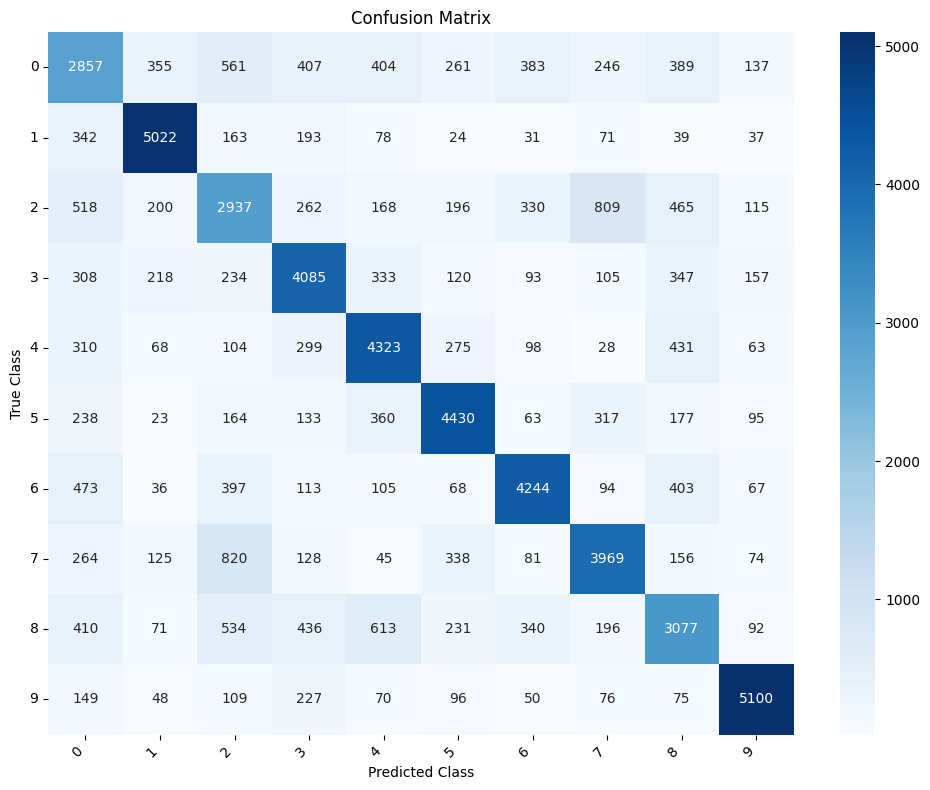

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_lr_bow.classes_, yticklabels=model_lr_bow.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Logistic Regression with TF-IDF**

TF-IDF

Implementing the TF-IDF technique to convert the 'QA Text' into numerical features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(train_df['QA Text'])
X_test_tfidf = vectorizer.transform(test_df['QA Text'])

print("Shape of X_train_bow:", X_train_tfidf.shape)
print("Shape of X_test_bow:", X_test_tfidf.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_bow: (279997, 624680)
Shape of X_test_bow: (59999, 624680)
Shape of y_train: (279997,)
Shape of y_test: (59999,)


Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr_tfidf = LogisticRegression(max_iter=1000)
model_lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred_test = model_lr_tfidf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy}")

macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"Test Macro F1-score: {macro_f1}")

weighted_f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"Test Weighted F1-score: {weighted_f1}")

conf_matrix_tfidf = confusion_matrix(y_test, y_pred_test)

class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)

Test Accuracy: 0.7068117801963366
Test Macro F1-score: 0.7040451158338776
Test Weighted F1-score: 0.7040447065385355
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      6000
           1       0.82      0.86      0.84      6000
           2       0.55      0.51      0.53      6000
           3       0.68      0.72      0.70      6000
           4       0.70      0.76      0.73      5999
           5       0.75      0.79      0.77      6000
           6       0.76      0.75      0.76      6000
           7       0.70      0.75      0.72      6000
           8       0.60      0.56      0.58      6000
           9       0.87      0.86      0.87      6000

    accuracy                           0.71     59999
   macro avg       0.70      0.71      0.70     59999
weighted avg       0.70      0.71      0.70     59999



Visualizing Confusion Matrix

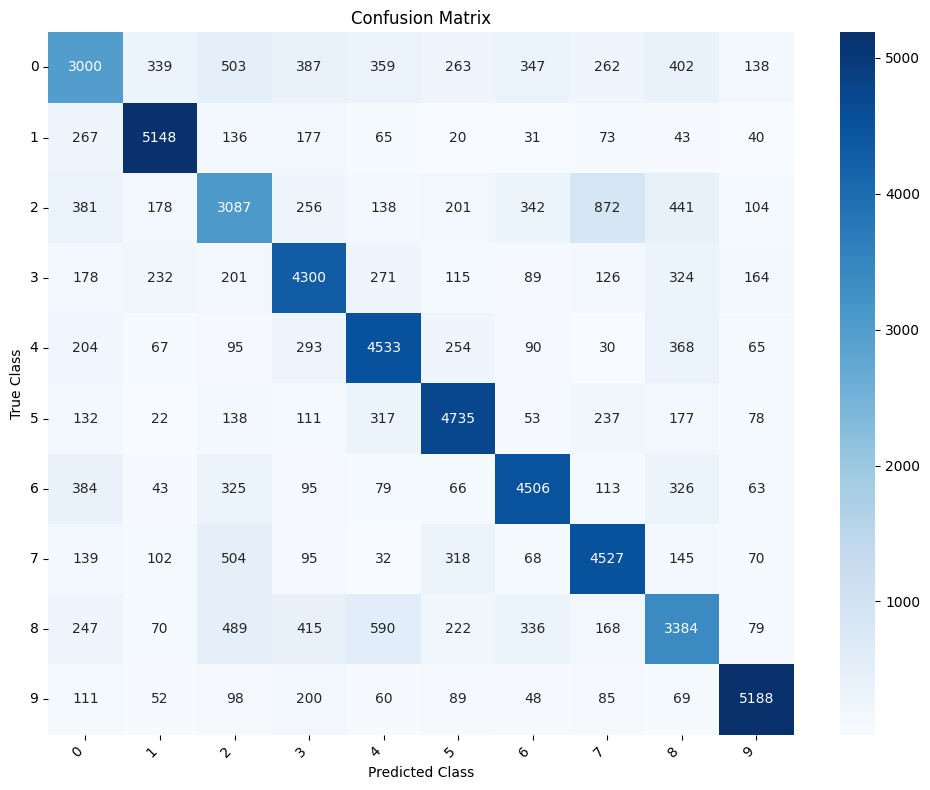

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=model_lr_tfidf.classes_, yticklabels=model_lr_tfidf.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Naive Bayes With BoW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(train_df['QA Text'])
X_test_bow = vectorizer.transform(test_df['QA Text'])

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_bow: (279997, 624680)
Shape of X_test_bow: (59999, 624680)
Shape of y_train: (279997,)
Shape of y_test: (59999,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

nb_model = MultinomialNB()
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

grid_search_bow = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)
grid_search_bow.fit(X_train_bow, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
             scoring='f1_weighted', verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
best_nb_bow = grid_search_bow.best_estimator_
y_pred_nb_bow = best_nb_bow.predict(X_test_bow)

print("--- Naive Bayes (BoW) Results ---")
accuracy_nb_bow = accuracy_score(y_test, y_pred_nb_bow)
f1_nb_bow = f1_score(y_test, y_pred_nb_bow, average='weighted')

print(f"Accuracy: {accuracy_nb_bow:.4f}")
print(f"F1-Score (Weighted): {f1_nb_bow:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_nb_bow))

--- Naive Bayes (BoW) Results ---
Accuracy: 0.6919
F1-Score (Weighted): 0.6882

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54      6000
           1       0.82      0.86      0.84      6000
           2       0.58      0.43      0.50      6000
           3       0.65      0.70      0.67      6000
           4       0.59      0.82      0.69      5999
           5       0.74      0.78      0.76      6000
           6       0.74      0.75      0.74      6000
           7       0.74      0.71      0.72      6000
           8       0.60      0.53      0.56      6000
           9       0.89      0.83      0.86      6000

    accuracy                           0.69     59999
   macro avg       0.69      0.69      0.69     59999
weighted avg       0.69      0.69      0.69     59999



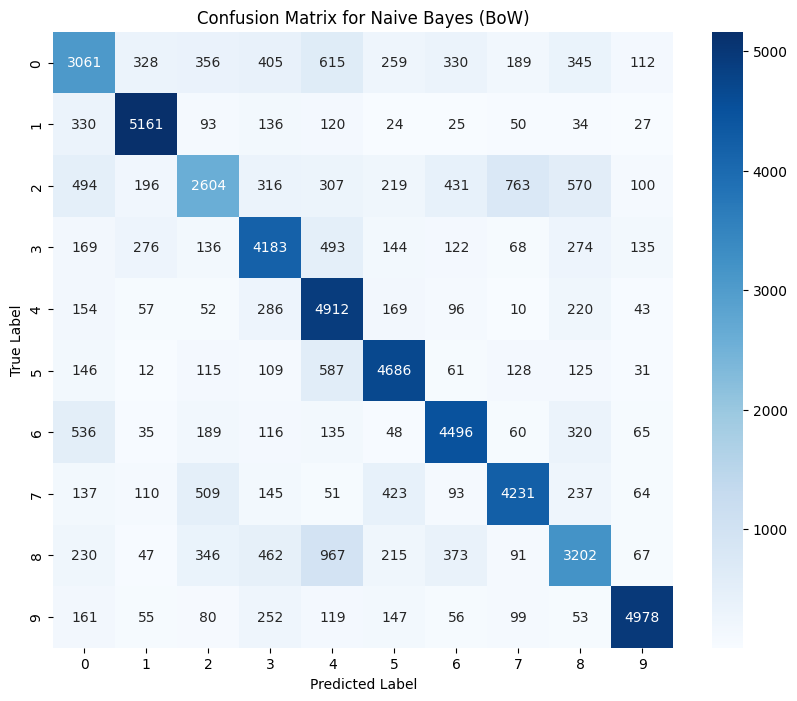

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm_nb_bow = confusion_matrix(y_test, y_pred_nb_bow)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb_bow, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Naive Bayes (BoW)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Naive Bayes With TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(train_df['QA Text'])
X_test_tfidf = vectorizer.transform(test_df['QA Text'])

print("Shape of X_train_bow:", X_train_tfidf.shape)
print("Shape of X_test_bow:", X_test_tfidf.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_bow: (279997, 624680)
Shape of X_test_bow: (59999, 624680)
Shape of y_train: (279997,)
Shape of y_test: (59999,)


In [ ]:
nb_model_tfidf = MultinomialNB()
param_grid_tfidf = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

grid_search_tfidf = GridSearchCV(estimator=nb_model_tfidf, param_grid=param_grid_tfidf, cv=5, scoring='f1_weighted', verbose=1)
grid_search_tfidf.fit(X_train_tfidf, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
             scoring='f1_weighted', verbose=1)

In [ ]:
best_nb_tfidf = grid_search_tfidf.best_estimator_
y_pred_nb_tfidf = best_nb_tfidf.predict(X_test_tfidf)


print("--- Naive Bayes (TF-IDF) Results ---")
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
f1_nb_tfidf = f1_score(y_test, y_pred_nb_tfidf, average='weighted')

print(f"Accuracy: {accuracy_nb_tfidf:.4f}")
print(f"F1-Score (Weighted): {f1_nb_tfidf:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_nb_tfidf))

--- Naive Bayes (TF-IDF) Results ---
Accuracy: 0.6951
F1-Score (Weighted): 0.6908

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      6000
           1       0.83      0.86      0.85      6000
           2       0.60      0.42      0.49      6000
           3       0.70      0.66      0.68      6000
           4       0.59      0.82      0.68      5999
           5       0.72      0.80      0.76      6000
           6       0.72      0.78      0.75      6000
           7       0.74      0.72      0.73      6000
           8       0.57      0.56      0.57      6000
           9       0.89      0.83      0.86      6000

    accuracy                           0.70     59999
   macro avg       0.69      0.70      0.69     59999
weighted avg       0.69      0.70      0.69     59999



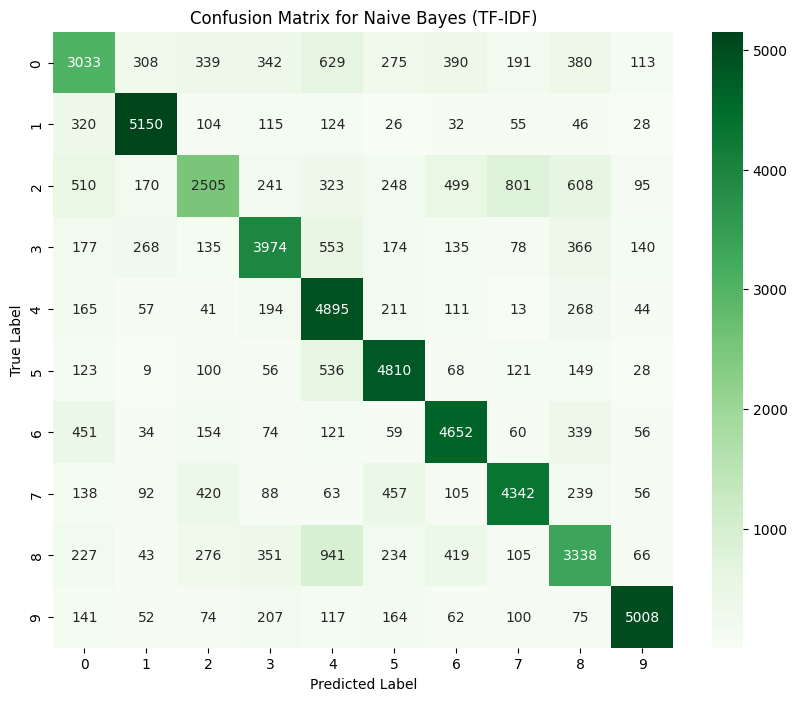

In [ ]:
cm_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Naive Bayes (TF-IDF)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Random Forest with BoW**

**Bag of words (bow)**

Implementing the Bag of Words technique to convert the 'QA Text' into numerical features


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(train_df['QA Text'])
X_test_bow = vectorizer.transform(test_df['QA Text'])

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_bow: (279997, 624680)
Shape of X_test_bow: (59999, 624680)
Shape of y_train: (279997,)
Shape of y_test: (59999,)


**Model training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_bow = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=25,       # maximum depth of each tree
    random_state=42
)

# Train the model on the BoW features
rf_bow.fit(X_train_bow, y_train)

print("Random Forest (BoW) model training complete!")


Random Forest (BoW) model training complete!


**Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Predict on the test set
y_test_pred = rf_bow.predict(X_test_bow)

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (BoW + RF):", accuracy)

# F1-score (macro)
f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test F1-score (macro):", f1)

# F1-score (weighted)
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test F1-score (macro):", f1)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



Test Accuracy (BoW + RF): 0.6140269004483409
Test F1-score (macro): 0.606231498931403
Test F1-score (macro): 0.6062310467206204

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.40      0.48      6000
           1       0.69      0.85      0.76      6000
           2       0.55      0.34      0.42      6000
           3       0.42      0.59      0.49      6000
           4       0.55      0.75      0.63      5999
           5       0.70      0.68      0.69      6000
           6       0.69      0.70      0.70      6000
           7       0.60      0.69      0.64      6000
           8       0.68      0.40      0.50      6000
           9       0.76      0.72      0.74      6000

    accuracy                           0.61     59999
   macro avg       0.62      0.61      0.61     59999
weighted avg       0.62      0.61      0.61     59999



In [ ]:
# Confusion matrix (just as numbers)
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2366  565  303  838  554  237  412  385  191  149]
 [ 182 5079  101  304   81   12   36  110   22   73]
 [ 317  389 1947  753  354  268  538  966  247  221]
 [ 137  409  130 3501  727  169  189  199  183  356]
 [ 108  125   80  684 4448  168  104   69  122   91]
 [  96   93  109  445  579 4092   59  365   85   77]
 [ 342  140  155  337  207   93 4232  188  187  119]
 [  86  228  302  448   86  417  139 4060  106  128]
 [ 166  139  301  867  973  223  461  263 2443  164]
 [ 142  179  109  512  238  175   79  202   34 4330]]


**confusion matrix**



In [ ]:
print(conf_matrix)

[[2411  570  319  835  531  241  374  389  182  148]
 [ 173 5112  101  299   71   12   32  109   20   71]
 [ 312  402 2018  715  334  251  518  976  250  224]
 [ 149  394  122 3570  725  162  178  192  167  341]
 [ 113  128   79  631 4520  165   82   69  126   86]
 [  96   90  115  406  590 4100   65  376   82   80]
 [ 342  157  149  336  206   95 4229  188  179  119]
 [  83  220  298  412   71  408  128 4145  105  130]
 [ 168  157  334  802 1009  229  459  286 2392  164]
 [ 156  175  104  498  217  167   82  221   36 4344]]


**visualizing the confusion matrix**

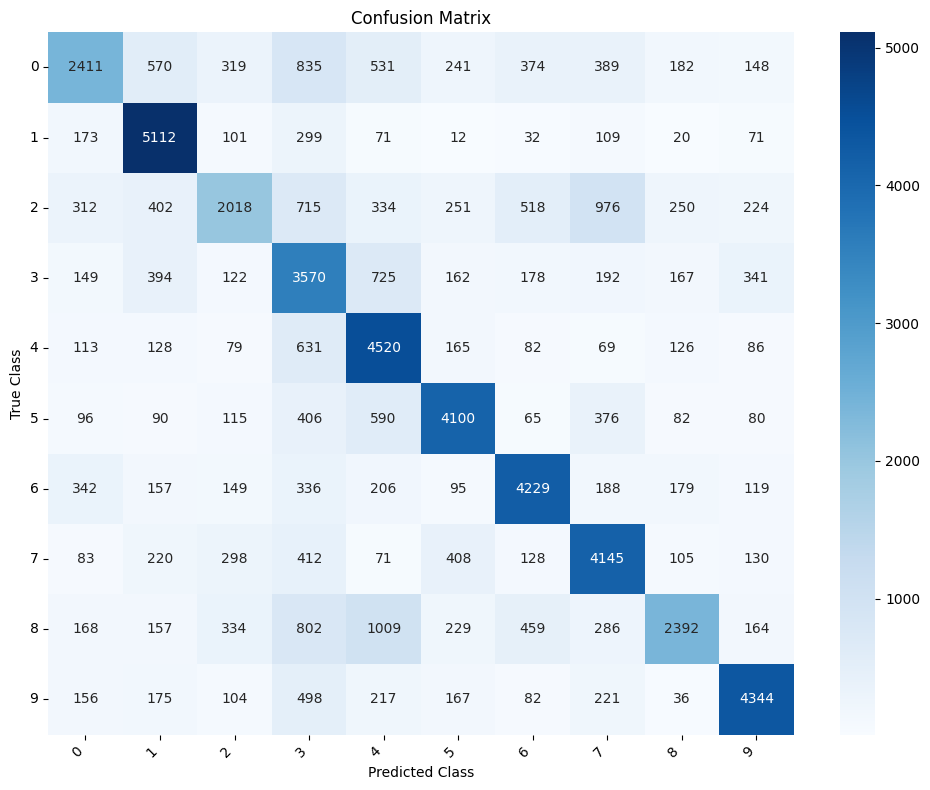

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_bow.classes_, yticklabels=rf_bow.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Random forest with TF-IDF**

TF-IDF

Implementing the TF-IDF technique to convert the 'QA Text' into numerical features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(train_df['QA Text'])
X_test_tfidf = vectorizer.transform(test_df['QA Text'])

print("Shape of X_train_bow:", X_train_tfidf.shape)
print("Shape of X_test_bow:", X_test_tfidf.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_bow: (279997, 624680)
Shape of X_test_bow: (59999, 624680)
Shape of y_train: (279997,)
Shape of y_test: (59999,)


Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_tfidf = RandomForestClassifier(
    n_estimators=200,  # number of trees
    max_depth=20,      # maximum depth of each tree
    random_state=42
)

# Train the model on TF-IDF features
rf_tfidf.fit(X_train_tfidf, y_train)

print("Random Forest (TF-IDF) model training complete!")


Random Forest (TF-IDF) model training complete!


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Predict on test set using Random Forest TF-IDF
y_pred_test = rf_tfidf.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy (TF-IDF + RF): {accuracy:.4f}")

# F1-scores
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
weighted_f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"Test Macro F1-score: {macro_f1:.4f}")
print(f"Test Weighted F1-score: {weighted_f1:.4f}")

# Confusion matrix
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_test)


# Classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report (TF-IDF + RF):")
print(class_report)


Test Accuracy (TF-IDF + RF): 0.6073
Test Macro F1-score: 0.5978
Test Weighted F1-score: 0.5978
Classification Report (TF-IDF + RF):
              precision    recall  f1-score   support

           0       0.60      0.37      0.45      6000
           1       0.67      0.86      0.75      6000
           2       0.54      0.32      0.40      6000
           3       0.44      0.57      0.50      6000
           4       0.52      0.76      0.62      5999
           5       0.70      0.67      0.68      6000
           6       0.69      0.70      0.69      6000
           7       0.56      0.70      0.62      6000
           8       0.66      0.40      0.50      6000
           9       0.77      0.73      0.75      6000

    accuracy                           0.61     59999
   macro avg       0.62      0.61      0.60     59999
weighted avg       0.62      0.61      0.60     59999



Confusion Matrix

In [ ]:
print("Confusion Matrix (TF-IDF + RF):")
print(conf_matrix_tfidf)

Confusion Matrix (TF-IDF + RF):
[[2200  677  363  718  621  228  380  472  206  135]
 [ 160 5139   91  245   99   17   28  142   12   67]
 [ 282  449 1927  624  414  256  475 1085  273  215]
 [ 143  425  145 3439  725  175  158  252  194  344]
 [  96  137   89  566 4561  158   92   93  122   85]
 [ 100  103  110  353  653 3993   64  459   98   67]
 [ 309  182  160  275  278   89 4189  248  171   99]
 [  87  231  274  330   95  434  120 4211  111  107]
 [ 152  172  298  735 1075  211  479  293 2429  156]
 [ 147  184   97  455  217  163   81  263   41 4352]]


Visualizing Confusion Matrix

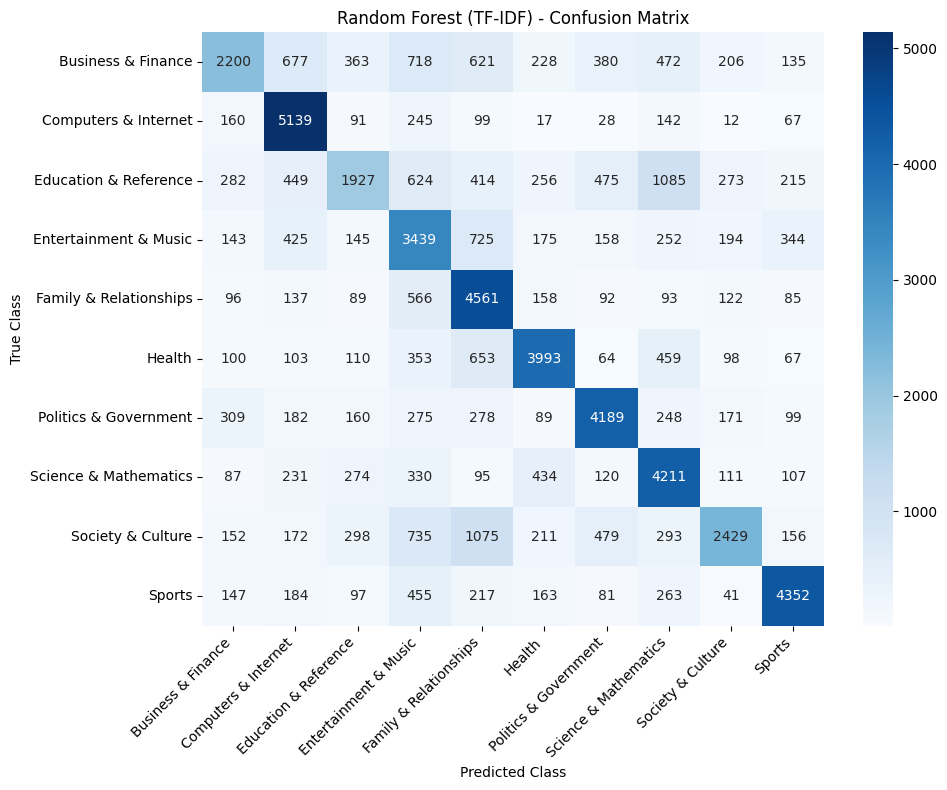

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Random Forest (TF-IDF) - Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **Deep Neural Network with BoW**

In [ ]:
print("Vectorizing text with Bag-of-Words...")
vectorizer_bow = CountVectorizer(max_features=10000)
X_train_bow = vectorizer_bow.fit_transform(train_df['QA Text'])
X_val_bow = vectorizer_bow.transform(val_df['QA Text'])
X_test_bow = vectorizer_bow.transform(test_df['QA Text'])
print("Vectorization complete.")

Vectorizing text with Bag-of-Words...
Vectorization complete.


In [ ]:
def convert_sparse_to_tf_sparse(sp_matrix):
    coo = sp_matrix.tocoo()
    indices = np.asmatrix([coo.row, coo.col]).transpose()
    sparse_tensor = tf.sparse.SparseTensor(indices, coo.data, coo.shape)
    return tf.sparse.reorder(sparse_tensor)

X_train_sparse = convert_sparse_to_tf_sparse(X_train_bow)
X_val_sparse = convert_sparse_to_tf_sparse(X_val_bow)
X_test_sparse = convert_sparse_to_tf_sparse(X_test_bow)


In [ ]:
configs = [
    {'units': 128, 'dropout': 0.5, 'name': 'Run 1: 128 units, 0.5 dropout'},
    {'units': 64,  'dropout': 0.3, 'name': 'Run 2: 64 units, 0.3 dropout'}
]

for config in configs:
    print(f"\n--- Starting {config['name']} ---")


    model = Sequential([
        Input(shape=(X_train_bow.shape[1],), sparse=True),
        Dense(config['units'], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['units']//2, activation='relu'),
        Dropout(config['dropout']*0.7),
        Dense(config['units']//4, activation='relu'),
        Dropout(config['dropout']*0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])


    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(
        X_train_sparse, y_train,
        validation_data=(X_val_sparse, y_val),
        epochs=10,
        batch_size=128,
        callbacks=[early_stopping],
        verbose=2
    )


    y_pred_probs = model.predict(X_test_sparse)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n--- Results for {config['name']} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))




--- Starting Run 1: 128 units, 0.5 dropout ---
Epoch 1/10
1750/1750 - 26s - 15ms/step - accuracy: 0.6569 - loss: 1.1605 - val_accuracy: 0.6943 - val_loss: 0.9919
Epoch 2/10
1750/1750 - 40s - 23ms/step - accuracy: 0.7088 - loss: 0.9393 - val_accuracy: 0.6935 - val_loss: 0.9856
Epoch 3/10
1750/1750 - 41s - 23ms/step - accuracy: 0.7283 - loss: 0.8620 - val_accuracy: 0.6934 - val_loss: 1.0023
Epoch 4/10
1750/1750 - 41s - 23ms/step - accuracy: 0.7419 - loss: 0.8072 - val_accuracy: 0.6911 - val_loss: 1.0255
Epoch 5/10
1750/1750 - 24s - 13ms/step - accuracy: 0.7553 - loss: 0.7614 - val_accuracy: 0.6890 - val_loss: 1.0603
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

--- Results for Run 1: 128 units, 0.5 dropout ---
Accuracy: 0.6990
F1-Score (Weighted): 0.6948
                        precision    recall  f1-score   support

    Business & Finance       0.58      0.48      0.52      6000
  Computers & Internet       0.82      0.86      0.84      6000
 Education & Reference       0.56      0.48  

# **Deep Neural Network with TF-IDF**

In [ ]:
print("Vectorizing text with TF-IDF...")
vectorizer_tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer_tfidf.fit_transform(train_df['QA Text'])
X_val_tfidf = vectorizer_tfidf.transform(val_df['QA Text'])
X_test_tfidf = vectorizer_tfidf.transform(test_df['QA Text'])
print("Vectorization complete.")

Vectorizing text with TF-IDF...
Vectorization complete.


In [ ]:
def convert_sparse_to_tf_sparse(sp_matrix):
    coo = sp_matrix.tocoo()
    indices = np.asmatrix([coo.row, coo.col]).transpose()
    sparse_tensor = tf.sparse.SparseTensor(indices, coo.data, coo.shape)
    return tf.sparse.reorder(sparse_tensor)

X_train_sparse = convert_sparse_to_tf_sparse(X_train_tfidf)
X_val_sparse = convert_sparse_to_tf_sparse(X_val_tfidf)
X_test_sparse = convert_sparse_to_tf_sparse(X_test_tfidf)

In [ ]:
configs = [
    {'units': 128, 'dropout': 0.5, 'name': 'Run 1: 128 units, 0.5 dropout'},
    {'units': 64,  'dropout': 0.3, 'name': 'Run 2: 64 units, 0.3 dropout'}
]

for config in configs:
    print(f"\n--- Starting {config['name']} ---")

    model = Sequential([
        Input(shape=(X_train_tfidf.shape[1],), sparse=True),
        Dense(config['units'], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['units']//2, activation='relu'),
        Dropout(config['dropout']*0.7),
        Dense(config['units']//4, activation='relu'),
        Dropout(config['dropout']*0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(
        X_train_sparse, y_train, validation_data=(X_val_sparse, y_val),
        epochs=20, batch_size=128, callbacks=[early_stopping], verbose=1
    )
    y_pred_probs = model.predict(X_test_sparse)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n--- Results for {config['name']} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


--- Starting Run 1: 128 units, 0.5 dropout ---
Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6050 - loss: 1.4075 - val_accuracy: 0.6989 - val_loss: 0.9458
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7184 - loss: 0.9025 - val_accuracy: 0.6998 - val_loss: 0.9375
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7352 - loss: 0.8407 - val_accuracy: 0.6982 - val_loss: 0.9454
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7480 - loss: 0.7913 - val_accuracy: 0.6965 - val_loss: 0.9597
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7602 - loss: 0.7503 - val_accuracy: 0.6950 - val_loss: 0.9726
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

--- Results for Run 1: 128 units, 0.5 dropout ---
Accuracy: 0.7037
F1-Score (Weighted): 0.6995
                        precision    recall  f1-score   support

    Business & Finance       0.62      0.48      0.54      6000
  Computers & Internet       

# **Deep Neural Network Glove**

In [ ]:
VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['QA Text'].values)
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])
X_train_pad = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val_pad = pad_sequences(tokenizer.texts_to_sequences(val_df['QA Text'].values), maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['QA Text'].values), maxlen=MAX_SEQUENCE_LENGTH)
word_index = tokenizer.word_index

In [ ]:
glove_path = '/content/drive/MyDrive/ML Datasets/glove.6B.50d.txt'
embedding_dim = 50
embeddings_index = {}
try:
    with open(glove_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Successfully loaded GloVe file from: {glove_path}")
except FileNotFoundError:
    print(f"ACTION REQUIRED: File not found at {glove_path}")

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Successfully loaded GloVe file from: /content/drive/MyDrive/ML Datasets/glove.6B.50d.txt


In [ ]:
configs = [
    {'units': 128, 'dropout': 0.5, 'name': 'Run 1: 128 Dense Units, 0.5 Dropout'},
    {'units': 64,  'dropout': 0.3, 'name': 'Run 2: 64 Dense Units, 0.3 Dropout'}
]


for config in configs:
    print(f"\n--- Starting {config['name']} ---")


    model = Sequential([
        Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix],
                  input_length=MAX_SEQUENCE_LENGTH, trainable=False),
        Flatten(),
        Dense(config['units'], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['units']//2, activation='relu'),
        Dropout(config['dropout']*0.7),
        Dense(config['units']//4, activation='relu'),
        Dropout(config['dropout']*0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train_pad, y_train, validation_data=(X_val_pad, y_val),
        epochs=10, batch_size=128, callbacks=[early_stopping], verbose=1
    )

    y_pred_probs = model.predict(X_test_pad)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n--- Results for {config['name']} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


--- Starting Run 1: 128 Dense Units, 0.5 Dropout ---
Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 121ms/step - accuracy: 0.5318 - loss: 1.4438 - val_accuracy: 0.6140 - val_loss: 1.2043
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 266s 123ms/step - accuracy: 0.6091 - loss: 1.2108 - val_accuracy: 0.6182 - val_loss: 1.1885
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 209s 120ms/step - accuracy: 0.6242 - loss: 1.1546 - val_accuracy: 0.6220 - val_loss: 1.1837
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 269s 124ms/step - accuracy: 0.6361 - loss: 1.1129 - val_accuracy: 0.6201 - val_loss: 1.1907
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 262s 124ms/step - accuracy: 0.6437 - loss: 1.0854 - val_accuracy: 0.6224 - val_loss: 1.1922
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 251s 117ms/step - accuracy: 0.6500 - loss: 1.0628 - val_accuracy: 0.6201 - val_loss: 1.2091
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step

--- Results for Run 1: 128 Dense Units, 0.5 Dropout ---
Accuracy: 0.6294
F1-Score (Weighted): 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 124s 70ms/step - accuracy: 0.5402 - loss: 1.4168 - val_accuracy: 0.6154 - val_loss: 1.1975
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 120s 69ms/step - accuracy: 0.6176 - loss: 1.1741 - val_accuracy: 0.6182 - val_loss: 1.1887
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 144s 70ms/step - accuracy: 0.6360 - loss: 1.1175 - val_accuracy: 0.6176 - val_loss: 1.1990
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.6459 - loss: 1.0761 - val_accuracy: 0.6169 - val_loss: 1.2038
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 140s 68ms/step - accuracy: 0.6564 - loss: 1.0449 - val_accuracy: 0.6178 - val_loss: 1.2201
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step

--- Results for Run 2: 64 Dense Units, 0.3 Dropout ---
Accuracy: 0.6220
F1-Score (Weighted): 0.6147
                        precision    recall  f1-score   support

    Business & Finance       0.54      0.39      0.46      6000
  Computers & Internet       0.72      0.83      0.77      60

# **Deep Neural Network Skip-Gram**

In [ ]:
VOCAB_SIZE = 20000

print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")


sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)


MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print(f"Padded sequences to length: {MAX_SEQUENCE_LENGTH}")


print("\nLoading pre-trained embedding matrix...")
try:
    embedding_matrix_path = '/content/drive/MyDrive/ML Datasets/embedding_matrix.npy'
    embedding_matrix = np.load(embedding_matrix_path)
    EMBEDDING_DIM = embedding_matrix.shape[1]
    print(f"Embedding matrix loaded successfully. Shape: {embedding_matrix.shape}")
except FileNotFoundError:
    print(f"\nACTION REQUIRED: File not found at '{embedding_matrix_path}'.")
    print("Please mount your Google Drive and ensure the path is correct.\n")

    embedding_matrix = np.zeros((len(word_index) + 1, 50))
    EMBEDDING_DIM = 50

Tokenizing texts...
Found 530441 unique tokens.
Padded sequences to length: 683

Loading pre-trained embedding matrix...
Embedding matrix loaded successfully. Shape: (530442, 50)


In [ ]:
configs = [
    {'units': 128, 'dropout': 0.5, 'name': 'Run 1: 128 units, 0.5 dropout'},
    {'units': 64,  'dropout': 0.3, 'name': 'Run 2: 64 units, 0.3 dropout'}
]


for config in configs:
    print(f"\n--- Starting {config['name']} ---")

    model = Sequential([
        Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
                  input_length=MAX_SEQUENCE_LENGTH, trainable=False),
        Flatten(),
        Dense(config['units'], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['units']//2, activation='relu'),
        Dropout(config['dropout']*0.7),
        Dense(config['units']//4, activation='relu'),
        Dropout(config['dropout']*0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    print("\nTraining model...")
    history = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=10,
      batch_size=128,
      callbacks=[early_stopping],
      verbose=1
    )

    print("\n--- Evaluating on Test Set ---")
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n--- Results for {config['name']} ---")
    print(f"Accuracy: {accuracy:.4f}")

    print(f"F1-Score (Weighted): {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


--- Starting Run 1: 128 units, 0.5 dropout ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training model...
Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 207s 117ms/step - accuracy: 0.5355 - loss: 1.4264 - val_accuracy: 0.6444 - val_loss: 1.1098
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 273s 124ms/step - accuracy: 0.6238 - loss: 1.1804 - val_accuracy: 0.6525 - val_loss: 1.0799
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 203s 116ms/step - accuracy: 0.6365 - loss: 1.1354 - val_accuracy: 0.6564 - val_loss: 1.0766
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 267s 119ms/step - accuracy: 0.6467 - loss: 1.0997 - val_accuracy: 0.6613 - val_loss: 1.0633
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 264s 120ms/step - accuracy: 0.6534 - loss: 1.0740 - val_accuracy: 0.6595 - val_loss: 1.0586
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 273s 126ms/step - accuracy: 0.6583 - loss: 1.0547 - val_accuracy: 0.6611 - val_loss: 1.0603
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 254s 122ms/step - accuracy: 0.6641 - loss: 1.0364 - val_accuracy: 0.6623 - val_loss: 1.0640
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training model...
Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 121s 69ms/step - accuracy: 0.5580 - loss: 1.3690 - val_accuracy: 0.6490 - val_loss: 1.0966
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 148s 72ms/step - accuracy: 0.6415 - loss: 1.1169 - val_accuracy: 0.6575 - val_loss: 1.0736
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 139s 70ms/step - accuracy: 0.6570 - loss: 1.0671 - val_accuracy: 0.6601 - val_loss: 1.0715
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 148s 74ms/step - accuracy: 0.6639 - loss: 1.0399 - val_accuracy: 0.6580 - val_loss: 1.0790
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 119s 68ms/step - accuracy: 0.6702 - loss: 1.0128 - val_accuracy: 0.6573 - val_loss: 1.0763
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 0.6764 - loss: 0.9923 - val_accuracy: 0.6591 - val_loss: 1.0878

--- Evaluating on Test Set ---
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step

--- Results for Run 2: 64 units, 0.3 dropout ---
Accuracy: 0.6651
F1-Score (Weighted): 0.6617

Classificat

# **SimpleRNN Glove**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns

# Define parameters
EMBEDDING_DIM = 50 # Changed to 50 for GloVe 50d
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>") # Added OOV token
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Load GloVe embeddings
glove_file_path = "/content/drive/MyDrive/CSE440 Project/Datasets/glove.6B.50d.txt"
embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors in GloVe.')

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Tokenizing texts...
Found 530442 unique tokens
X_train shape: (223997, 805)
X_val shape: (56000, 805)
X_test shape: (59999, 805)
Found 400000 word vectors in GloVe.
Embedding matrix shape: (530443, 50)


In [ ]:
# Build the SimpleRNN model
model = Sequential()
model.add(Embedding(len(word_index) + 1, # Use the full vocabulary size
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH, # input_length is deprecated but kept for compatibility with older Keras versions
                    trainable=False)) # Set trainable to False to use pre-trained embeddings

model.add(SimpleRNN(32))
model.add(Dropout(0.4)) # Updated dropout
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2390 - loss: 2.0853

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 101s 56ms/step - accuracy: 0.2390 - loss: 2.0852 - val_accuracy: 0.4161 - val_loss: 1.7070
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3666 - loss: 1.8190

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 139s 55ms/step - accuracy: 0.3666 - loss: 1.8189 - val_accuracy: 0.4251 - val_loss: 1.6723
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4073 - loss: 1.7396

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 91s 52ms/step - accuracy: 0.4073 - loss: 1.7396 - val_accuracy: 0.4627 - val_loss: 1.5970
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4416 - loss: 1.6695

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.4416 - loss: 1.6695 - val_accuracy: 0.4864 - val_loss: 1.5411
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 146s 55ms/step - accuracy: 0.4322 - loss: 1.6958 - val_accuracy: 0.4741 - val_loss: 1.5815
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 138s 53ms/step - accuracy: 0.4560 - loss: 1.6477 - val_accuracy: 0.4908 - val_loss: 1.5802
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 147s 55ms/step - accuracy: 0.4600 - loss: 1.6448 - val_accuracy: 0.4618 - val_loss: 1.6253


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.34      0.17      0.23      6000
  Computers & Internet       0.64      0.80      0.71      6000
 Education & Reference       0.30      0.10      0.15      6000
 Entertainment & Music       0.49      0.35      0.41      6000
Family & Relationships       0.41      0.65      0.50      5999
                Health       0.60      0.61      0.61      6000
 Politics & Government       0.36      0.62      0.46      6000
 Science & Mathematics       0.57      0.59      0.58      6000
     Society & Culture       0.36      0.28      0.32      6000
                Sports       0.68      0.73      0.71      6000

              accuracy                           0.49     59999
             macro avg       0.48      0.49      0.47     59999
          weighted avg       0.48      0.49      0.47     59999



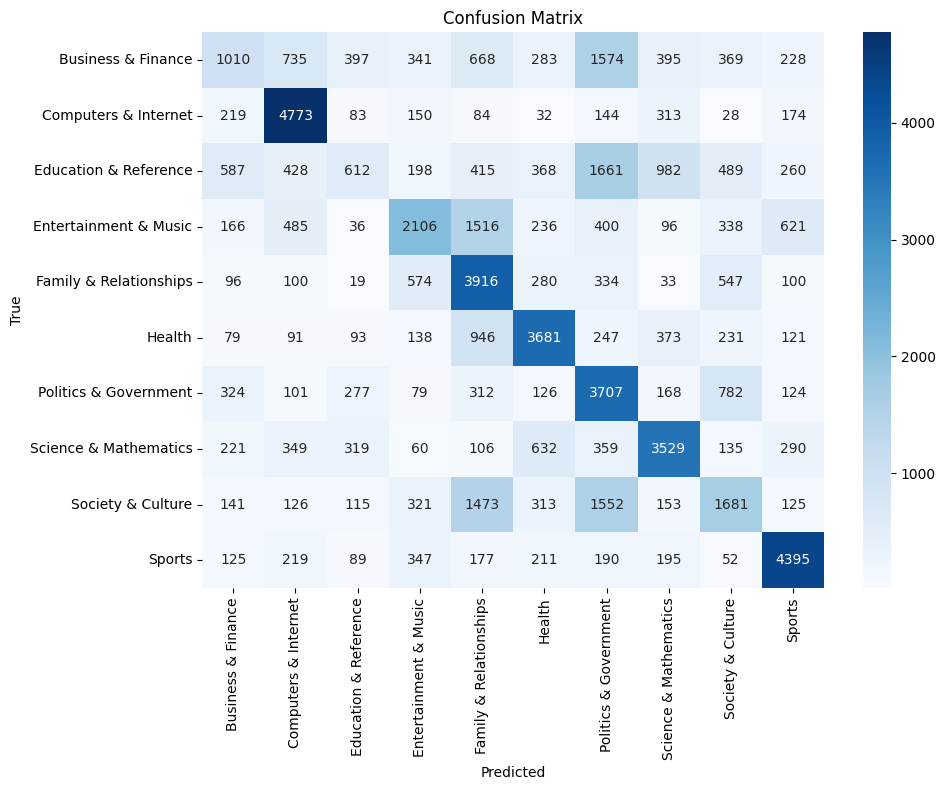

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

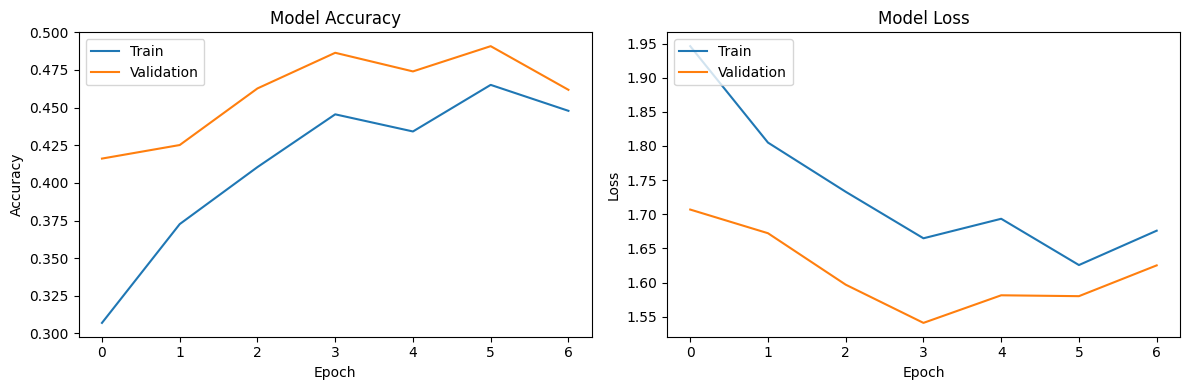

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Save model and tokenizer for future use
model.save('toxicity_detection_bidirectional_gru.h5')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved for future use")


Model Performance Metrics:
Accuracy: 0.4902
Precision: 0.4752
Recall: 0.4902
F1 Score: 0.4663
Model and tokenizer saved for future use


# **SimpleRNN skip-gram**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns


# Define parameters
EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

#loading embedding matrix
embedding_matrix_path = '/kaggle/input/sg-embedding/embedding_matrix.npy'
embedding_matrix = np.load(embedding_matrix_path)
print(f"Embedding matrix loaded from: {embedding_matrix_path}")
print(f"Skip-gram model trained with {len(embedding_matrix)} words")

2025-09-05 19:34:26.210244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757100866.380506      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757100866.439798      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tokenizing texts...
Found 530441 unique tokens
X_train shape: (223997, 683)
X_val shape: (56000, 683)
X_test shape: (59999, 683)
Embedding matrix loaded from: /kaggle/input/sg-embedding/embedding_matrix.npy
Skip-gram model trained with 530442 words


In [ ]:
# Build the SimpleRNN model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))

model.add(SimpleRNN(32)) # Changed to SimpleRNN
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu')) # Kept the Dense layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1757100904.301497      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 26,522,100 (101.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=2000,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20


I0000 00:00:1757100909.816616      98 service.cc:148] XLA service 0x7d3d340052c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757100909.817849      98 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757100910.136182      98 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757100911.795316      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


112/112 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step - accuracy: 0.1477 - loss: 2.2983 - val_accuracy: 0.3880 - val_loss: 1.8079
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.3839 - loss: 1.7823 - val_accuracy: 0.5169 - val_loss: 1.4869
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.5149 - loss: 1.4994 - val_accuracy: 0.5661 - val_loss: 1.3635
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.5503 - loss: 1.4185 - val_accuracy: 0.5822 - val_loss: 1.3230
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.5904 - loss: 1.3227 - val_accuracy: 0.6044 - val_loss: 1.2683
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.6157 - loss: 1.2645 - val_accuracy: 0.6119 - val_loss: 1.2607
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.5925 - loss: 1.3259 - val_accuracy: 0.6070 - val_loss: 1.2839
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.5954 - loss: 1.3196 - val

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.55      0.37      0.45      6000
  Computers & Internet       0.81      0.81      0.81      6000
 Education & Reference       0.41      0.36      0.38      6000
 Entertainment & Music       0.70      0.59      0.64      6000
Family & Relationships       0.58      0.78      0.67      5999
                Health       0.73      0.75      0.74      6000
 Politics & Government       0.58      0.73      0.65      6000
 Science & Mathematics       0.63      0.71      0.67      6000
     Society & Culture       0.48      0.40      0.44      6000
                Sports       0.83      0.83      0.83      6000

              accuracy                           0.63     59999
             macro avg       0.63      0.63      0.63     59999
          weighted avg       0.63      0.63      0.63     59999



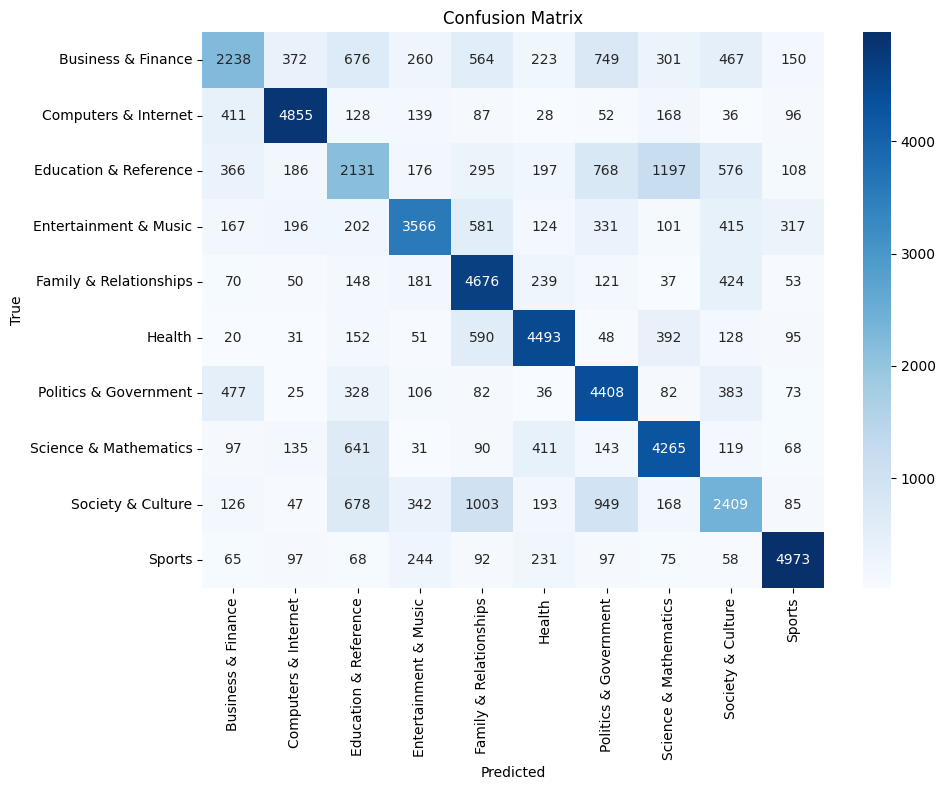

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

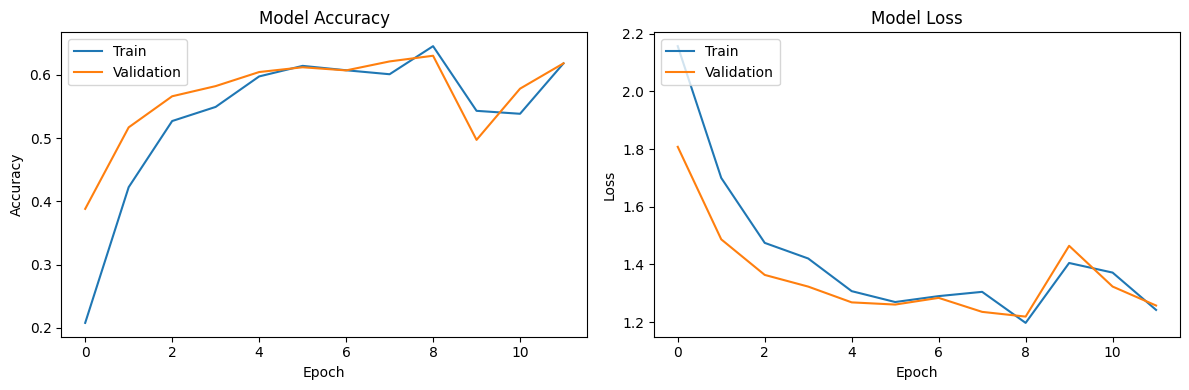

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# **GRU Glove**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns
from gensim.models import Word2Vec

# Print shape of train_df
print("Shape of train_df before tokenization:", train_df.shape)

# Define parameters
EMBEDDING_DIM = 50 #GloVe 50d
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
# Re-initialize the Tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")

# Convert 'QA Text' column to string type before fitting the tokenizer
train_df['QA Text'] = train_df['QA Text'].astype(str)
val_df['QA Text'] = val_df['QA Text'].astype(str)
test_df['QA Text'] = test_df['QA Text'].astype(str)


tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

glove_file_path = "/content/drive/MyDrive/CSE440 Project/Datasets/glove.6B.50d.txt"
embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors in GloVe.')

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Shape of train_df before tokenization: (223997, 2)
Tokenizing texts...
Found 530442 unique tokens
X_train shape: (223997, 805)
X_val shape: (56000, 805)
X_test shape: (59999, 805)
Found 400000 word vectors in GloVe.
Embedding matrix shape: (530443, 50)


**Run1:**

Number of GRU Layers: 1,
Number of Units in the GRU Layer: 64,
Number of Units in Dense Layer: 16,
Activation Functions: 'relu' for Dense, 'softmax' for output

Training Process Hyperparameters:
Dropout Rate: 0.4
Batch Size: 128
Optimizer: 'adam' (using its default learning rate, typically 0.001)
Maximum Epochs: 10 (with Early Stopping monitoring

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, #ull vocabulary size
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

model.add(GRU(64))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1757136010.882126      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10


I0000 00:00:1757136045.852942     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.4956 - loss: 1.4859 - val_accuracy: 0.6638 - val_loss: 1.0474
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6665 - loss: 1.0531 - val_accuracy: 0.6784 - val_loss: 0.9995
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6782 - loss: 1.0129 - val_accuracy: 0.6862 - val_loss: 0.9762
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.6851 - loss: 0.9948 - val_accuracy: 0.6864 - val_loss: 0.9700
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.6873 - loss: 0.9824 - val_accuracy: 0.6904 - val_loss: 0.9590
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.6921 - loss: 0.9700 - val_accuracy: 0.6926 - val_loss: 0.9527
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.6957 - loss: 0.9595 - val_accuracy: 0.6933 - val_loss: 0.9526
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.6990 - loss: 0.95

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.57      0.51      0.54      6000
  Computers & Internet       0.82      0.84      0.83      6000
 Education & Reference       0.59      0.46      0.52      6000
 Entertainment & Music       0.67      0.69      0.68      6000
Family & Relationships       0.70      0.75      0.72      5999
                Health       0.73      0.79      0.76      6000
 Politics & Government       0.73      0.79      0.76      6000
 Science & Mathematics       0.71      0.75      0.73      6000
     Society & Culture       0.59      0.56      0.58      6000
                Sports       0.84      0.87      0.85      6000

              accuracy                           0.70     59999
             macro avg       0.69      0.70      0.70     59999
          weighted avg       0.69      0.70      0.70     59999



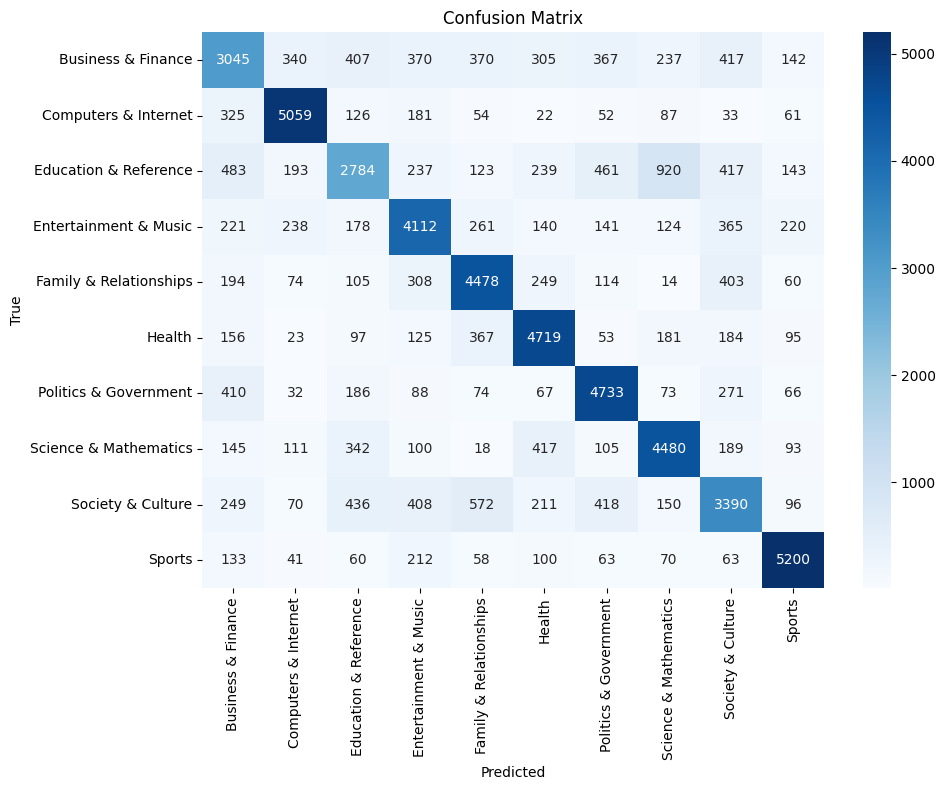

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

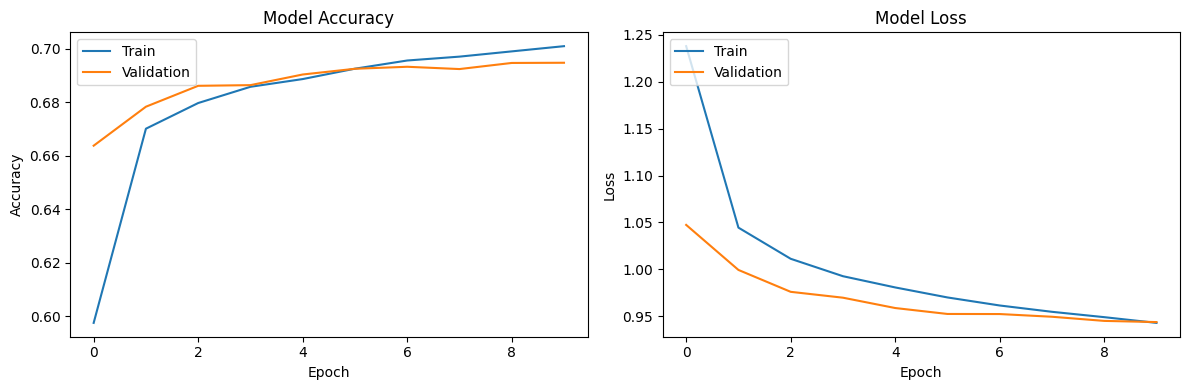

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
#detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")




Model Performance Metrics:
Accuracy: 0.7000
Precision: 0.6946
Recall: 0.7000
F1 Score: 0.6959


**Run2 Hyperparameters:**

*   **Number of GRU Layers:** 2
*   **Number of Units in GRU Layers:** 64 (in each layer)
*   **Number of Units in Dense Layer:** 32
*   **Activation Functions:** 'relu' for Dense, 'softmax' for output
*   **Dropout Rate:** 0.4 (can be adjusted if overfitting occurs)
*   **Batch Size:** 128
*   **Optimizer:** 'adam'
*   **Maximum Epochs:** 15 (with Early Stopping monitoring 'val_loss' with patience 3)

In [ ]:
model_run2 = Sequential()
model_run2.add(Embedding(len(word_index) + 1,
                         EMBEDDING_DIM,
                         weights=[embedding_matrix],
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=False))

model_run2.add(GRU(64, return_sequences=True))
model_run2.add(GRU(64))
model_run2.add(Dropout(0.4))
model_run2.add(Dense(32, activation='relu')) # Increased units in dense layer
model_run2.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_run2.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Display model architecture
model_run2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping_run2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint_run2 = ModelCheckpoint('best_model_run2.h5', monitor='val_loss', save_best_only=True)

# Train the model
history_run2 = model_run2.fit(X_train, y_train,
                              epochs=15, # Increased epochs
                              batch_size=128,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping_run2, model_checkpoint_run2])

Epoch 1/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 172s 96ms/step - accuracy: 0.5325 - loss: 1.3970 - val_accuracy: 0.6738 - val_loss: 1.0128
Epoch 2/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 167s 96ms/step - accuracy: 0.6734 - loss: 1.0296 - val_accuracy: 0.6812 - val_loss: 0.9892
Epoch 3/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 167s 96ms/step - accuracy: 0.6861 - loss: 0.9856 - val_accuracy: 0.6856 - val_loss: 0.9764
Epoch 4/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 168s 96ms/step - accuracy: 0.6933 - loss: 0.9628 - val_accuracy: 0.6919 - val_loss: 0.9566
Epoch 5/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 168s 96ms/step - accuracy: 0.6981 - loss: 0.9451 - val_accuracy: 0.6944 - val_loss: 0.9457
Epoch 6/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 168s 96ms/step - accuracy: 0.7032 - loss: 0.9349 - val_accuracy: 0.6955 - val_loss: 0.9449
Epoch 7/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 168s 96ms/step - accuracy: 0.7057 - loss: 0.9246 - val_accuracy: 0.6964 - val_loss: 0.9413
Epoch 8/15
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 167s 95ms/step - accuracy: 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.66      0.45      0.53      6000
  Computers & Internet       0.79      0.87      0.83      6000
 Education & Reference       0.57      0.50      0.53      6000
 Entertainment & Music       0.63      0.74      0.68      6000
Family & Relationships       0.68      0.77      0.72      5999
                Health       0.72      0.81      0.76      6000
 Politics & Government       0.76      0.77      0.76      6000
 Science & Mathematics       0.70      0.76      0.73      6000
     Society & Culture       0.62      0.55      0.58      6000
                Sports       0.89      0.85      0.87      6000

              accuracy                           0.71     59999
             macro avg       0.70      0.71      0.70     59999
          weighted avg       0.70      0.71      0.70     59999



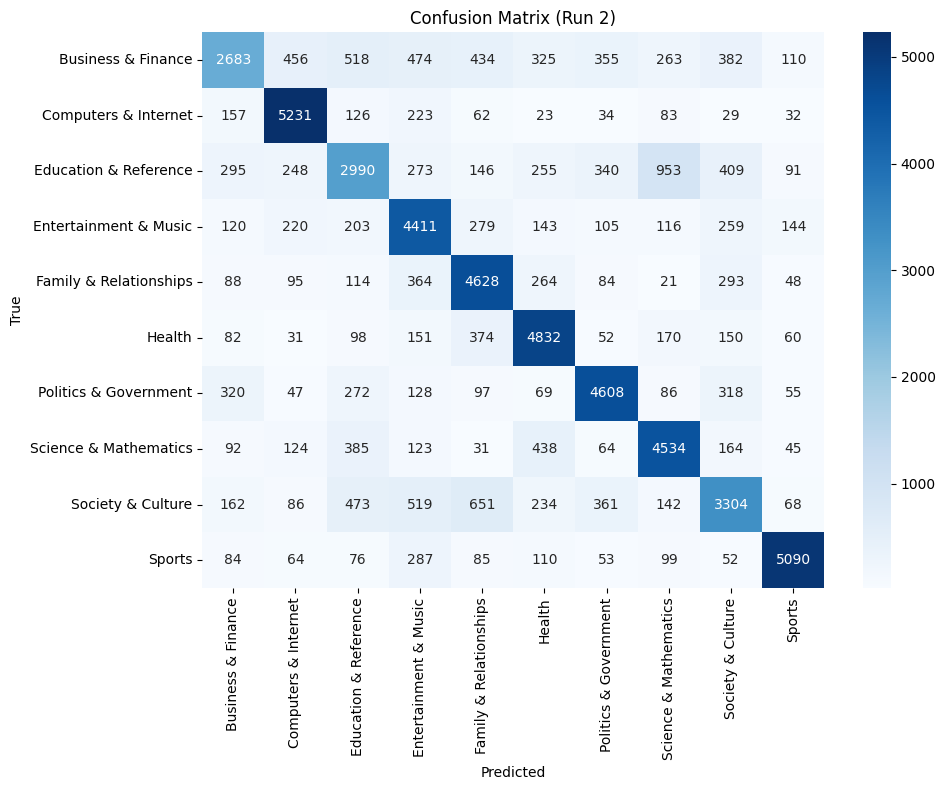

In [ ]:
y_pred_probs_run2 = model_run2.predict(X_test)
y_pred_run2 = np.argmax(y_pred_probs_run2, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_run2, target_names=label_encoder.classes_))

# Confusion matrix for Run 2
plt.figure(figsize=(10, 8))
cm_run2 = confusion_matrix(y_test, y_pred_run2)
sns.heatmap(cm_run2, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Run 2)')
plt.tight_layout()
plt.savefig('confusion_matrix_run2.png')
plt.show()

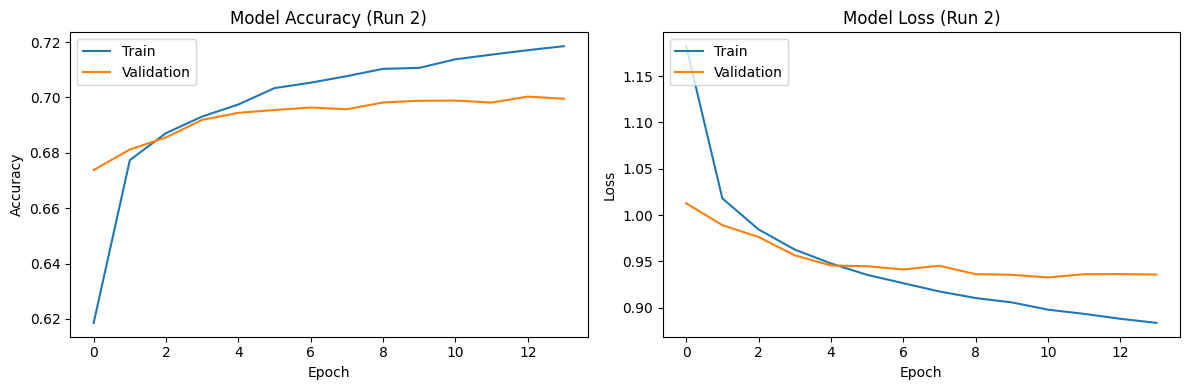

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_run2.history['accuracy'])
plt.plot(history_run2.history['val_accuracy'])
plt.title('Model Accuracy (Run 2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_run2.history['loss'])
plt.plot(history_run2.history['val_loss'])
plt.title('Model Loss (Run 2)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history_run2.png')
plt.show()

In [ ]:
#detailed performance metrics
accuracy_run2 = accuracy_score(y_test, y_pred_run2)
precision_run2, recall_run2, f1_score_run2, _ = precision_recall_fscore_support(y_test, y_pred_run2, average='weighted')

print(f"\nModel Performance Metrics (Run 2):")
print(f"Accuracy: {accuracy_run2:.4f}")
print(f"Precision: {precision_run2:.4f}")
print(f"Recall: {recall_run2:.4f}")
print(f"F1 Score: {f1_score_run2:.4f}")



Model Performance Metrics (Run 2):
Accuracy: 0.7052
Precision: 0.7021
Recall: 0.7052
F1 Score: 0.7000


# **GRU Skip-Gram**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns


# Define parameters
EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

#loading embedding matrix
embedding_matrix_path = '/content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy'
embedding_matrix = np.load(embedding_matrix_path)
print(f"Embedding matrix loaded from: {embedding_matrix_path}")
print(f"Skip-gram model trained with {len(embedding_matrix)} words")

Mounted at /content/drive
Tokenizing texts...
Found 530441 unique tokens
X_train shape: (223997, 683)
X_val shape: (56000, 683)
X_test shape: (59999, 683)
Embedding matrix loaded from: /content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy
Skip-gram model trained with 530442 words


Run 1:

Settings:

EMBEDDING_DIM = 50
VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = max seq len of train set
Layers:

*   Embedding
*   GRU(64)
*   Dense(16)
*   Output()
Dropout Rate = 0.4
Batch Size = 128
Early stopping = True
Epochs = 10


In [ ]:
# Build the GRU model with skip-gram embedding
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

model.add(GRU(64))
model.add(Dropout(0.4)) #dropout rate
model.add(Dense(16, activation='relu')) #Dense units
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,100 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
1748/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5126 - loss: 1.4460

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.5128 - loss: 1.4455 - val_accuracy: 0.6848 - val_loss: 0.9853
Epoch 2/10
1749/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6838 - loss: 1.0039

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.6838 - loss: 1.0038 - val_accuracy: 0.6956 - val_loss: 0.9454
Epoch 3/10
1748/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6952 - loss: 0.9639

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.6952 - loss: 0.9639 - val_accuracy: 0.6987 - val_loss: 0.9329
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6981 - loss: 0.9515

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.6981 - loss: 0.9515 - val_accuracy: 0.7027 - val_loss: 0.9195
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7034 - loss: 0.9360

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.7034 - loss: 0.9360 - val_accuracy: 0.7041 - val_loss: 0.9129
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7049 - loss: 0.9274

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7049 - loss: 0.9274 - val_accuracy: 0.7070 - val_loss: 0.9068
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7080 - loss: 0.9172

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.7080 - loss: 0.9172 - val_accuracy: 0.7060 - val_loss: 0.9060
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.7091 - loss: 0.9127 - val_accuracy: 0.7071 - val_loss: 0.9067
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7108 - loss: 0.9051 - val_accuracy: 0.7082 - val_loss: 0.9064
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7116 - loss: 0.9058

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.7116 - loss: 0.9058 - val_accuracy: 0.7085 - val_loss: 0.9026


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.73      0.42      0.53      6000
  Computers & Internet       0.85      0.86      0.85      6000
 Education & Reference       0.53      0.54      0.54      6000
 Entertainment & Music       0.66      0.72      0.69      6000
Family & Relationships       0.69      0.79      0.74      5999
                Health       0.76      0.79      0.78      6000
 Politics & Government       0.74      0.80      0.77      6000
 Science & Mathematics       0.69      0.79      0.73      6000
     Society & Culture       0.63      0.56      0.59      6000
                Sports       0.86      0.87      0.86      6000

              accuracy                           0.71     59999
             macro avg       0.71      0.71      0.71     59999
          weighted avg       0.71      0.71      0.71     59999



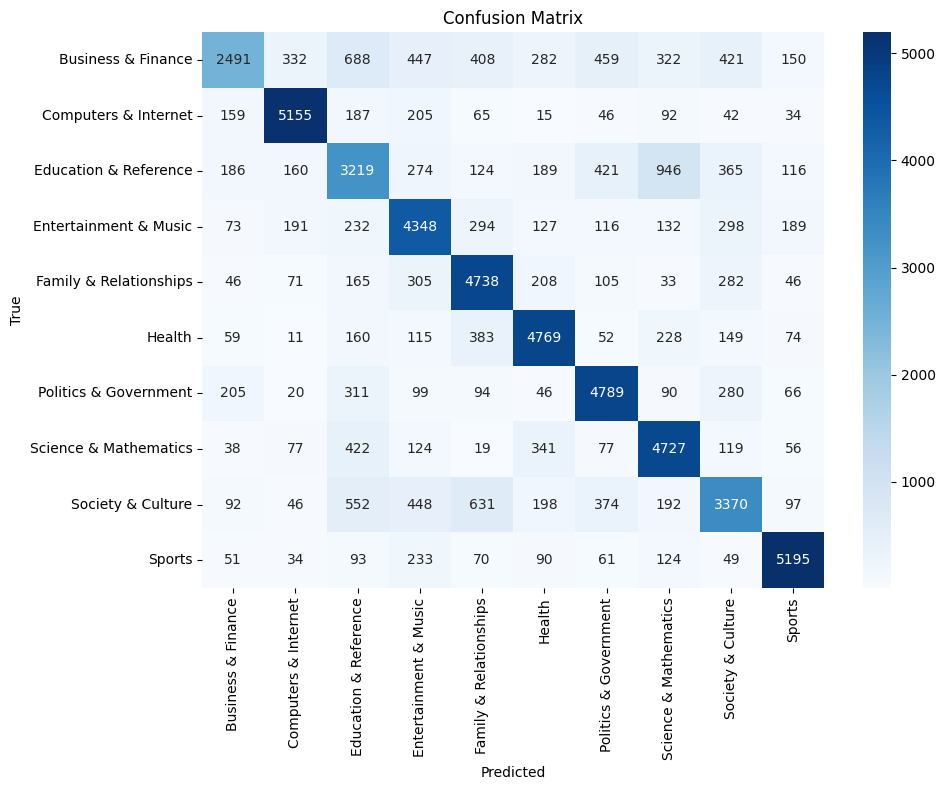

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

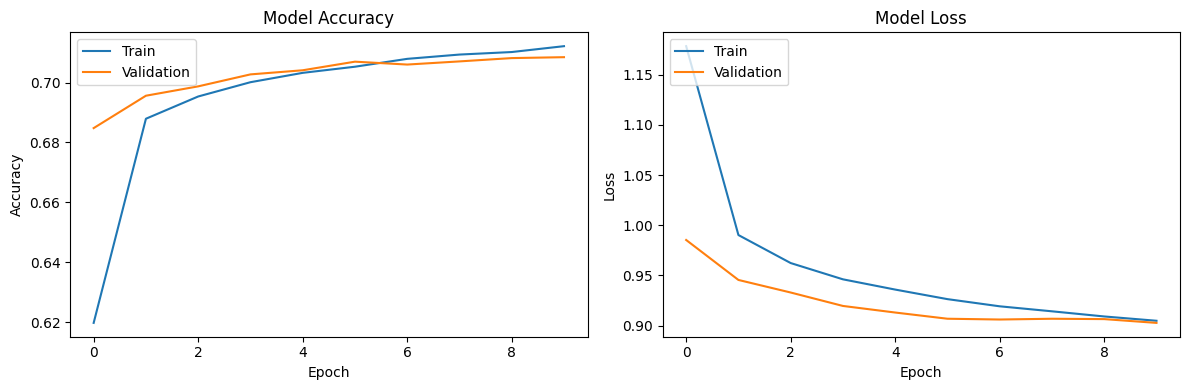

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")




Model Performance Metrics:
Accuracy: 0.7134
Precision: 0.7139
Recall: 0.7134
F1 Score: 0.7081


**Run 2:**

* * *

**Settings**:

*   EMBEDDING\_DIM = 50
*   VOCAB\_SIZE = 20000
*   MAX\_SEQUENCE\_LENGTH = max seq len of train set

> Layers:

    *   Embedding
    *   GRU(96)
    *   Dropout(0.5)
    *   Dense(32)
    *   Output()

*   Dropout Rate = 0.5
*   Batch Size = 128
*   Early stopping = True
*   Epochs = 10

Tuning is needed because Run 1 showed signs of slight overfitting.


In [ ]:
# Build the GRU model for Run 2
model_run2 = Sequential()
model_run2.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

model_run2.add(GRU(96)) # Slightly increased GRU units
model_run2.add(Dropout(0.5)) # Increased dropout rate
model_run2.add(Dense(32, activation='relu')) # Increased Dense units
model_run2.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model for Run 2
model_run2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture for Run 2
model_run2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,100 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10, # Reduced epochs to 10
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
1748/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7130 - loss: 0.8996

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.7130 - loss: 0.8996 - val_accuracy: 0.7086 - val_loss: 0.8992
Epoch 2/10
1748/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7147 - loss: 0.8951

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.7147 - loss: 0.8951 - val_accuracy: 0.7112 - val_loss: 0.8940
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.7155 - loss: 0.8939 - val_accuracy: 0.7103 - val_loss: 0.8951
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7155 - loss: 0.8929

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.7155 - loss: 0.8929 - val_accuracy: 0.7104 - val_loss: 0.8900
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.7173 - loss: 0.8861 - val_accuracy: 0.7109 - val_loss: 0.8935
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7186 - loss: 0.8848 - val_accuracy: 0.7117 - val_loss: 0.8915
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7190 - loss: 0.8798 - val_accuracy: 0.7110 - val_loss: 0.8965


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.64      0.49      0.55      6000
  Computers & Internet       0.83      0.88      0.85      6000
 Education & Reference       0.55      0.53      0.54      6000
 Entertainment & Music       0.66      0.73      0.69      6000
Family & Relationships       0.71      0.78      0.74      5999
                Health       0.75      0.81      0.78      6000
 Politics & Government       0.76      0.78      0.77      6000
 Science & Mathematics       0.69      0.78      0.74      6000
     Society & Culture       0.66      0.53      0.59      6000
                Sports       0.88      0.85      0.87      6000

              accuracy                           0.72     59999
             macro avg       0.71      0.72      0.71     59999
          weighted avg       0.71      0.72      0.71     59999



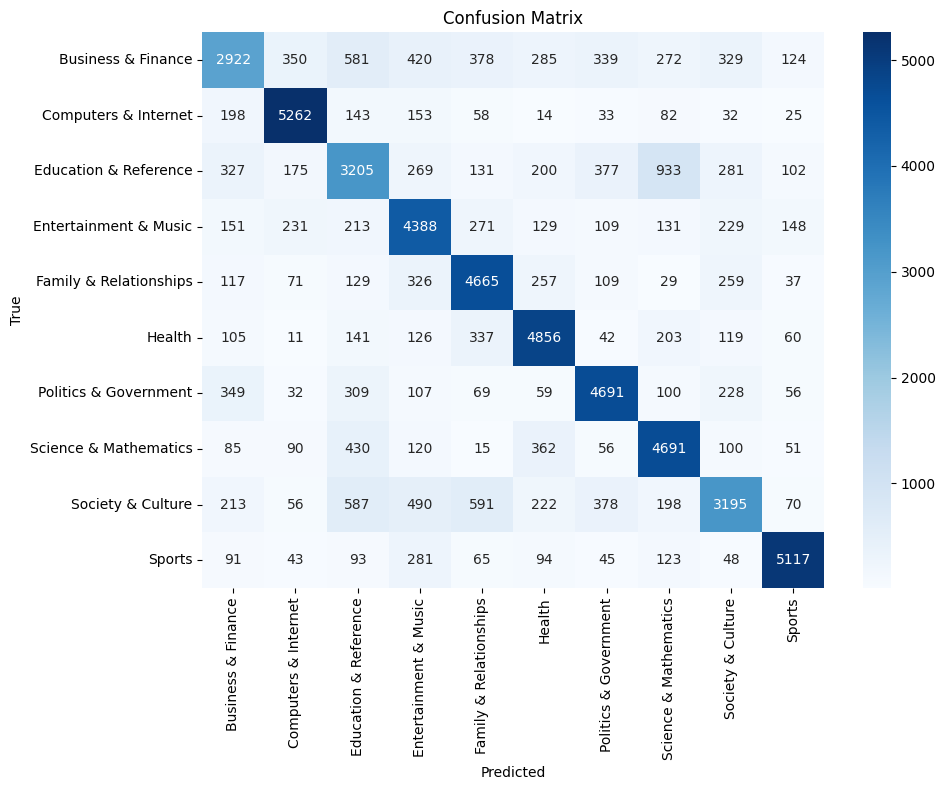

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

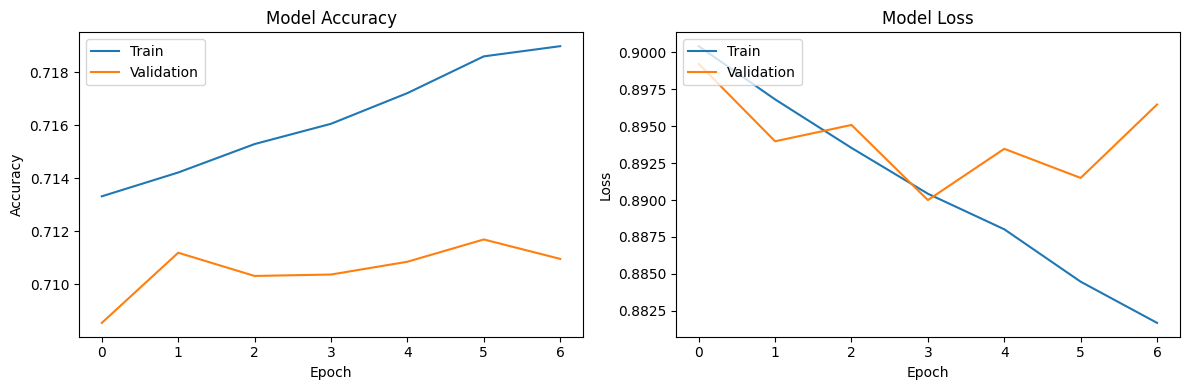

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")




Model Performance Metrics:
Accuracy: 0.7165
Precision: 0.7138
Recall: 0.7165
F1 Score: 0.7126


# **Lstm Glove**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns
from gensim.models import Word2Vec

# Define parameters
EMBEDDING_DIM = 50 # Changed to 50 for GloVe 50d
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>") # Added OOV token
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Load GloVe embeddings
glove_file_path = "/content/drive/MyDrive/CSE440 Project/Datasets/glove.6B.50d.txt"
embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors in GloVe.')

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Tokenizing texts...
Found 530442 unique tokens
X_train shape: (223997, 805)
X_val shape: (56000, 805)
X_test shape: (59999, 805)
Found 400000 word vectors in GloVe.
Embedding matrix shape: (530443, 50)


**Run 1**



*   **EMBEDDING_DIM**: 50 (using the GloVe 50d embeddings)
*   **VOCAB_SIZE**: 20000 (using the top 20000 words from the training data)
*   **MAX_SEQUENCE_LENGTH**: Determined by the maximum sequence length in the training set.

> **Layers**:

    1.  Embedding layer (GloVe initialized, non-trainable)
    2.  LSTM layer with 64 units and `return_sequences=True`
    3.  Dropout layer with a rate of 0.4
    4.  LSTM layer with 32 units
    5.  Dropout layer with a rate of 0.4
    6.  Dense layer with 16 units and ReLU activation
    7.  Dense output layer with softmax activation

*   **Dropout Rate**: 0.4 (applied after LSTM layers)
*   **Batch Size**: 128
*   **Early Stopping**: Yes (monitoring validation loss with patience of 3)
*   **Epochs**: 10

In [ ]:
from tensorflow.keras.layers import LSTM

#LSTM model with GloVe embeddings
model = Sequential()
model.add(Embedding(len(word_index) + 1, #full vocabulary size
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))


model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
print("\nLSTM Model Summary:")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



LSTM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10, # Set epochs to 10 for the first run
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 104s 58ms/step - accuracy: 0.5172 - loss: 1.5069 - val_accuracy: 0.6532 - val_loss: 1.1029
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 100s 57ms/step - accuracy: 0.6529 - loss: 1.1277 - val_accuracy: 0.6698 - val_loss: 1.0405
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 100s 57ms/step - accuracy: 0.6692 - loss: 1.0657 - val_accuracy: 0.6781 - val_loss: 1.0028
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 99s 57ms/step - accuracy: 0.6779 - loss: 1.0319 - val_accuracy: 0.6854 - val_loss: 0.9842
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 99s 57ms/step - accuracy: 0.6855 - loss: 1.0111 - val_accuracy: 0.6898 - val_loss: 0.9714
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 99s 57ms/step - accuracy: 0.6914 - loss: 0.9899 - val_accuracy: 0.6915 - val_loss: 0.9689
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 99s 57ms/step - accuracy: 0.6954 - loss: 0.9770 - val_accuracy: 0.6940 - val_loss: 0.9572
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 99s 57ms/step - accuracy: 0.697

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.61      0.47      0.53      6000
  Computers & Internet       0.80      0.87      0.83      6000
 Education & Reference       0.60      0.45      0.51      6000
 Entertainment & Music       0.65      0.69      0.67      6000
Family & Relationships       0.68      0.77      0.72      5999
                Health       0.72      0.80      0.76      6000
 Politics & Government       0.71      0.81      0.76      6000
 Science & Mathematics       0.71      0.74      0.72      6000
     Society & Culture       0.62      0.54      0.58      6000
                Sports       0.83      0.88      0.85      6000

              accuracy                           0.70     59999
             macro avg       0.69      0.70      0.69     59999
          weighted avg       0.69      0.70      0.69     59999



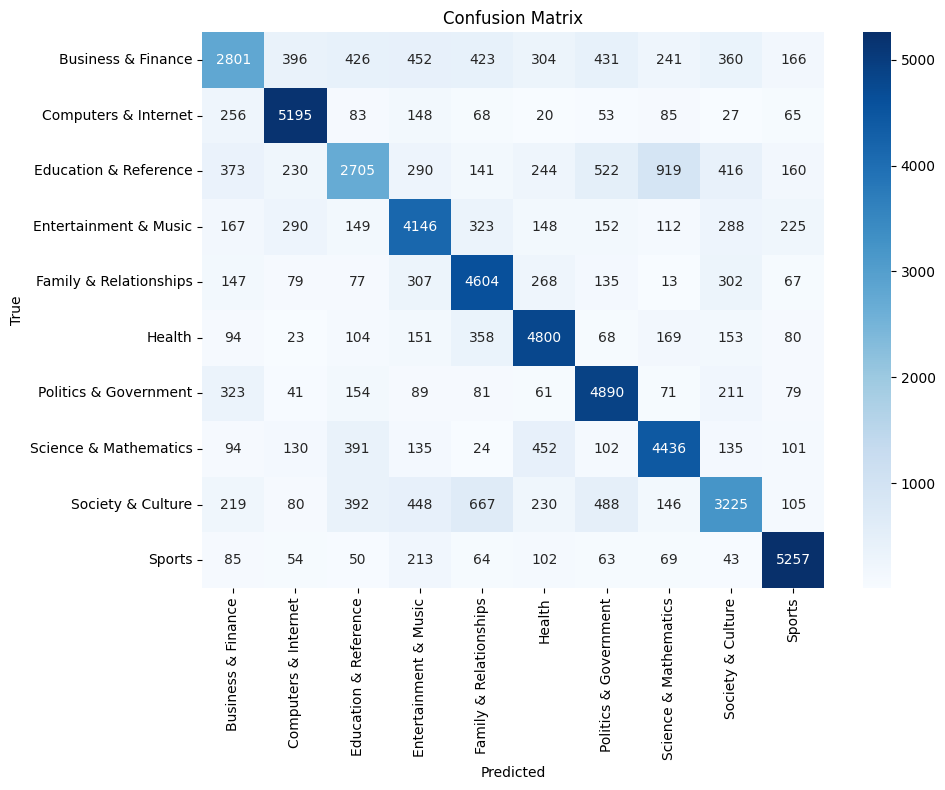

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

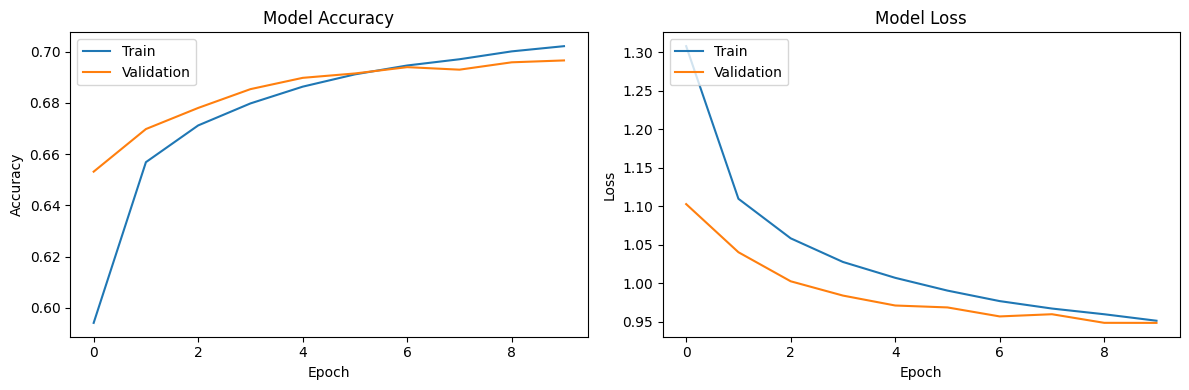

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics for Simple LSTM with GloVe
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nSimple LSTM with GloVe Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")




Simple LSTM with GloVe Model Performance Metrics:
Accuracy: 0.7010
Precision: 0.6940
Recall: 0.7010
F1 Score: 0.6940


**Run 2**

*   **EMBEDDING_DIM**: 50 (using the GloVe 50d embeddings)
*   **VOCAB_SIZE**: 20000 (using the top 20000 words from the training data)
*   **MAX_SEQUENCE_LENGTH**: Determined by the maximum sequence length in the training set.

> **Layers**:

    1.  Embedding layer (GloVe initialized, non-trainable)
    2.  LSTM layer with 48 units and `return_sequences=True`
    3.  Dropout layer with a rate of 0.5
    4.  LSTM layer with 24 units
    5.  Dropout layer with a rate of 0.5
    6.  Dense layer with 12 units and ReLU activation
    7.  Dense output layer with softmax activation

*   **Dropout Rate**: 0.5 (increased from 0.4)
*   **Batch Size**: 128
*   **Early Stopping**: Yes (monitoring validation loss with patience of 3)
*   **Epochs**: 10 (keeping the maximum epochs the same, early stopping will likely stop it sooner if overfitting persists)
Fewer units make the model simpler, and increased dropout forces it to rely on different parts of the network, both helping it learn general patterns instead of overfitting.

In [ ]:
from tensorflow.keras.layers import LSTM

#LSTM model with GloVe embeddings for Run 2
model_run2 = Sequential()
model_run2.add(Embedding(len(word_index) + 1, #full vocabulary size
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

model_run2.add(LSTM(48, return_sequences=True)) # Reduced units
model_run2.add(Dropout(0.5)) # Increased dropout
model_run2.add(LSTM(24)) # Reduced units
model_run2.add(Dropout(0.5)) # Increased dropout
model_run2.add(Dense(12, activation='relu')) # Reduced units
model_run2.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model_run2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print("\nLSTM Model Summary (Run 2):")
model_run2.summary()

early_stopping_run2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint_run2 = ModelCheckpoint('best_model_run2.h5', monitor='val_loss', save_best_only=True)

# Train
history_run2 = model_run2.fit(X_train, y_train,
                    epochs=10, # Set epochs to 10
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping_run2, model_checkpoint_run2])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



LSTM Model Summary (Run 2):


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 96s 52ms/step - accuracy: 0.4591 - loss: 1.6461 - val_accuracy: 0.6365 - val_loss: 1.1639
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 89s 51ms/step - accuracy: 0.6296 - loss: 1.2267 - val_accuracy: 0.6612 - val_loss: 1.0835
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 88s 50ms/step - accuracy: 0.6498 - loss: 1.1509 - val_accuracy: 0.6699 - val_loss: 1.0483
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.6629 - loss: 1.1121 - val_accuracy: 0.6744 - val_loss: 1.0347
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.6679 - loss: 1.0951 - val_accuracy: 0.6814 - val_loss: 1.0103
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.6731 - loss: 1.0742 - val_accuracy: 0.6829 - val_loss: 1.0079
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.6776 - loss: 1.0601 - val_accuracy: 0.6872 - val_loss: 0.9869
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.6833 -

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.61      0.47      0.53      6000
  Computers & Internet       0.80      0.87      0.83      6000
 Education & Reference       0.60      0.45      0.51      6000
 Entertainment & Music       0.65      0.69      0.67      6000
Family & Relationships       0.68      0.77      0.72      5999
                Health       0.72      0.80      0.76      6000
 Politics & Government       0.71      0.81      0.76      6000
 Science & Mathematics       0.71      0.74      0.72      6000
     Society & Culture       0.62      0.54      0.58      6000
                Sports       0.83      0.88      0.85      6000

              accuracy                           0.70     59999
             macro avg       0.69      0.70      0.69     59999
          weighted avg       0.69      0.70      0.69     59999



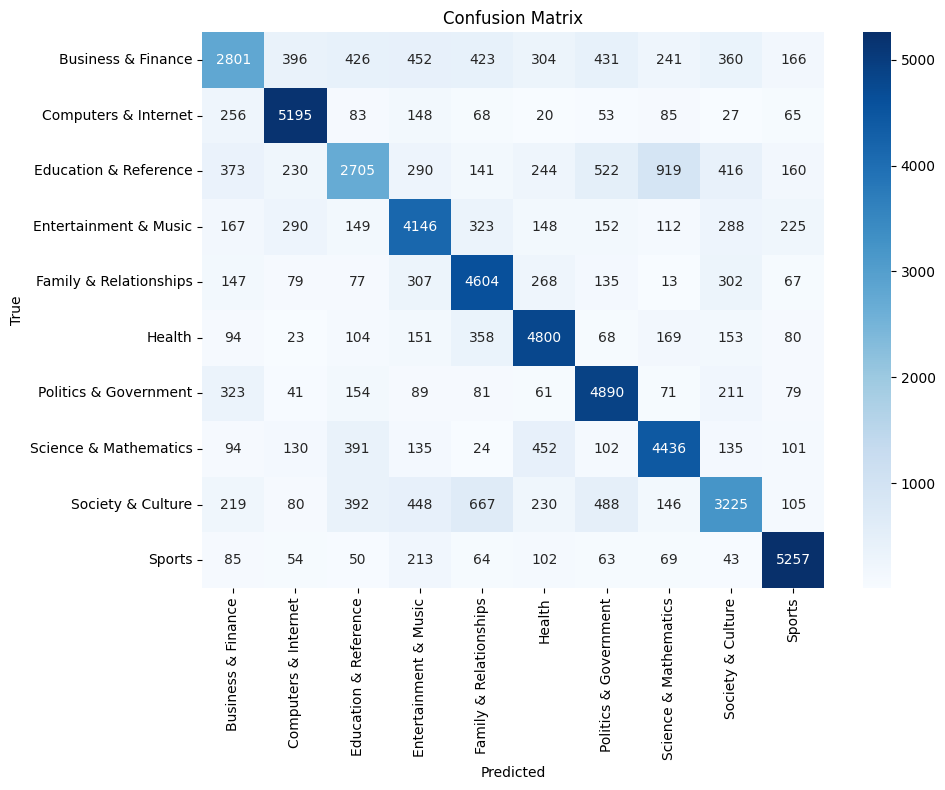

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

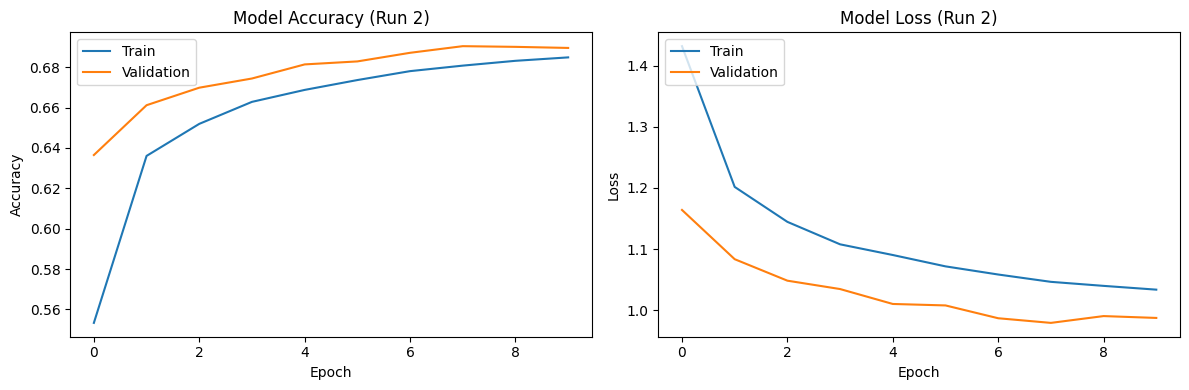

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_run2.history['accuracy'])
plt.plot(history_run2.history['val_accuracy'])
plt.title('Model Accuracy (Run 2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_run2.history['loss'])
plt.plot(history_run2.history['val_loss'])
plt.title('Model Loss (Run 2)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history_run2.png')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nSimple LSTM with GloVe Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")




Simple LSTM with GloVe Model Performance Metrics:
Accuracy: 0.7010
Precision: 0.6940
Recall: 0.7010
F1 Score: 0.6940


# **LSTM Skip-Gram**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns


# Define parameters
EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

#loading embedding matrix
embedding_matrix_path = '/content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy'
embedding_matrix = np.load(embedding_matrix_path)
print(f"Embedding matrix loaded from: {embedding_matrix_path}")
print(f"Skip-gram model trained with {len(embedding_matrix)} words")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tokenizing texts...
Found 530441 unique tokens
X_train shape: (223997, 683)
X_val shape: (56000, 683)
X_test shape: (59999, 683)
Embedding matrix loaded from: /content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy
Skip-gram model trained with 530442 words


**Run 1**

Embedding Dimension: 50
Vocabulary Size: 20000
Maximum Sequence Length: 683
LSTM Units (Layer 1): 64
LSTM Units (Layer 2): 32
Dropout Rate (Layer 1): 0.4
Dropout Rate (Layer 2): 0.4
Dense Units: 16
Epochs: 10
Batch Size: 256
Early Stopping Patience: 2

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Build the LSTM model
model = Sequential()
# Add Embedding layer using the pre-trained skip-gram embedding matrix
model.add(Embedding(len(word_index) + 1,
                    50,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

# Add LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dropout(0.4))

# Add Dense layers for classification
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,100 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4620 - loss: 1.6039

875/875 ━━━━━━━━━━━━━━━━━━━━ 64s 66ms/step - accuracy: 0.4622 - loss: 1.6036 - val_accuracy: 0.6621 - val_loss: 1.0769
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6579 - loss: 1.1112

875/875 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - accuracy: 0.6579 - loss: 1.1111 - val_accuracy: 0.6774 - val_loss: 1.0178
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6768 - loss: 1.0481

875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.6768 - loss: 1.0481 - val_accuracy: 0.6892 - val_loss: 0.9799
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6853 - loss: 1.0198

875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.6853 - loss: 1.0198 - val_accuracy: 0.6898 - val_loss: 0.9679
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6895 - loss: 1.0022

875/875 ━━━━━━━━━━━━━━━━━━━━ 57s 65ms/step - accuracy: 0.6895 - loss: 1.0022 - val_accuracy: 0.6955 - val_loss: 0.9499
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6935 - loss: 0.9849

875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.6936 - loss: 0.9849 - val_accuracy: 0.7018 - val_loss: 0.9314
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6986 - loss: 0.9656

875/875 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.6986 - loss: 0.9656 - val_accuracy: 0.7025 - val_loss: 0.9281
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6998 - loss: 0.9607

875/875 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.6998 - loss: 0.9607 - val_accuracy: 0.7042 - val_loss: 0.9247
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7033 - loss: 0.9481

875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.7033 - loss: 0.9481 - val_accuracy: 0.7059 - val_loss: 0.9237
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7070 - loss: 0.9409

875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.7070 - loss: 0.9409 - val_accuracy: 0.7071 - val_loss: 0.9127


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.63      0.48      0.55      6000
  Computers & Internet       0.81      0.88      0.84      6000
 Education & Reference       0.60      0.46      0.52      6000
 Entertainment & Music       0.67      0.70      0.69      6000
Family & Relationships       0.69      0.78      0.73      5999
                Health       0.75      0.81      0.78      6000
 Politics & Government       0.72      0.82      0.77      6000
 Science & Mathematics       0.73      0.74      0.73      6000
     Society & Culture       0.62      0.57      0.59      6000
                Sports       0.84      0.88      0.86      6000

              accuracy                           0.71     59999
             macro avg       0.71      0.71      0.71     59999
          weighted avg       0.71      0.71      0.71     59999



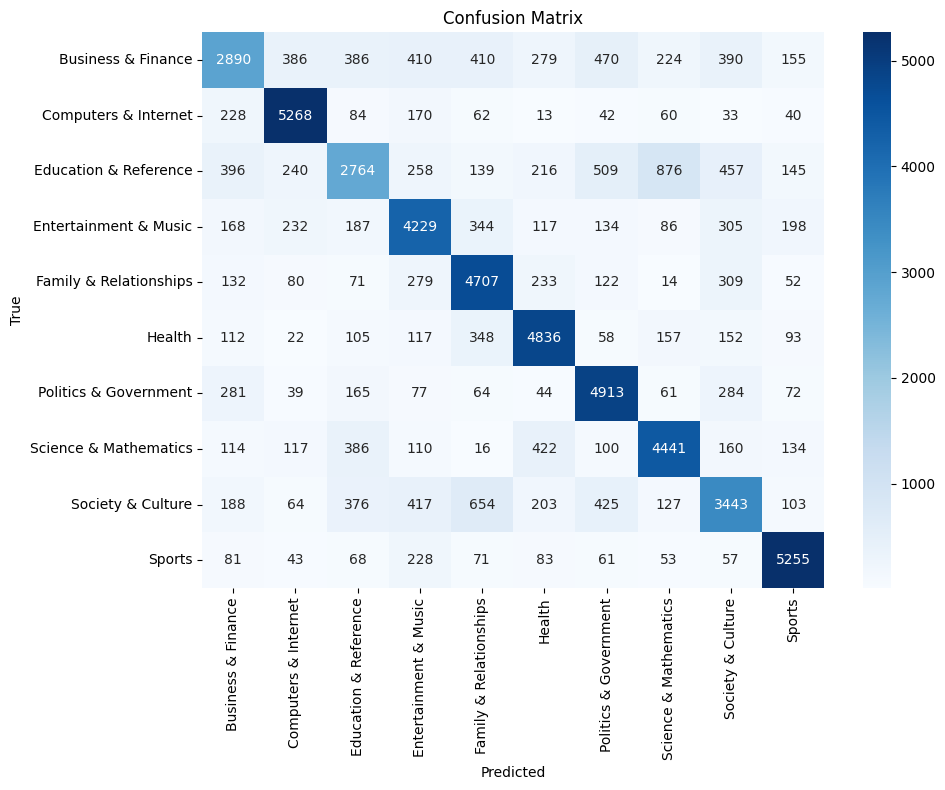

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

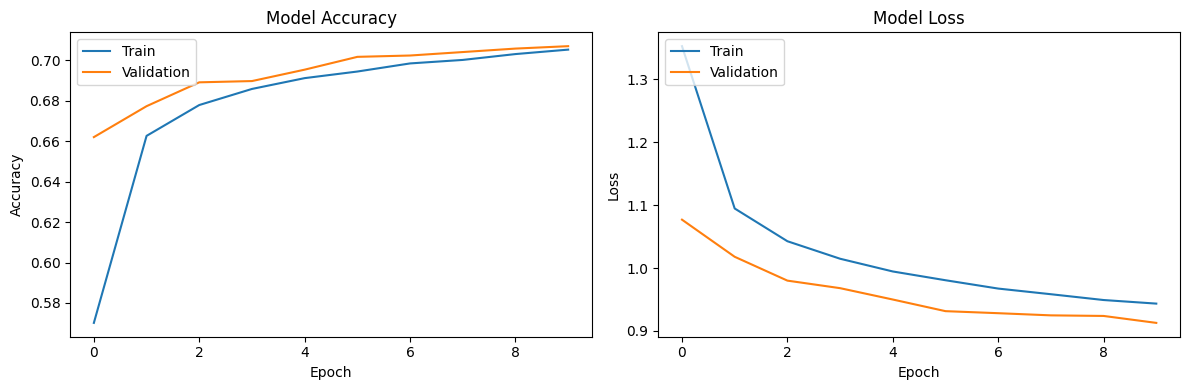

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")



Model Performance Metrics:
Accuracy: 0.7124
Precision: 0.7060
Recall: 0.7124
F1 Score: 0.7063


**Run 2**

Embedding Dimension: 50 Vocabulary Size: 20000 Maximum Sequence Length: 683 LSTM Units (Layer 1): 128 LSTM Units (Layer 2): 64 Dropout Rate (Layer 1): 0.4 Dropout Rate (Layer 2): 0.4 Dense Units: 16 Epochs: 15 Batch Size: 256 Early Stopping Patience: 2

from Run 1 the model's capacity could be improved for better classification.

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Build the LSTM model
model = Sequential()
# Add Embedding layer using the pre-trained skip-gram embedding matrix
model.add(Embedding(len(word_index) + 1,
                    50,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

# Add LSTM layers
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dropout(0.4))

# Add Dense layers for classification
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,100 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5522 - loss: 1.4001

875/875 ━━━━━━━━━━━━━━━━━━━━ 99s 105ms/step - accuracy: 0.5523 - loss: 1.3999 - val_accuracy: 0.6761 - val_loss: 1.0227
Epoch 2/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6732 - loss: 1.0520

875/875 ━━━━━━━━━━━━━━━━━━━━ 138s 105ms/step - accuracy: 0.6732 - loss: 1.0520 - val_accuracy: 0.6859 - val_loss: 0.9872
Epoch 3/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6881 - loss: 0.9921

875/875 ━━━━━━━━━━━━━━━━━━━━ 144s 108ms/step - accuracy: 0.6881 - loss: 0.9921 - val_accuracy: 0.6930 - val_loss: 0.9497
Epoch 4/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6971 - loss: 0.9590

875/875 ━━━━━━━━━━━━━━━━━━━━ 94s 108ms/step - accuracy: 0.6971 - loss: 0.9590 - val_accuracy: 0.6986 - val_loss: 0.9313
Epoch 5/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7028 - loss: 0.9369

875/875 ━━━━━━━━━━━━━━━━━━━━ 143s 109ms/step - accuracy: 0.7028 - loss: 0.9369 - val_accuracy: 0.7018 - val_loss: 0.9173
Epoch 6/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7061 - loss: 0.9220

875/875 ━━━━━━━━━━━━━━━━━━━━ 96s 110ms/step - accuracy: 0.7061 - loss: 0.9220 - val_accuracy: 0.7090 - val_loss: 0.9092
Epoch 7/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7102 - loss: 0.9110

875/875 ━━━━━━━━━━━━━━━━━━━━ 94s 107ms/step - accuracy: 0.7102 - loss: 0.9110 - val_accuracy: 0.7091 - val_loss: 0.8985
Epoch 8/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7137 - loss: 0.8964

875/875 ━━━━━━━━━━━━━━━━━━━━ 140s 105ms/step - accuracy: 0.7137 - loss: 0.8965 - val_accuracy: 0.7107 - val_loss: 0.8954
Epoch 9/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7155 - loss: 0.8931

875/875 ━━━━━━━━━━━━━━━━━━━━ 144s 107ms/step - accuracy: 0.7155 - loss: 0.8931 - val_accuracy: 0.7131 - val_loss: 0.8868
Epoch 10/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 139s 104ms/step - accuracy: 0.7175 - loss: 0.8855 - val_accuracy: 0.7102 - val_loss: 0.8942
Epoch 11/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7176 - loss: 0.8827

875/875 ━━━━━━━━━━━━━━━━━━━━ 142s 105ms/step - accuracy: 0.7176 - loss: 0.8827 - val_accuracy: 0.7155 - val_loss: 0.8834
Epoch 12/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 144s 107ms/step - accuracy: 0.7192 - loss: 0.8769 - val_accuracy: 0.7151 - val_loss: 0.8836
Epoch 13/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7235 - loss: 0.8617

875/875 ━━━━━━━━━━━━━━━━━━━━ 140s 105ms/step - accuracy: 0.7235 - loss: 0.8617 - val_accuracy: 0.7148 - val_loss: 0.8831
Epoch 14/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 144s 107ms/step - accuracy: 0.7253 - loss: 0.8569 - val_accuracy: 0.7148 - val_loss: 0.8910
Epoch 15/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7278 - loss: 0.8494

875/875 ━━━━━━━━━━━━━━━━━━━━ 140s 104ms/step - accuracy: 0.7278 - loss: 0.8494 - val_accuracy: 0.7157 - val_loss: 0.8830


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.65      0.50      0.57      6000
  Computers & Internet       0.82      0.88      0.85      6000
 Education & Reference       0.59      0.51      0.55      6000
 Entertainment & Music       0.63      0.76      0.69      6000
Family & Relationships       0.73      0.76      0.74      5999
                Health       0.79      0.79      0.79      6000
 Politics & Government       0.77      0.78      0.78      6000
 Science & Mathematics       0.71      0.78      0.74      6000
     Society & Culture       0.62      0.59      0.61      6000
                Sports       0.88      0.87      0.87      6000

              accuracy                           0.72     59999
             macro avg       0.72      0.72      0.72     59999
          weighted avg       0.72      0.72      0.72     59999



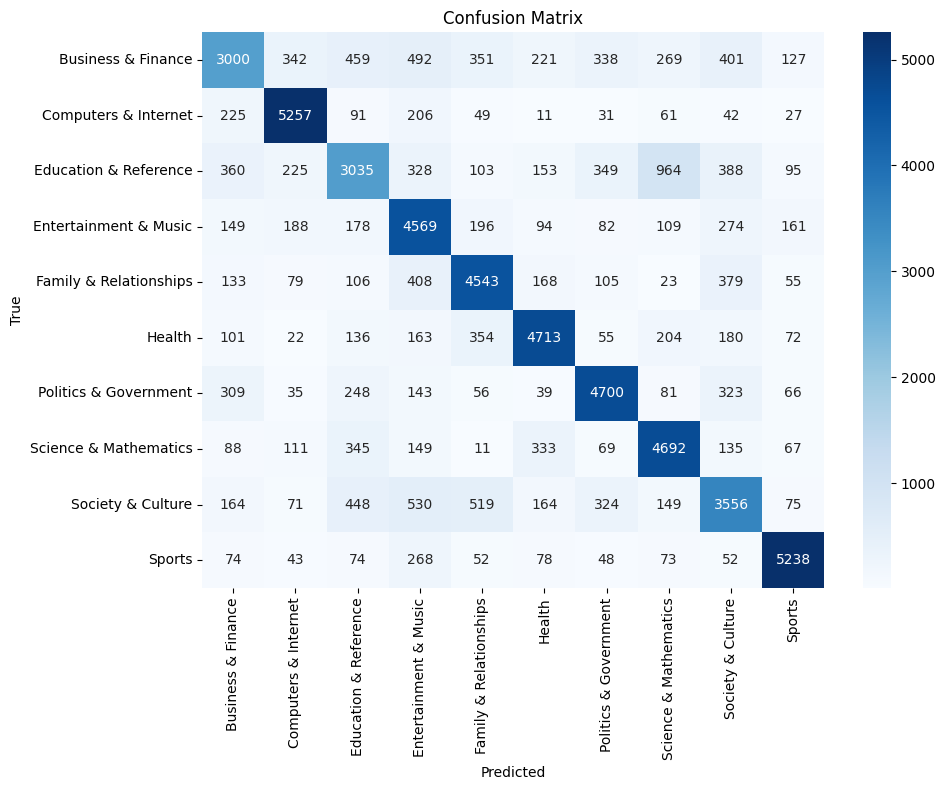

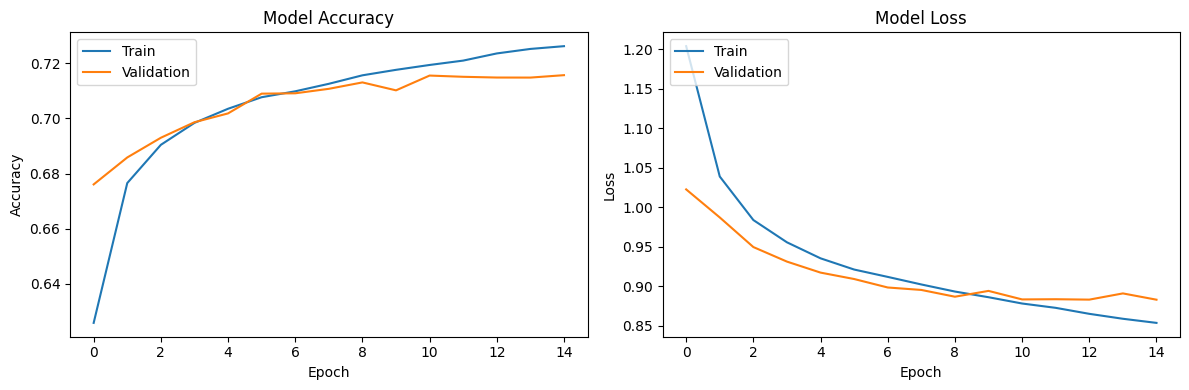

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")



Model Performance Metrics:
Accuracy: 0.7217
Precision: 0.7191
Recall: 0.7217
F1 Score: 0.7181


# **Bidirectional RNN Glove**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns
from gensim.models import Word2Vec

EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['QA Text'].values)

word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

glove_file_path = "/content/drive/MyDrive/CSE440 Project/Datasets/glove.6B.50d.t
embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors in GloVe.')

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Tokenizing texts...
Found 530442 unique tokens
X_train shape: (223997, 805)
X_val shape: (56000, 805)
X_test shape: (59999, 805)
Found 400000 word vectors in GloVe.
Embedding matrix shape: (530443, 50)


**RUN 1:**

*   **EMBEDDING_DIM:** 50 (Using the GloVe 50d embeddings)
*   **VOCAB_SIZE:** 20000 (Based on initial analysis, covers a significant portion of the vocabulary)
*   **MAX_SEQUENCE_LENGTH:** Determined automatically from the training data
*   **SimpleRNN Units:** 64
*   **Dropout Rate:** 0.5
*   **Optimizer:** 'adam'
*   **Loss Function:** 'sparse_categorical_crossentropy'
*   **Epochs:** 10
*   **Batch Size:** 128
*   **Callbacks:** EarlyStopping (patience=3), ModelCheckpoint (save best model based on validation loss)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dropout, Dense

model = Sequential([
    Embedding(len(word_index) + 1,
              50,
              weights=[embedding_matrix],
              trainable=False),
    Bidirectional(SimpleRNN(64)),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

I0000 00:00:1757126769.047679      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_run1.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10


I0000 00:00:1757126793.316243     100 service.cc:148] XLA service 0x7d57d400d4e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757126793.316857     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757126793.724865     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1750 ━━━━━━━━━━━━━━━━━━━━ 3:02:10 6s/step - accuracy: 0.1172 - loss: 2.5382

I0000 00:00:1757126795.455391     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 224s 124ms/step - accuracy: 0.3005 - loss: 2.0056 - val_accuracy: 0.3542 - val_loss: 1.8668
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.3736 - loss: 1.8303 - val_accuracy: 0.4537 - val_loss: 1.6374
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.4446 - loss: 1.6745 - val_accuracy: 0.4856 - val_loss: 1.5635
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.4642 - loss: 1.6354 - val_accuracy: 0.5133 - val_loss: 1.4984
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.4755 - loss: 1.6053 - val_accuracy: 0.2632 - val_loss: 2.1288
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.3346 - loss: 1.9327 - val_accuracy: 0.4277 - val_loss: 1.7094
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.3732 - loss: 1.8412 - val_accuracy: 0.3987 - val_loss: 1.7780


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.36      0.10      0.16      6000
  Computers & Internet       0.59      0.85      0.69      6000
 Education & Reference       0.34      0.15      0.21      6000
 Entertainment & Music       0.45      0.48      0.46      6000
Family & Relationships       0.44      0.68      0.54      5999
                Health       0.67      0.62      0.64      6000
 Politics & Government       0.45      0.58      0.50      6000
 Science & Mathematics       0.57      0.66      0.61      6000
     Society & Culture       0.42      0.30      0.35      6000
                Sports       0.65      0.74      0.69      6000

              accuracy                           0.52     59999
             macro avg       0.49      0.52      0.49     59999
          weighted avg       0.49      0.52      0.49     59999



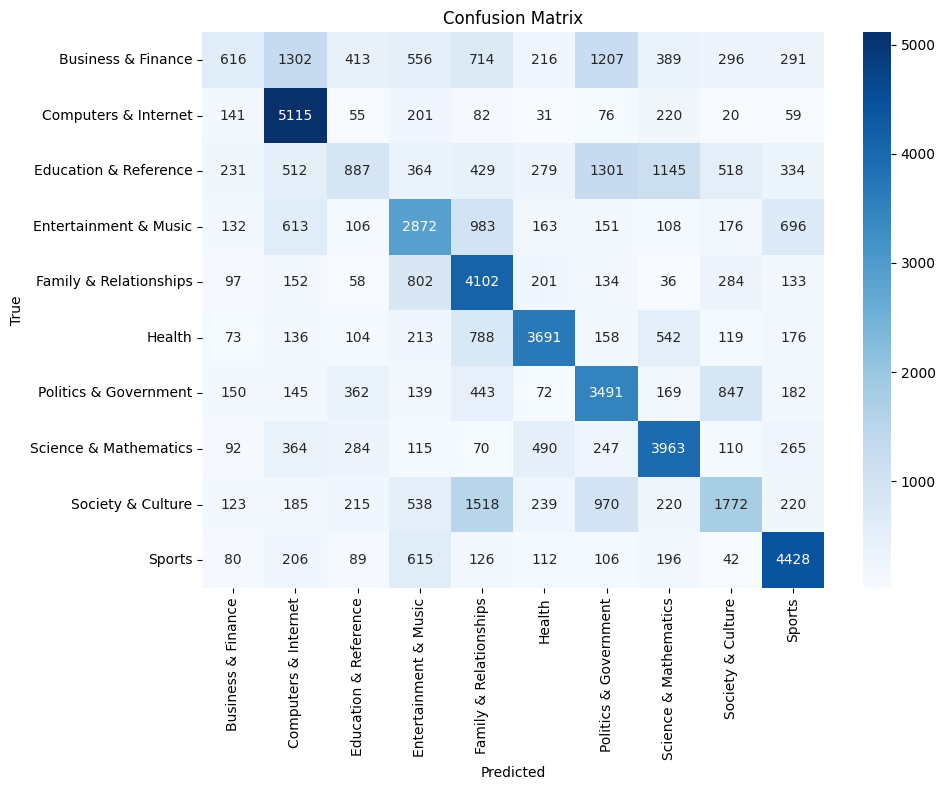

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

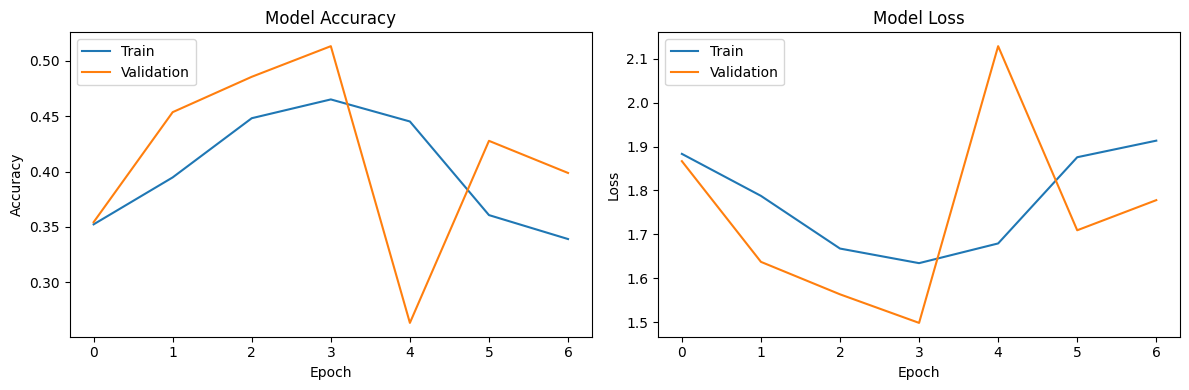

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nBidirectional SimpleRNN with GloVe Model Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")


Bidirectional SimpleRNN with GloVe Model Performance Metrics:
Accuracy:  0.5156
Precision: 0.4937
Recall:    0.5156
F1 Score:  0.4859


**RUN 2:**

*   **Previous run showed overfitting and low overall accuracy, particularly poor performance on some classes.
*   **EMBEDDING_DIM:** 50 (Keeping GloVe 50d embeddings)
*   **VOCAB_SIZE:** 50000 (Increased to potentially capture more vocabulary)
*   **MAX_SEQUENCE_LENGTH:** Determined automatically from the training data
*   **SimpleRNN Units:** 64 (Keeping the number of units the same for now)
*   **Dropout Rate:** 0.6 (Increased to combat overfitting)
*   **Regularization:** Added L2 regularization to the Bidirectional SimpleRNN layer.
*   **Optimizer:** 'adam'
*   **Loss Function:** 'sparse_categorical_crossentropy'
*   **Epochs:** 10 (Early stopping will likely stop it sooner)
*   **Batch Size:** 128
*   **Callbacks:** EarlyStopping (patience=3), ModelCheckpoint (save best model based on validation loss)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dropout, Dense
from tensorflow.keras.regularizers import l2


EMBEDDING_DIM = 50
VOCAB_SIZE = 50000

model_run2 = Sequential([
    Embedding(len(word_index) + 1,
              EMBEDDING_DIM,
              weights=[embedding_matrix],
              trainable=False),
    Bidirectional(SimpleRNN(64, kernel_regularizer=l2(0.001))),
    Dropout(0.6),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_run2.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

model_run2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_run2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint_run2 = ModelCheckpoint('best_model_run2.h5', monitor='val_loss', save_best_only=True)

history_run2 = model_run2.fit(X_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping_run2, model_checkpoint_run2])

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 223s 124ms/step - accuracy: 0.2752 - loss: 2.1735 - val_accuracy: 0.3565 - val_loss: 1.9325
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.4073 - loss: 1.8011 - val_accuracy: 0.1952 - val_loss: 2.2496
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.1912 - loss: 2.2490 - val_accuracy: 0.3352 - val_loss: 1.9601
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.2701 - loss: 2.0865 - val_accuracy: 0.3950 - val_loss: 1.8343
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.3054 - loss: 2.0268 - val_accuracy: 0.3013 - val_loss: 2.0233
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.2980 - loss: 2.0158 - val_accuracy: 0.3283 - val_loss: 1.9784
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.2811 - loss: 2.0633 - val_accuracy: 0.3315 - val_loss: 1.9683


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.19      0.04      0.07      6000
  Computers & Internet       0.44      0.87      0.58      6000
 Education & Reference       0.26      0.00      0.00      6000
 Entertainment & Music       0.27      0.39      0.32      6000
Family & Relationships       0.30      0.43      0.36      5999
                Health       0.46      0.47      0.47      6000
 Politics & Government       0.47      0.48      0.47      6000
 Science & Mathematics       0.44      0.51      0.47      6000
     Society & Culture       0.29      0.24      0.26      6000
                Sports       0.61      0.57      0.59      6000

              accuracy                           0.40     59999
             macro avg       0.37      0.40      0.36     59999
          weighted avg       0.37      0.40      0.36     59999



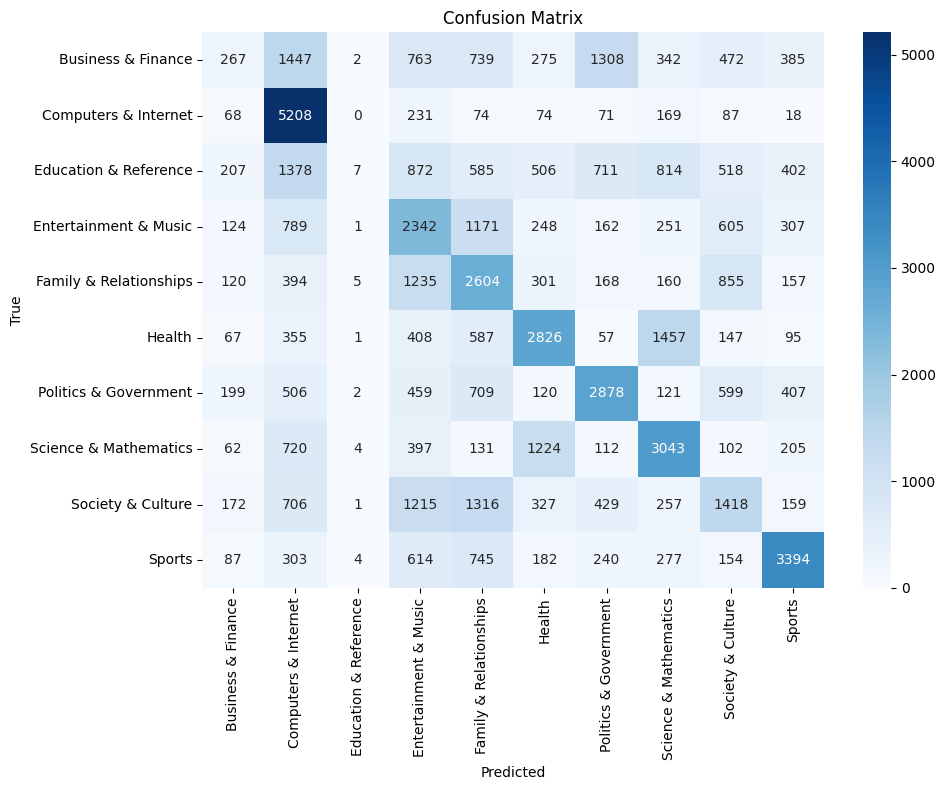

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_probs = model_run2.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

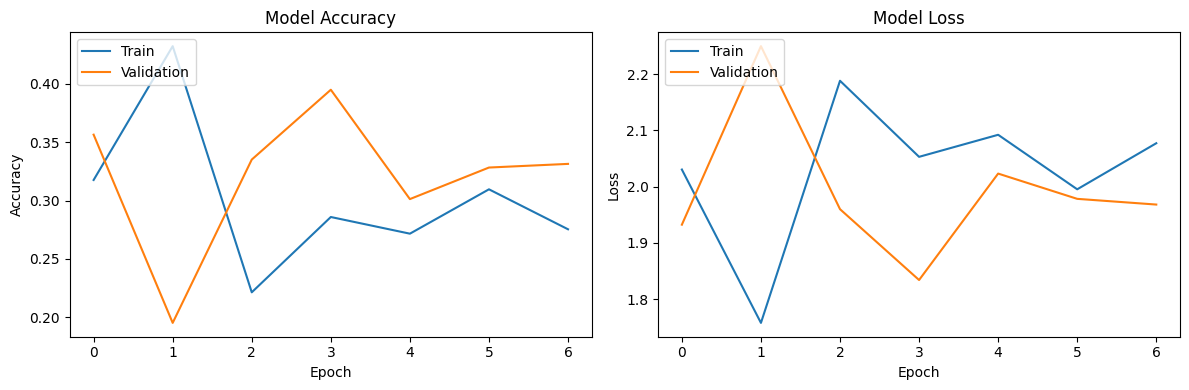

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_run2.history['accuracy'])
plt.plot(history_run2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_run2.history['loss'])
plt.plot(history_run2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nBidirectional SimpleRNN with GloVe Model Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")


Bidirectional SimpleRNN with GloVe Model Performance Metrics:
Accuracy:  0.3998
Precision: 0.3745
Recall:    0.3998
F1 Score:  0.3599


# **Bidirectional SimpleRNN skip-gram**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns


# Define parameters
EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

#loading embedding matrix
embedding_matrix_path = '/content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy'
embedding_matrix = np.load(embedding_matrix_path)
print(f"Embedding matrix loaded from: {embedding_matrix_path}")
print(f"Skip-gram model trained with {len(embedding_matrix)} words")

Tokenizing texts...
Found 530441 unique tokens
X_train shape: (223997, 683)
X_val shape: (56000, 683)
X_test shape: (59999, 683)
Embedding matrix loaded from: /content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy
Skip-gram model trained with 530442 words


In [ ]:
# Build the Bidirectional SimpleRNN model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))

model.add(Bidirectional(SimpleRNN(32)))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 26,522,100 (101.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=2000,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.1469 - loss: 2.2676

112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.1474 - loss: 2.2665 - val_accuracy: 0.3266 - val_loss: 1.8687
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.3248 - loss: 1.8487

112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 278ms/step - accuracy: 0.3251 - loss: 1.8482 - val_accuracy: 0.4336 - val_loss: 1.6539
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4263 - loss: 1.6484

112/112 ━━━━━━━━━━━━━━━━━━━━ 45s 314ms/step - accuracy: 0.4266 - loss: 1.6480 - val_accuracy: 0.5190 - val_loss: 1.4790
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5022 - loss: 1.5408

112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 298ms/step - accuracy: 0.5022 - loss: 1.5408 - val_accuracy: 0.5326 - val_loss: 1.4298
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5405 - loss: 1.4297

112/112 ━━━━━━━━━━━━━━━━━━━━ 37s 264ms/step - accuracy: 0.5405 - loss: 1.4296 - val_accuracy: 0.5517 - val_loss: 1.3832
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5260 - loss: 1.4501

112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 203ms/step - accuracy: 0.5262 - loss: 1.4497 - val_accuracy: 0.5636 - val_loss: 1.3669
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5788 - loss: 1.3358

112/112 ━━━━━━━━━━━━━━━━━━━━ 54s 322ms/step - accuracy: 0.5789 - loss: 1.3358 - val_accuracy: 0.5841 - val_loss: 1.3187
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 184ms/step - accuracy: 0.5860 - loss: 1.3251 - val_accuracy: 0.4614 - val_loss: 1.5770
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.4350 - loss: 1.6353 - val_accuracy: 0.5180 - val_loss: 1.4625
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - accuracy: 0.5183 - loss: 1.4419 - val_accuracy: 0.5400 - val_loss: 1.4163


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.45      0.16      0.23      6000
  Computers & Internet       0.76      0.85      0.80      6000
 Education & Reference       0.40      0.20      0.27      6000
 Entertainment & Music       0.50      0.61      0.55      6000
Family & Relationships       0.49      0.75      0.60      5999
                Health       0.62      0.74      0.68      6000
 Politics & Government       0.59      0.73      0.65      6000
 Science & Mathematics       0.65      0.72      0.68      6000
     Society & Culture       0.51      0.28      0.37      6000
                Sports       0.69      0.82      0.75      6000

              accuracy                           0.59     59999
             macro avg       0.57      0.59      0.56     59999
          weighted avg       0.57      0.59      0.56     59999



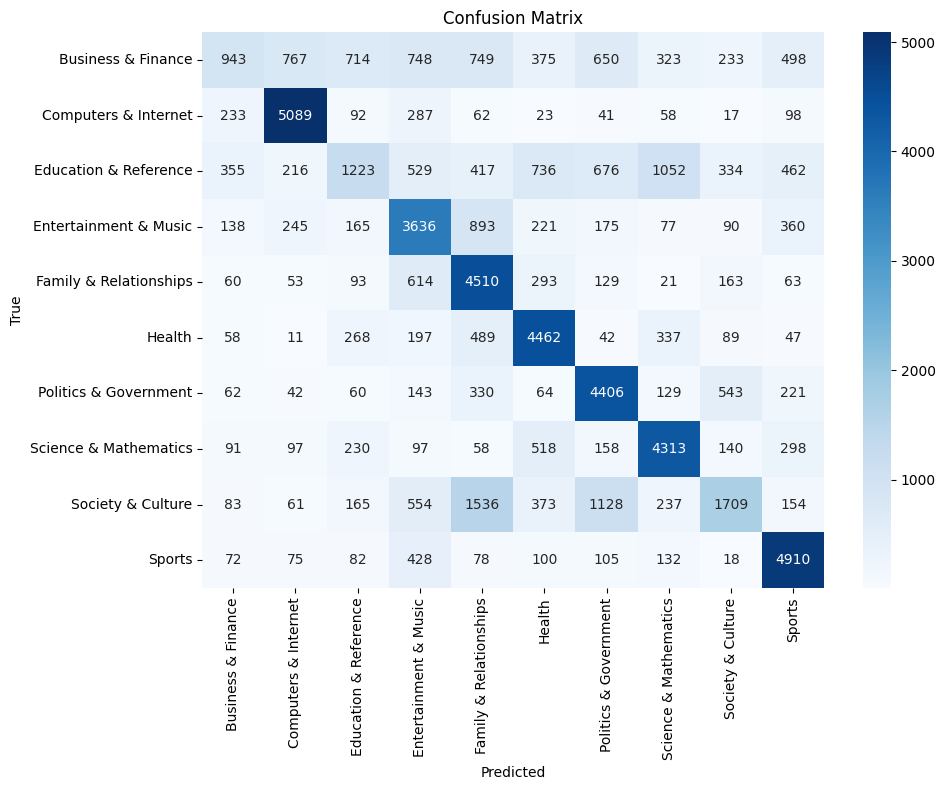

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

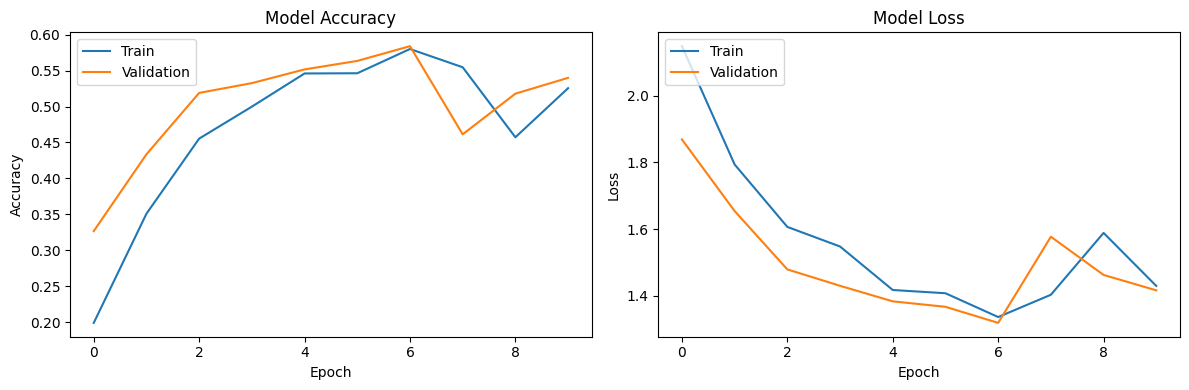

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Save model and tokenizer for future use
model.save('toxicity_detection_bidirectional_gru.h5')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved for future use")


Model Performance Metrics:
Accuracy: 0.5867
Precision: 0.5665
Recall: 0.5867
F1 Score: 0.5578


> ***Hyperparameter Tuning Logs:***



**Run 1:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max len of seq in train set


> Layers:


    0.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**
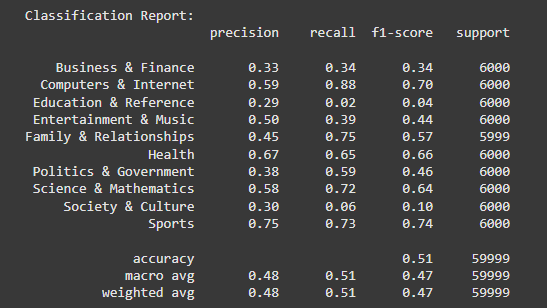

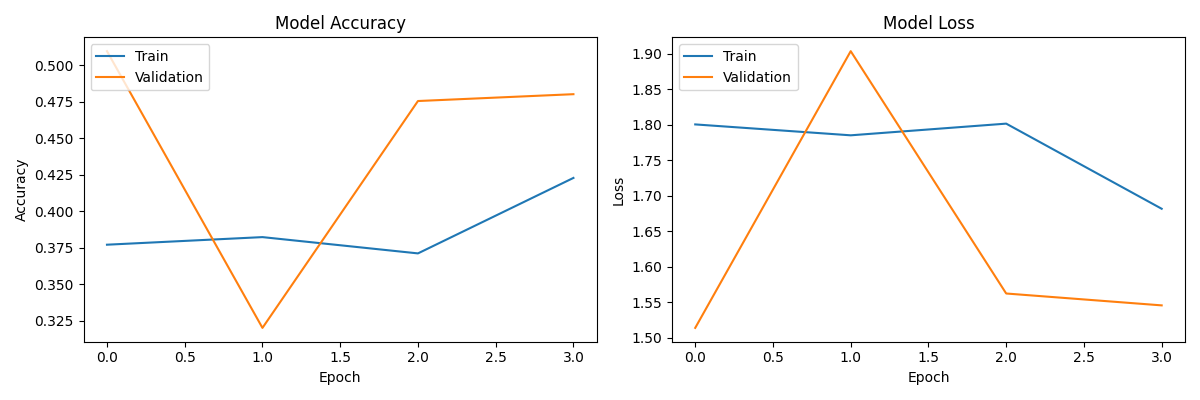

**Run 2:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max len of seq in train set


> Layers:


    1.   Embedding
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**
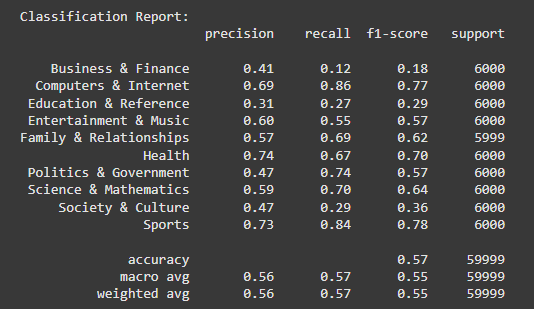
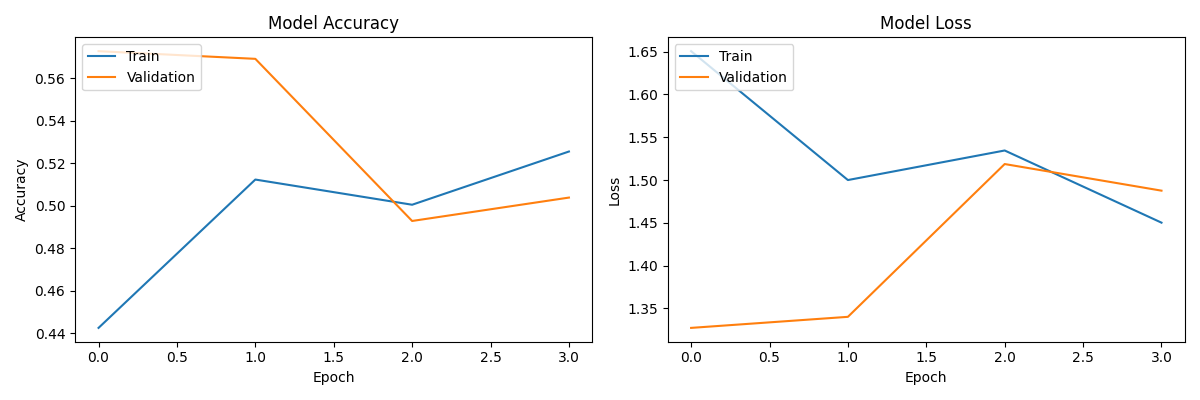

**Run 3:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max len of seq in train set


> Layers:


    1.   Embedding
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 2000


*   Early stopping = True
*   Epochs = 20

**Results:**
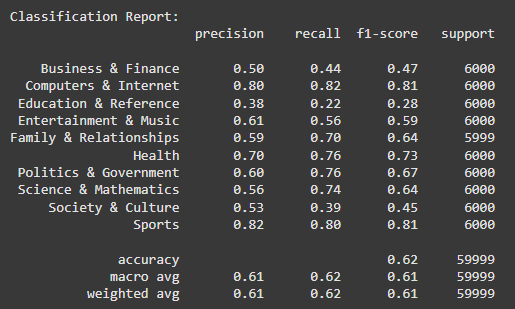
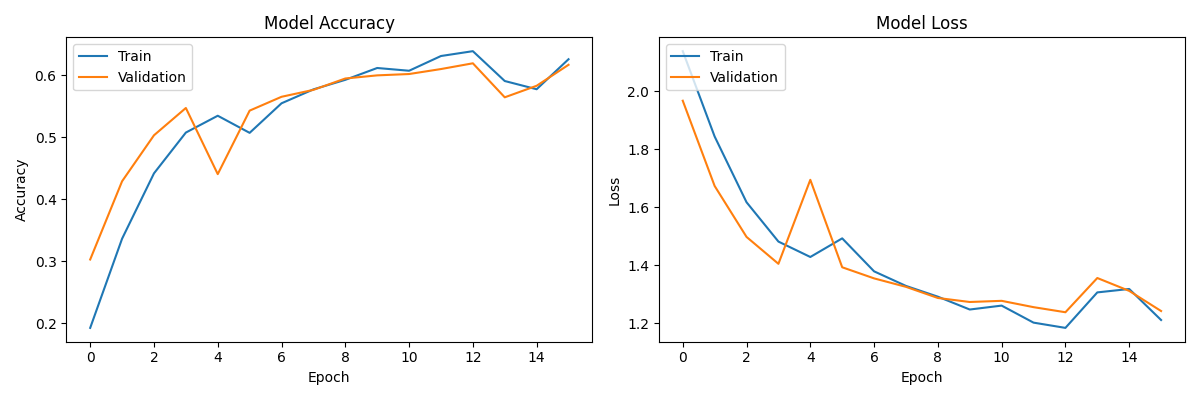

**Run 4:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max len of seq in train set


> Layers:


    1.   Embedding
    2.   Bidirectional(32)
    3.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**
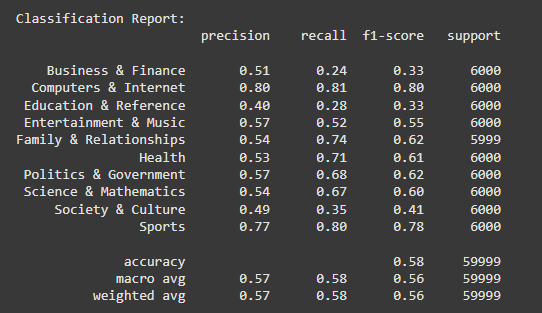

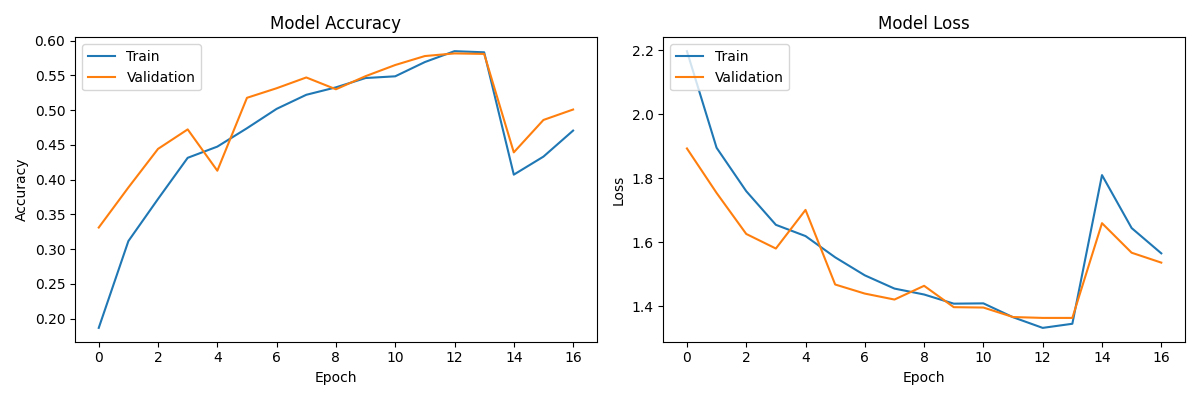

**Run 3 is the best so will kepp it**

# **Bidirectional GRU Glove**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns
from gensim.models import Word2Vec

# Define parameters
EMBEDDING_DIM = 50 # Changed to 50 for GloVe 50d
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>") # Added OOV token
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Load GloVe embeddings
glove_file_path = "/content/drive/MyDrive/CSE440 Project/Datasets/glove.6B.50d.txt"
embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors in GloVe.')

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Tokenizing texts...
Found 530441 unique tokens
X_train shape: (223997, 683)
X_val shape: (56000, 683)
X_test shape: (59999, 683)
Skip-gram model trained with 530441 words


In [ ]:
# Build the Bidirectional GRU model
model = Sequential()
model.add(Embedding(len(word_index) + 1, # Use the full vocabulary size
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH, # input_length is deprecated but kept for compatibility with older Keras versions
                    trainable=False)) # Set trainable to False to use pre-trained embeddings

model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.4)) # Updated dropout
model.add(Bidirectional(GRU(16)))
model.add(Dropout(0.4)) # Updated dropout
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    53,044,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,044,200 (202.35 MB)

 Trainable params: 53,044,200 (202.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6026 - loss: 1.2318

3500/3500 ━━━━━━━━━━━━━━━━━━━━ 447s 127ms/step - accuracy: 0.6026 - loss: 1.2317 - val_accuracy: 0.7150 - val_loss: 0.8938
Epoch 2/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 471s 118ms/step - accuracy: 0.7325 - loss: 0.8628 - val_accuracy: 0.7140 - val_loss: 0.9029
Epoch 3/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 412s 118ms/step - accuracy: 0.7551 - loss: 0.7878 - val_accuracy: 0.7136 - val_loss: 0.9070
Epoch 4/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 454s 121ms/step - accuracy: 0.7728 - loss: 0.7285 - val_accuracy: 0.7100 - val_loss: 0.9452


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.66      0.48      0.55      6000
  Computers & Internet       0.83      0.87      0.85      6000
 Education & Reference       0.55      0.56      0.55      6000
 Entertainment & Music       0.70      0.72      0.71      6000
Family & Relationships       0.69      0.79      0.74      5999
                Health       0.75      0.80      0.78      6000
 Politics & Government       0.75      0.81      0.78      6000
 Science & Mathematics       0.73      0.75      0.74      6000
     Society & Culture       0.64      0.57      0.60      6000
                Sports       0.89      0.86      0.88      6000

              accuracy                           0.72     59999
             macro avg       0.72      0.72      0.72     59999
          weighted avg       0.72      0.72      0.72     59999



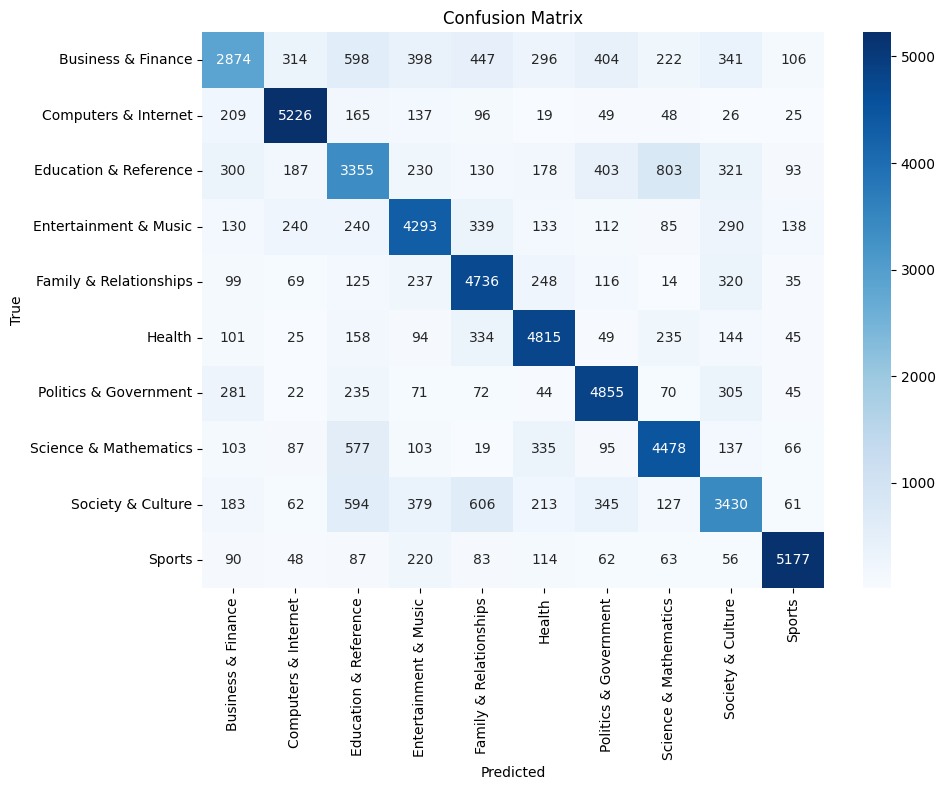

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

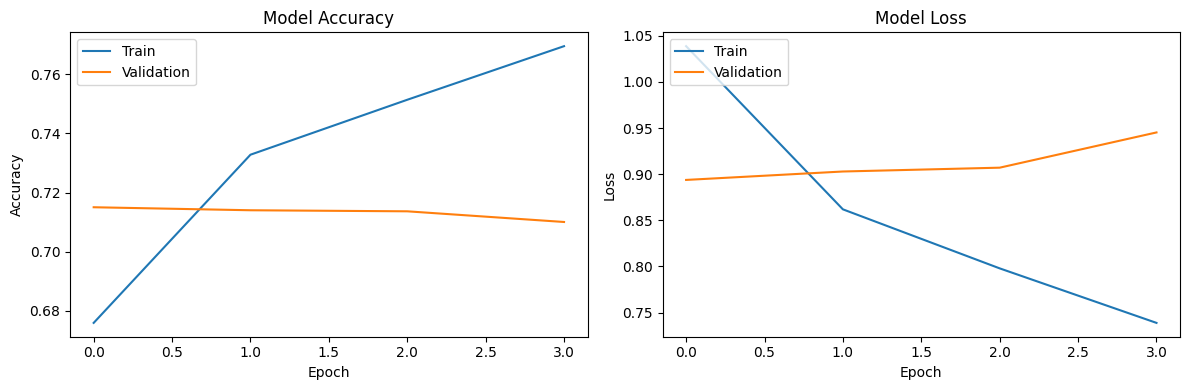

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Save model and tokenizer for future use
model.save('toxicity_detection_bidirectional_gru.h5')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved for future use")


Model Performance Metrics:
Accuracy: 0.7207
Precision: 0.7186
Recall: 0.7207
F1 Score: 0.7174
Model and tokenizer saved for future use


> ***Hyperparameter Tuning Logs:***

**Run 1:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len in train set


> Layers:


    1.   Embedding
    1.   Bidirectional(128)
    2.   Bidirectional(64)
    3.   Dense(32)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**
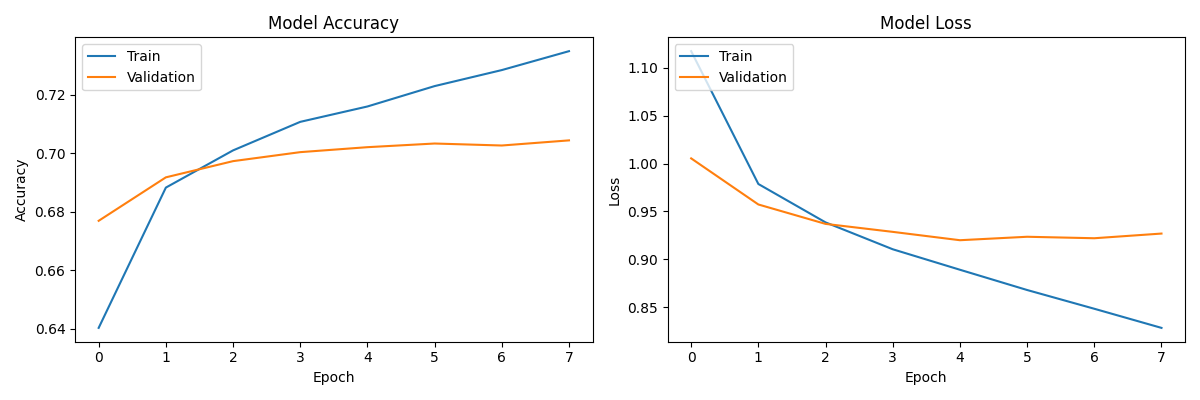

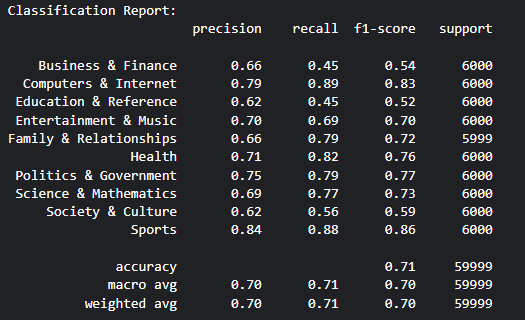

**Run 2:**

---


**Settings**:


*   EMBEDDING_DIM = 100
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len in train set


> Layers:


    1.   Embedding
    1.   Bidirectional(128)
    2.   Bidirectional(64)
    3.   Dense(32)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**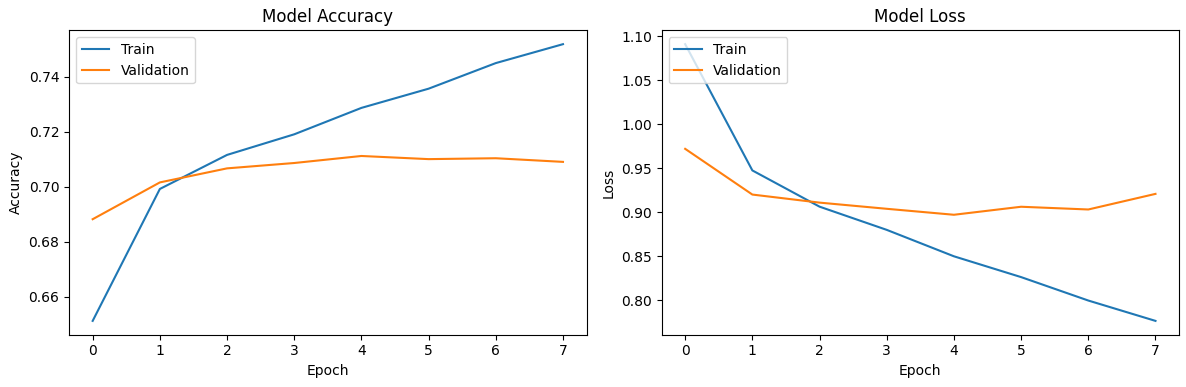

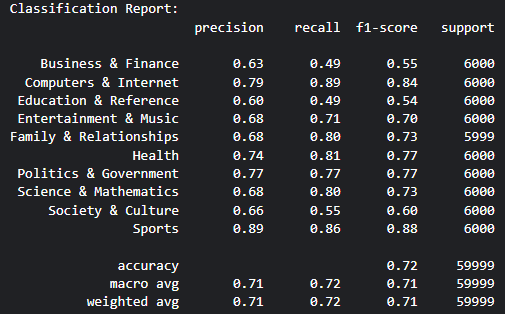

**Run 3:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len of train set

> Layers:


    1.   Embedding
    1.   Bidirectional(32)
    2.   Bidirectional(16)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**
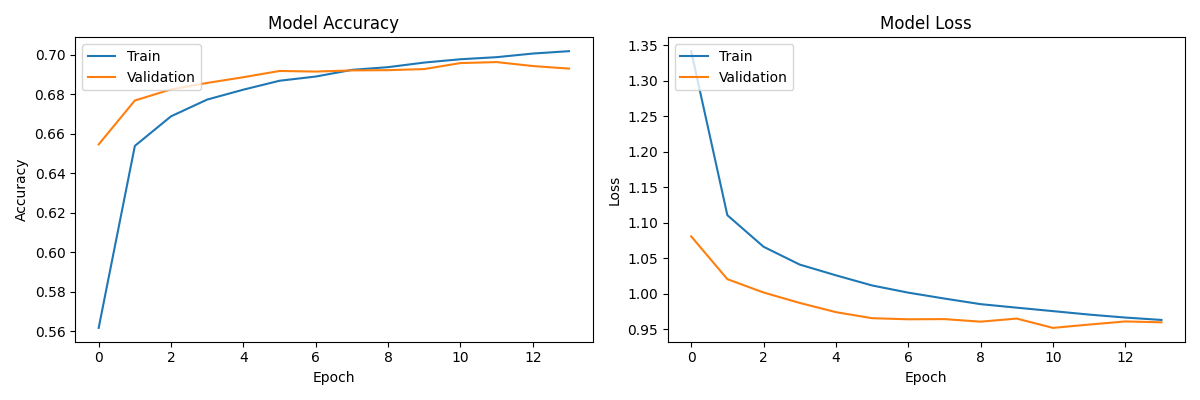

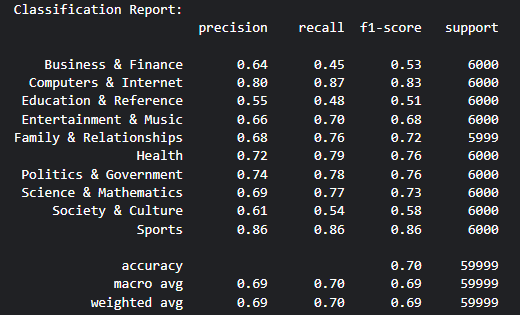

# **Bidirectional GRU skip-gram**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns


# Define parameters
EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

#loading embedding matrix
embedding_matrix_path = '/content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy'
embedding_matrix = np.load(embedding_matrix_path)
print(f"Embedding matrix loaded from: {embedding_matrix_path}")
print(f"Skip-gram model trained with {len(embedding_matrix)} words")

Tokenizing texts...
Found 530441 unique tokens
X_train shape: (223997, 683)
X_val shape: (56000, 683)
X_test shape: (59999, 683)
Embedding matrix loaded from: /content/drive/MyDrive/CSE440 Project/Datasets/embedding_matrix.npy
Skip-gram model trained with 530442 words


In [ ]:
# Build the Bidirectional GRU model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))

model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    53,044,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,044,200 (202.35 MB)

 Trainable params: 53,044,200 (202.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6026 - loss: 1.2318

3500/3500 ━━━━━━━━━━━━━━━━━━━━ 447s 127ms/step - accuracy: 0.6026 - loss: 1.2317 - val_accuracy: 0.7150 - val_loss: 0.8938
Epoch 2/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 471s 118ms/step - accuracy: 0.7325 - loss: 0.8628 - val_accuracy: 0.7140 - val_loss: 0.9029
Epoch 3/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 412s 118ms/step - accuracy: 0.7551 - loss: 0.7878 - val_accuracy: 0.7136 - val_loss: 0.9070
Epoch 4/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 454s 121ms/step - accuracy: 0.7728 - loss: 0.7285 - val_accuracy: 0.7100 - val_loss: 0.9452


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.66      0.48      0.55      6000
  Computers & Internet       0.83      0.87      0.85      6000
 Education & Reference       0.55      0.56      0.55      6000
 Entertainment & Music       0.70      0.72      0.71      6000
Family & Relationships       0.69      0.79      0.74      5999
                Health       0.75      0.80      0.78      6000
 Politics & Government       0.75      0.81      0.78      6000
 Science & Mathematics       0.73      0.75      0.74      6000
     Society & Culture       0.64      0.57      0.60      6000
                Sports       0.89      0.86      0.88      6000

              accuracy                           0.72     59999
             macro avg       0.72      0.72      0.72     59999
          weighted avg       0.72      0.72      0.72     59999



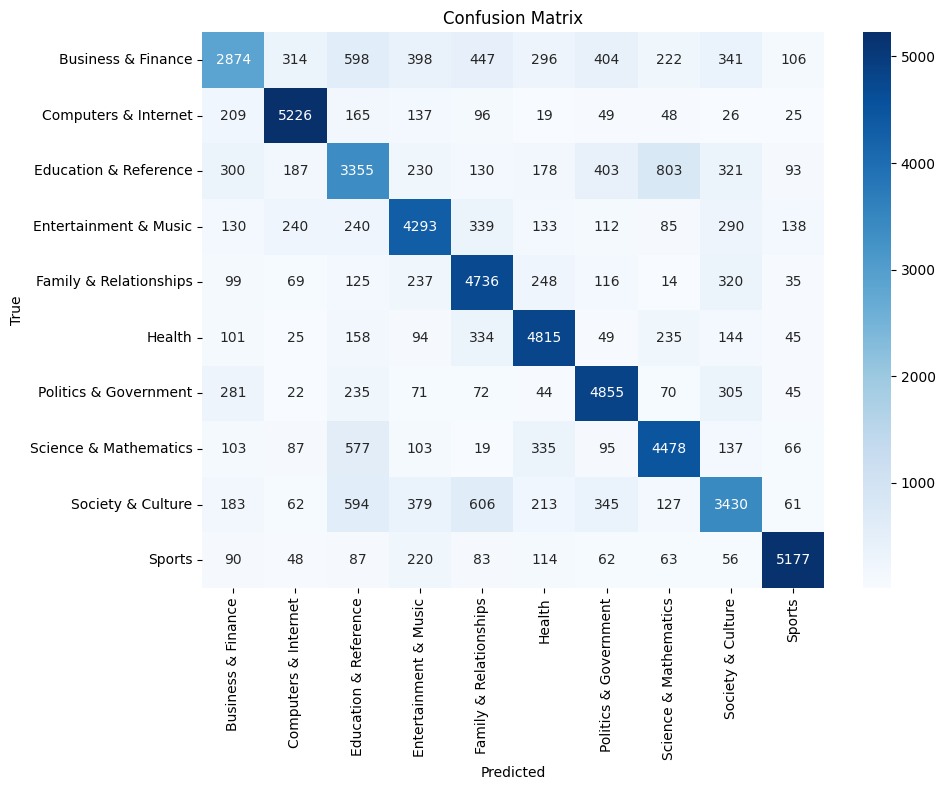

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

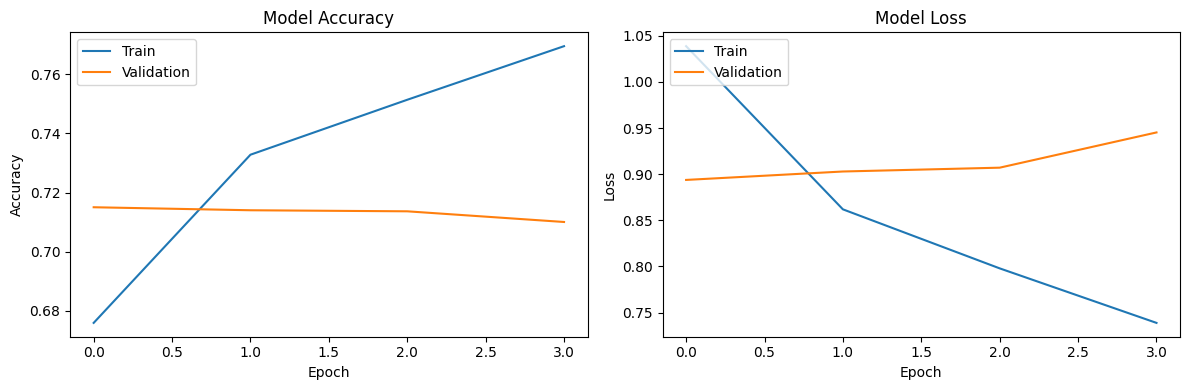

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Save model and tokenizer for future use
# model.save('toxicity_detection_bidirectional_gru.h5')
# import pickle
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# print("Model and tokenizer saved for future use")


Model Performance Metrics:
Accuracy: 0.7207
Precision: 0.7186
Recall: 0.7207
F1 Score: 0.7174
Model and tokenizer saved for future use


> ***Hyperparameter Tuning Logs:***

**Run 1:**

---


**Settings**:


*   EMBEDDING_DIM = 100
*   VOCAB_SIZE = 10000
*   MAX_SEQUENCE_LENGTH = 200


> Layers:


    1.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 64


*   Early stopping = True
*   Epochs = 20

**Results:**
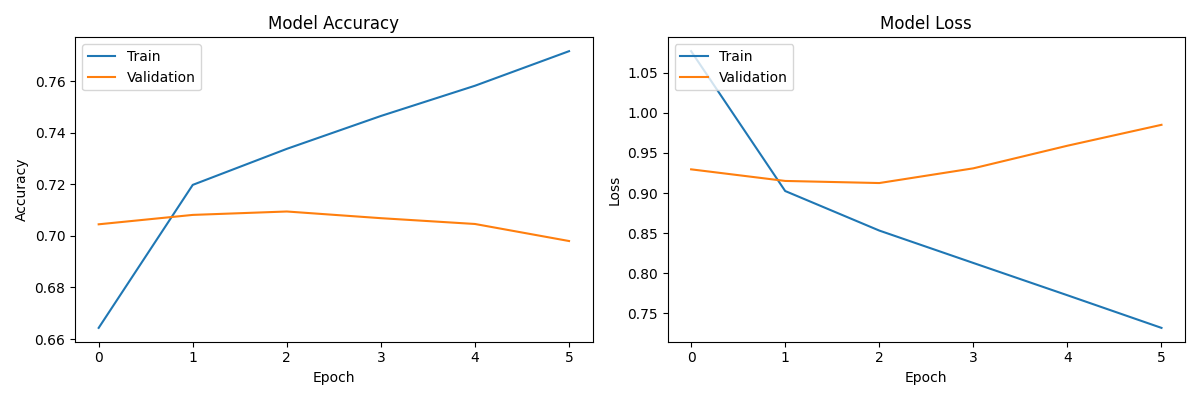






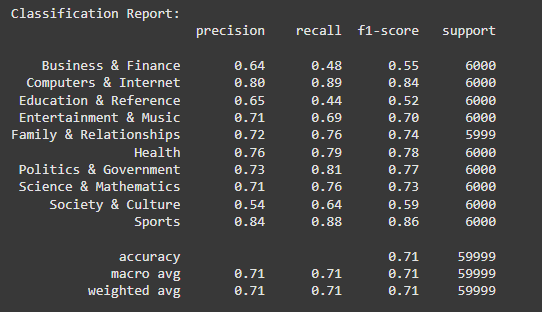

**Run 2:**

---


**Settings**:


*   EMBEDDING_DIM = 100
*   VOCAB_SIZE = 10000
*   MAX_SEQUENCE_LENGTH = max seq len of train set


> Layers:


    1.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 64


*   Early stopping = True
*   Epochs = 20

**Results:**
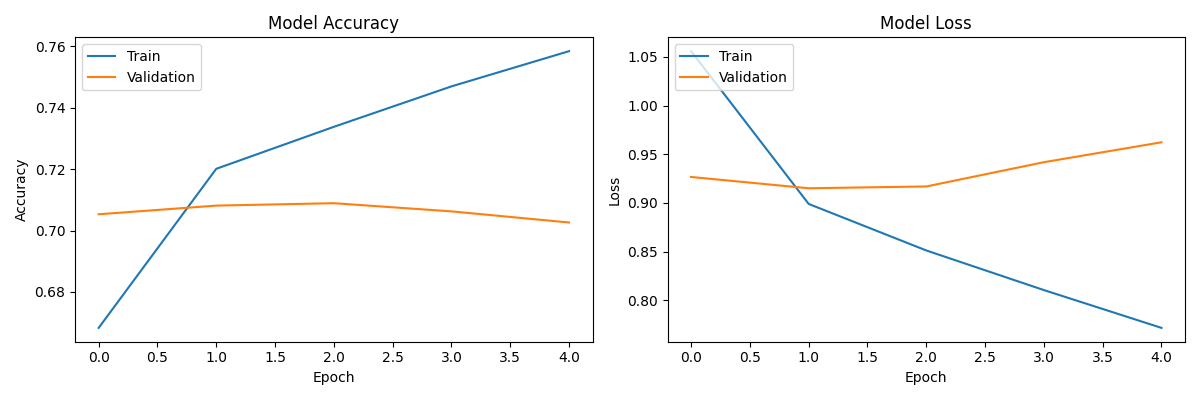

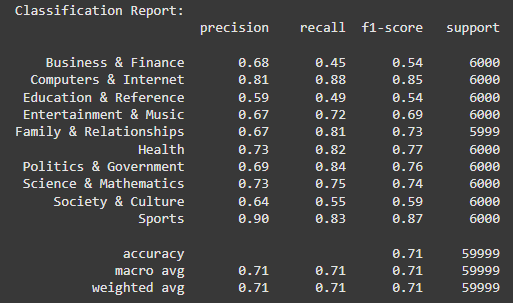

**Run 3:**

---


**Settings**:


*   EMBEDDING_DIM = 100
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len of train set

> Layers:


    1.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 64


*   Early stopping = True
*   Epochs = 20

**Results:**
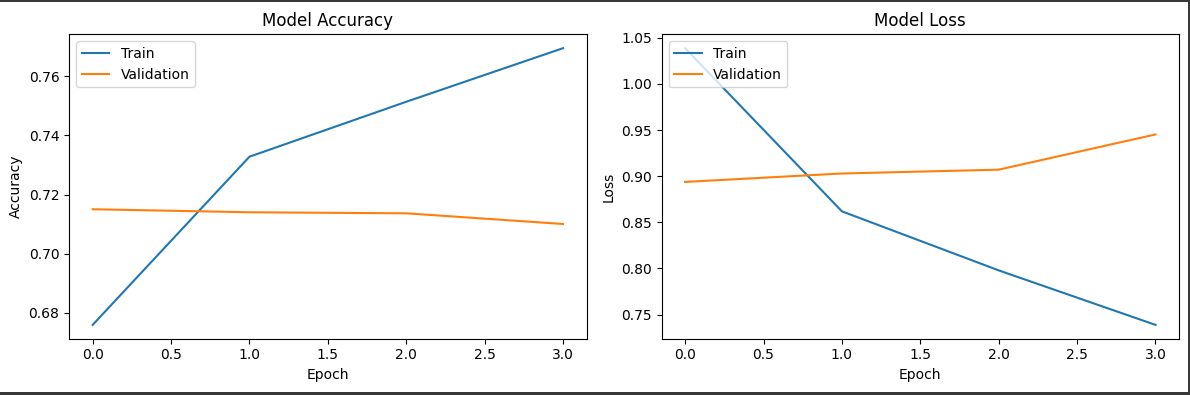

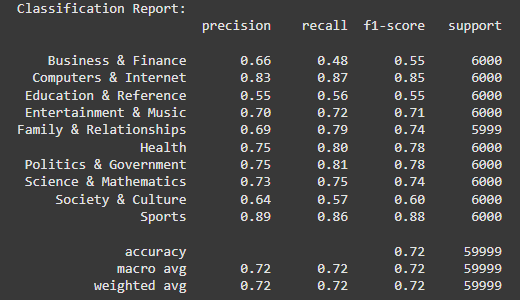

**The model is overfitting so decreasing the embedding size**

**Run 4:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len of train set


> Layers:

    Embedding
    Bidirectional(64)
    Bidirectional(32)
    Dense(16)
    Output()

*   Dropout Rate = 0.4
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**

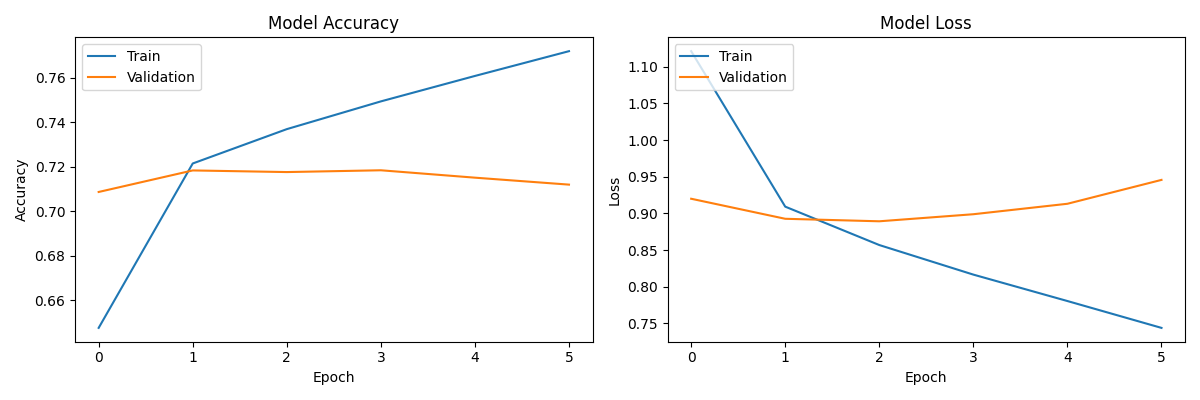
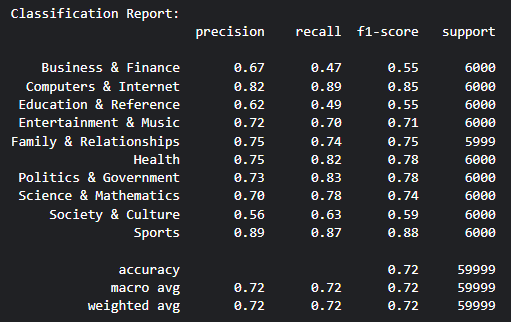

# **Bidirectional LSTM Glove**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns

# Define parameters
EMBEDDING_DIM = 50 # Changed to 50 for GloVe 50d
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>") # Added OOV token
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Load GloVe embeddings
glove_file_path = "/content/drive/MyDrive/CSE440 Project/Datasets/glove.6B.50d.txt"
embeddings_index = {}
with open(glove_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors in GloVe.')

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Tokenizing texts...
Found 530442 unique tokens
X_train shape: (223997, 805)
X_val shape: (56000, 805)
X_test shape: (59999, 805)
Found 400000 word vectors in GloVe.
Embedding matrix shape: (530443, 50)


In [ ]:
from tensorflow.keras.layers import LSTM

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, # Use the full vocabulary size
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH, # input_length is deprecated but kept for compatibility with older Keras versions
                    trainable=False)) # Set trainable to False to use pre-trained embeddings

model.add(Bidirectional(LSTM(64, return_sequences=True))) # Changed from GRU to LSTM
model.add(Dropout(0.4)) # Updated dropout
model.add(Bidirectional(LSTM(32))) # Changed from GRU to LSTM
model.add(Dropout(0.4)) # Updated dropout
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,150 (101.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 26,522,150 (101.17 MB)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=1000,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.3934 - loss: 1.7792

224/224 ━━━━━━━━━━━━━━━━━━━━ 122s 509ms/step - accuracy: 0.3939 - loss: 1.7780 - val_accuracy: 0.6228 - val_loss: 1.2026
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6230 - loss: 1.2277

224/224 ━━━━━━━━━━━━━━━━━━━━ 116s 518ms/step - accuracy: 0.6230 - loss: 1.2276 - val_accuracy: 0.6523 - val_loss: 1.1024
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6483 - loss: 1.1352

224/224 ━━━━━━━━━━━━━━━━━━━━ 142s 518ms/step - accuracy: 0.6484 - loss: 1.1351 - val_accuracy: 0.6656 - val_loss: 1.0549
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.6634 - loss: 1.0845

224/224 ━━━━━━━━━━━━━━━━━━━━ 142s 517ms/step - accuracy: 0.6634 - loss: 1.0845 - val_accuracy: 0.6764 - val_loss: 1.0153
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.6727 - loss: 1.0495

224/224 ━━━━━━━━━━━━━━━━━━━━ 141s 513ms/step - accuracy: 0.6727 - loss: 1.0495 - val_accuracy: 0.6800 - val_loss: 1.0047
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.6780 - loss: 1.0327

224/224 ━━━━━━━━━━━━━━━━━━━━ 143s 517ms/step - accuracy: 0.6780 - loss: 1.0327 - val_accuracy: 0.6833 - val_loss: 0.9892
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.6814 - loss: 1.0180

224/224 ━━━━━━━━━━━━━━━━━━━━ 143s 519ms/step - accuracy: 0.6814 - loss: 1.0180 - val_accuracy: 0.6888 - val_loss: 0.9751
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6859 - loss: 1.0033

224/224 ━━━━━━━━━━━━━━━━━━━━ 141s 513ms/step - accuracy: 0.6859 - loss: 1.0033 - val_accuracy: 0.6909 - val_loss: 0.9657
Epoch 9/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 142s 516ms/step - accuracy: 0.6894 - loss: 0.9920 - val_accuracy: 0.6885 - val_loss: 0.9736
Epoch 10/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.6910 - loss: 0.9831

224/224 ━━━━━━━━━━━━━━━━━━━━ 116s 519ms/step - accuracy: 0.6910 - loss: 0.9831 - val_accuracy: 0.6948 - val_loss: 0.9590
Epoch 11/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.6965 - loss: 0.9736

224/224 ━━━━━━━━━━━━━━━━━━━━ 141s 514ms/step - accuracy: 0.6965 - loss: 0.9736 - val_accuracy: 0.6948 - val_loss: 0.9514
Epoch 12/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6964 - loss: 0.9722

224/224 ━━━━━━━━━━━━━━━━━━━━ 142s 513ms/step - accuracy: 0.6964 - loss: 0.9722 - val_accuracy: 0.6962 - val_loss: 0.9460
Epoch 13/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.7020 - loss: 0.9554

224/224 ━━━━━━━━━━━━━━━━━━━━ 116s 517ms/step - accuracy: 0.7020 - loss: 0.9554 - val_accuracy: 0.6974 - val_loss: 0.9450
Epoch 14/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.7010 - loss: 0.9517

224/224 ━━━━━━━━━━━━━━━━━━━━ 143s 520ms/step - accuracy: 0.7010 - loss: 0.9517 - val_accuracy: 0.6977 - val_loss: 0.9443
Epoch 15/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.7055 - loss: 0.9432

224/224 ━━━━━━━━━━━━━━━━━━━━ 116s 520ms/step - accuracy: 0.7054 - loss: 0.9432 - val_accuracy: 0.6989 - val_loss: 0.9358
Epoch 16/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 141s 514ms/step - accuracy: 0.7046 - loss: 0.9433 - val_accuracy: 0.6978 - val_loss: 0.9446
Epoch 17/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7079 - loss: 0.9345

224/224 ━━━━━━━━━━━━━━━━━━━━ 142s 514ms/step - accuracy: 0.7079 - loss: 0.9345 - val_accuracy: 0.7005 - val_loss: 0.9354
Epoch 18/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 140s 507ms/step - accuracy: 0.7068 - loss: 0.9332 - val_accuracy: 0.7009 - val_loss: 0.9426
Epoch 19/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7102 - loss: 0.9227

224/224 ━━━━━━━━━━━━━━━━━━━━ 143s 511ms/step - accuracy: 0.7102 - loss: 0.9227 - val_accuracy: 0.7011 - val_loss: 0.9325
Epoch 20/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 142s 511ms/step - accuracy: 0.7098 - loss: 0.9273 - val_accuracy: 0.7016 - val_loss: 0.9340


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.64      0.45      0.53      6000
  Computers & Internet       0.80      0.87      0.83      6000
 Education & Reference       0.60      0.46      0.52      6000
 Entertainment & Music       0.67      0.70      0.68      6000
Family & Relationships       0.68      0.77      0.72      5999
                Health       0.76      0.77      0.76      6000
 Politics & Government       0.74      0.79      0.76      6000
 Science & Mathematics       0.69      0.77      0.73      6000
     Society & Culture       0.56      0.58      0.57      6000
                Sports       0.86      0.86      0.86      6000

              accuracy                           0.70     59999
             macro avg       0.70      0.70      0.70     59999
          weighted avg       0.70      0.70      0.70     59999



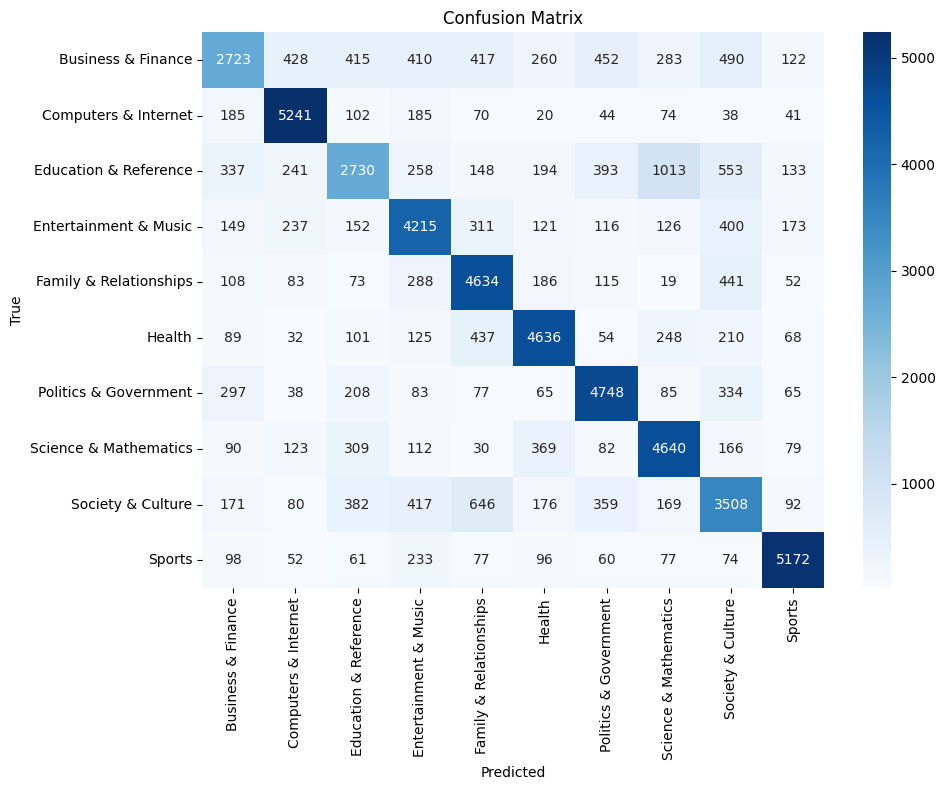

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

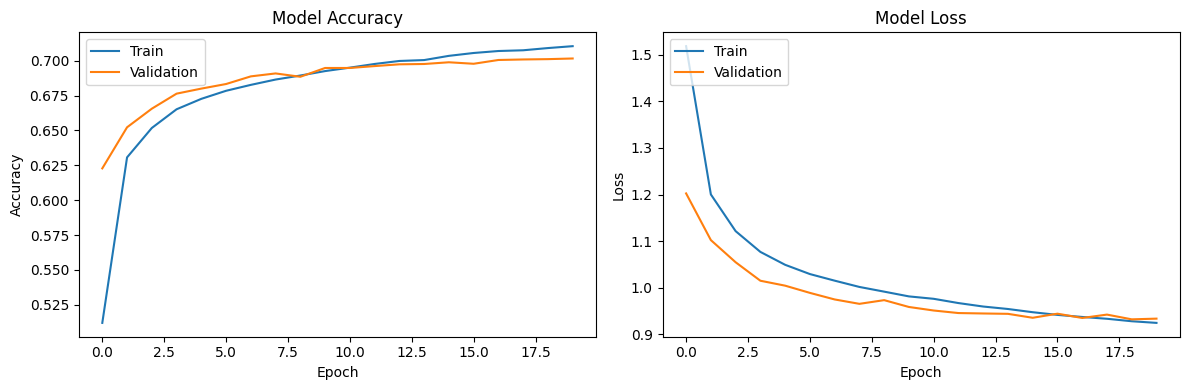

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Save model and tokenizer for future use
model.save('toxicity_detection_bidirectional_gru.h5')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved for future use")


Model Performance Metrics:
Accuracy: 0.7041
Precision: 0.6998
Recall: 0.7041
F1 Score: 0.6985
Model and tokenizer saved for future use


> ***Hyperparameter Tuning Logs:***

**Run 1:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len in train set


> Layers:


    1.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 1000


*   Early stopping = True
*   Epochs = 20

**Results:**

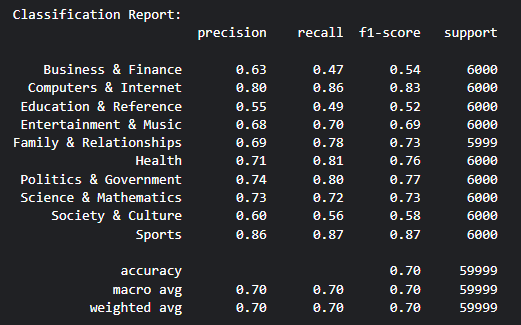
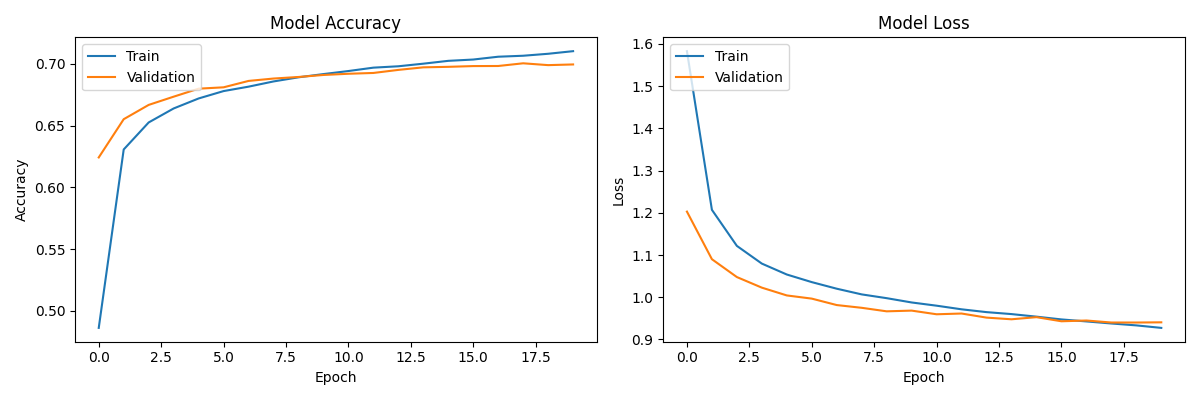

**Run 2:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len in train set
*   Learning Rate = 0.01



> Layers:


    1.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 1000


*   Early stopping = True
*   Epochs = 20

**Results:**

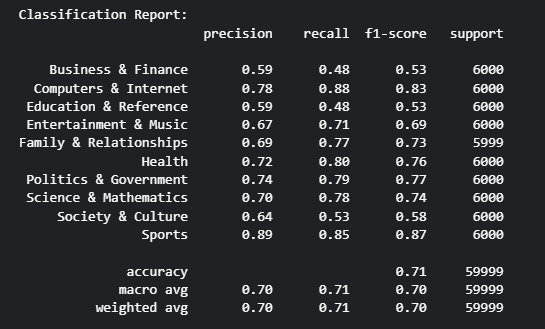
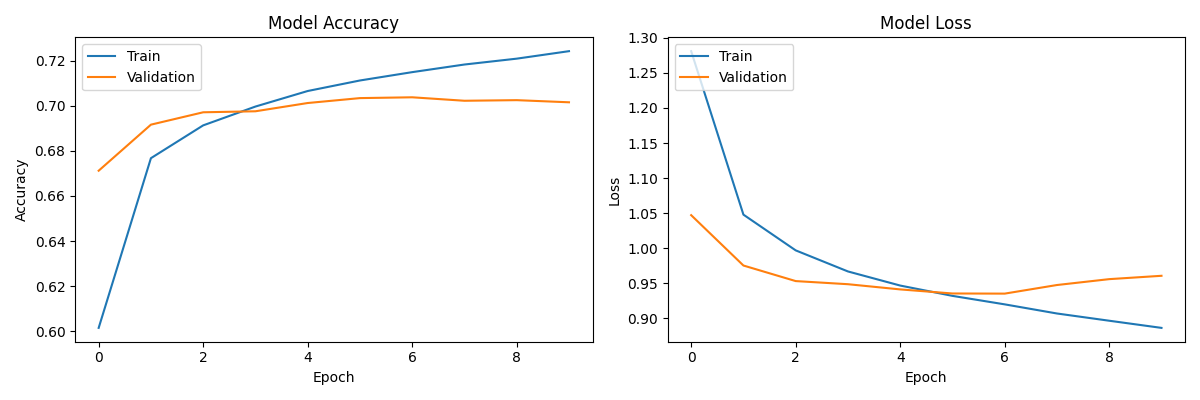

**Run 3:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 20000
*   MAX_SEQUENCE_LENGTH = max seq len in train set



> Layers:


    1.   Embedding
    1.   Bidirectional(32)
    2.   Bidirectional(16)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 1000


*   Early stopping = True
*   Epochs = 20

**Results:**

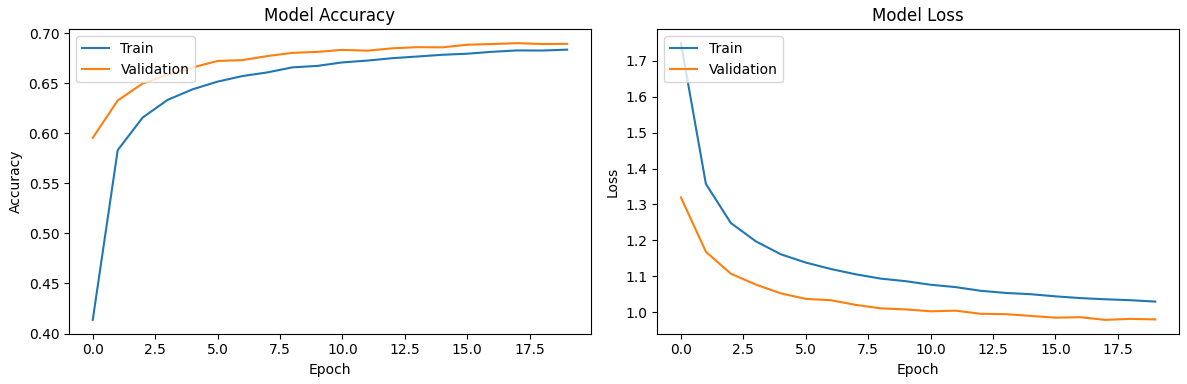
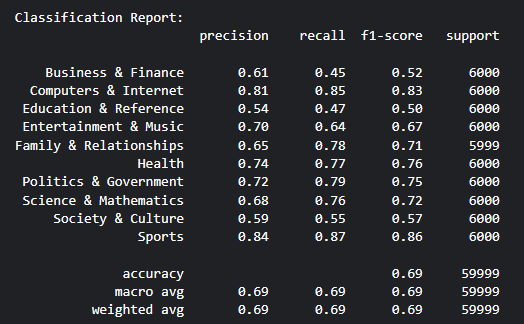

1st run is the most optimal

# **Bidirectional LSTM using skip-gram**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import seaborn as sns


# Define parameters
EMBEDDING_DIM = 50
VOCAB_SIZE = 20000

# Tokenize texts
print("Tokenizing texts...")
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['QA Text'].values)

# Get word index
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(train_df['QA Text'].values)
sequences_val = tokenizer.texts_to_sequences(val_df['QA Text'].values)
sequences_test = tokenizer.texts_to_sequences(test_df['QA Text'].values)

# Determine the maximum sequence length from the training data
MAX_SEQUENCE_LENGTH = max([len(seq) for seq in sequences_train])

# Pad sequences to ensure uniform length
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(sequences_val, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

#loading embedding matrix
embedding_matrix_path = '/kaggle/input/sg-embedding/embedding_matrix.npy'
embedding_matrix = np.load(embedding_matrix_path)
print(f"Embedding matrix loaded from: {embedding_matrix_path}")
print(f"Skip-gram model trained with {len(embedding_matrix)} words")



KeyboardInterrupt: 

In [ ]:
# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))

model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1757067216.430205      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    26,522,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,522,100 (101.17 MB)

 Trainable params: 26,522,100 (101.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/20


I0000 00:00:1757067225.983852      81 cuda_dnn.cc:529] Loaded cuDNN version 90300


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 294s 163ms/step - accuracy: 0.5261 - loss: 1.4652 - val_accuracy: 0.6997 - val_loss: 0.9620
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 284s 162ms/step - accuracy: 0.7094 - loss: 0.9608 - val_accuracy: 0.7142 - val_loss: 0.9075
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 284s 162ms/step - accuracy: 0.7324 - loss: 0.8808 - val_accuracy: 0.7147 - val_loss: 0.8977
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 283s 162ms/step - accuracy: 0.7451 - loss: 0.8365 - val_accuracy: 0.7158 - val_loss: 0.9162
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 284s 162ms/step - accuracy: 0.7588 - loss: 0.7911 - val_accuracy: 0.7164 - val_loss: 0.9113
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 284s 162ms/step - accuracy: 0.7679 - loss: 0.7569 - val_accuracy: 0.7141 - val_loss: 0.9294


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step

Classification Report:
                        precision    recall  f1-score   support

    Business & Finance       0.69      0.47      0.56      6000
  Computers & Internet       0.83      0.88      0.85      6000
 Education & Reference       0.62      0.48      0.54      6000
 Entertainment & Music       0.68      0.72      0.70      6000
Family & Relationships       0.77      0.70      0.73      5999
                Health       0.71      0.84      0.77      6000
 Politics & Government       0.73      0.83      0.78      6000
 Science & Mathematics       0.71      0.78      0.74      6000
     Society & Culture       0.59      0.62      0.60      6000
                Sports       0.84      0.90      0.87      6000

              accuracy                           0.72     59999
             macro avg       0.72      0.72      0.71     59999
          weighted avg       0.72      0.72      0.71     59999



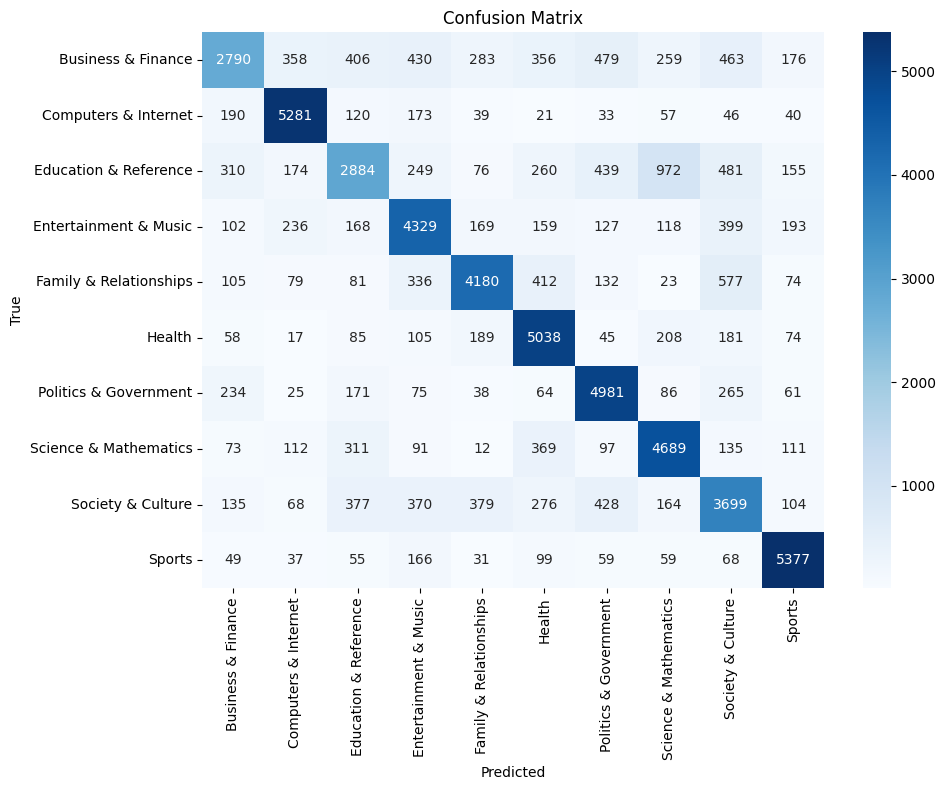

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

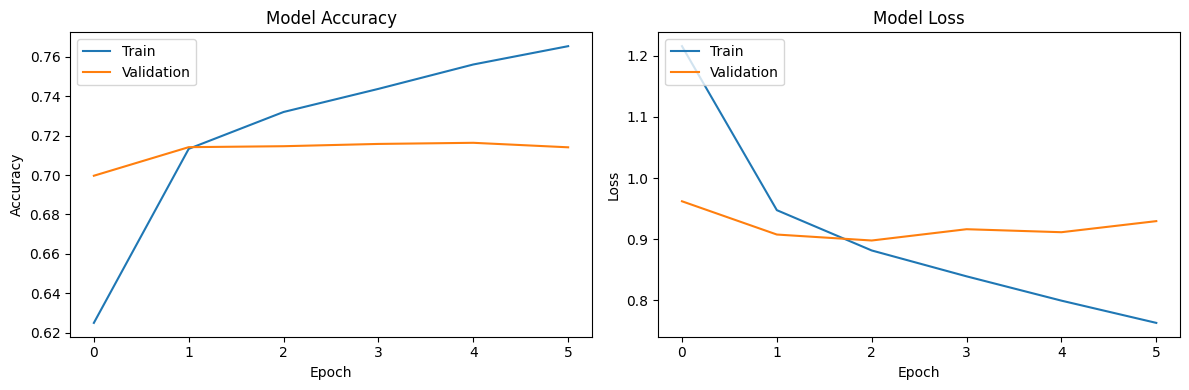

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [ ]:
# Get detailed performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Save model and tokenizer for future use
model.save('toxicity_detection_bidirectional_gru.h5')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved for future use")


Model Performance Metrics:
Accuracy: 0.7208
Precision: 0.7177
Recall: 0.7208
F1 Score: 0.7147


> ***Hyperparameter Tuning Logs:***

**Run 1:**

---


**Settings**:


*   EMBEDDING_DIM = 50
*   VOCAB_SIZE = 10000
*   MAX_SEQUENCE_LENGTH = 200


> Layers:


    1.   Embedding
    1.   Bidirectional(128)
    2.   Bidirectional(64)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.3
*   Batch Size = 64


*   Early stopping = True
*   Epochs = 20

**Results:**
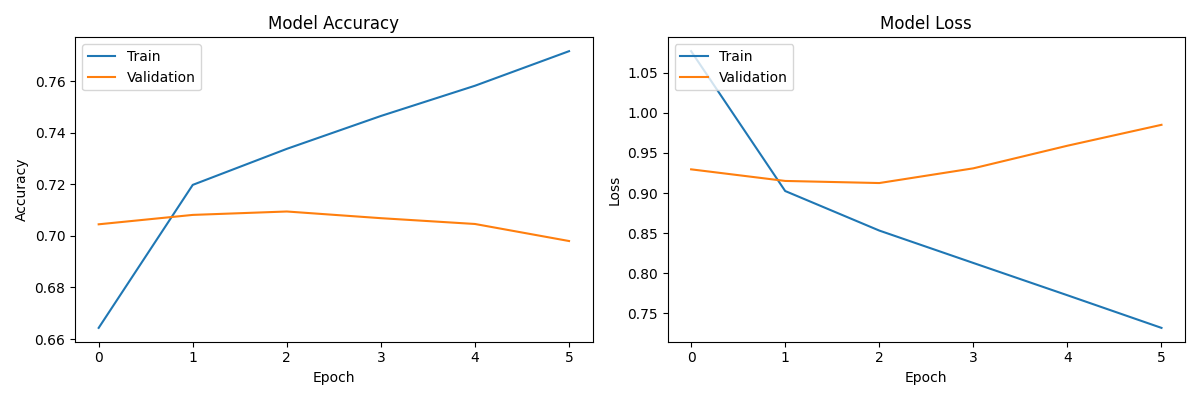






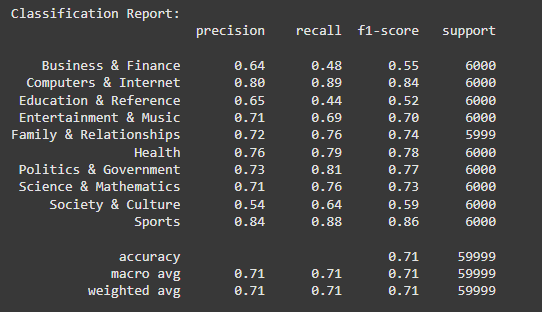

**Run 2:**

---


**Settings**:


*   EMBEDDING_DIM = 100
*   VOCAB_SIZE = 10000
*   MAX_SEQUENCE_LENGTH = max seq len of train set


> Layers:


    1.   Embedding
    1.   Bidirectional(64)
    2.   Bidirectional(32)
    3.   Dense(16)
    4.   Output()

*   Dropout Rate = 0.4
*   Batch Size = 128


*   Early stopping = True
*   Epochs = 20

**Results:**

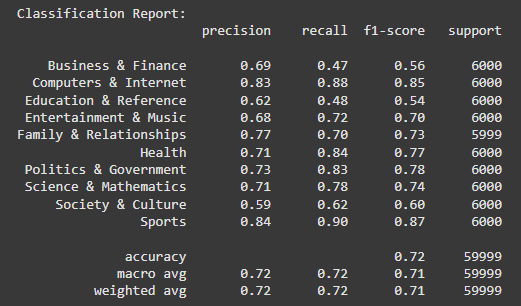
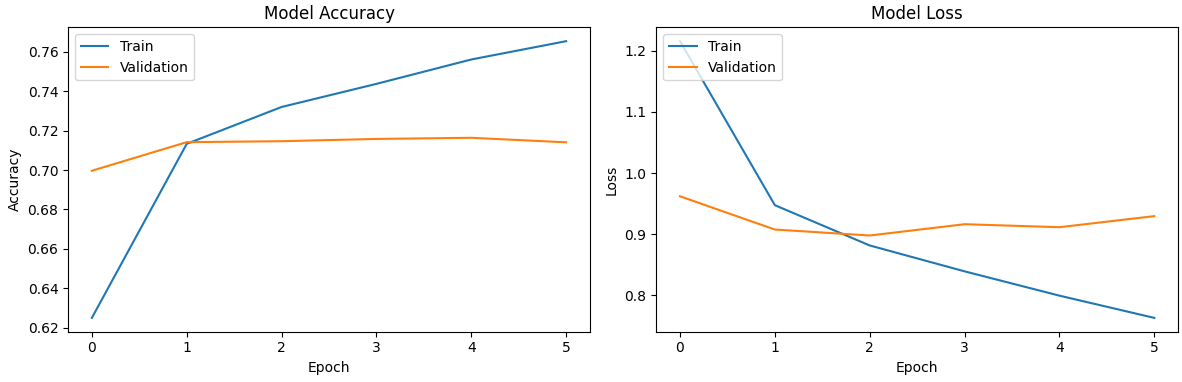